<a href="https://colab.research.google.com/github/nrichardrexon/AI-Driven-Intrusion-Detection-System-for-Containerized-Environments/blob/main/Project_Phase_1_Module_1_Version_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================
# ⚙️ Environment Setup Script — Plan Version 3 (Updated)
# ===============================

import os
import subprocess
from pathlib import Path
from google.colab import drive

# ===============================
# 1. Mount Google Drive
# ===============================
print("\n📂 Mounting Google Drive...")
drive.mount('/content/drive')
PROJ = Path("/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1")

# ===============================
# 2. Define project structure
# ===============================
print("\n📂 Checking project directories...")

folders = [
    PROJ / "Datasets",
    PROJ / "processed",
    PROJ / "external",
    PROJ / "models",
    PROJ / "outputs",
    PROJ / "reports",
    PROJ / "src",
    PROJ / "notebooks",
    PROJ / "logs"
]

missing_folders = []
for f in folders:
    if not f.exists():
        missing_folders.append(f)

if missing_folders:
    print("⚠️ Missing folders:")
    for mf in missing_folders:
        print(f" - {mf}")
    print("\nPlease create them manually in your Google Drive under:", PROJ)
else:
    print("✅ All required folders are present.")

# ===============================
# 3. Install dependencies
# ===============================
print("\n📦 Installing Python dependencies...")

requirements = [
    "pandas",
    "numpy",
    "scikit-learn",
    "matplotlib",
    "seaborn",
    "torch",
    "statsmodels",
    "pandapower",
    "grid2op",
    "xgboost",
    "keras-tcn",
    "pvlib",
    "requests"
]

for pkg in requirements:
    print(f"➡️ Installing {pkg} ...")
    subprocess.run(["pip", "install", pkg], check=True)

print("✅ All dependencies installed.")

# ===============================
# 4. Verify installation
# ===============================
print("\n🔍 Verifying libraries...")

try:
    import pandas, numpy, sklearn, matplotlib, seaborn
    import torch, statsmodels.api as sm, pandapower, grid2op
    import xgboost, tcn, pvlib, requests
    print("✅ All libraries successfully imported.")
except Exception as e:
    print("❌ Error during verification:", e)

# ===============================
# 5. Acceptance checks
# ===============================
print("\n📄 Acceptance check — listing datasets folder contents:")
datasets_folder = PROJ / "Datasets"
if datasets_folder.exists():
    for f in datasets_folder.iterdir():
        print(f" - {f.name}")
else:
    print("❌ Datasets folder missing!")

# Save setup report
report_path = PROJ / "reports" / "setup_report.txt"
with open(report_path, "w") as rpt:
    rpt.write("Environment setup completed.\n")
    rpt.write("Required folders checked.\n")
    rpt.write(f"Missing folders: {missing_folders}\n")
    rpt.write("Dependencies installed.\n")
print(f"📝 Setup report saved at: {report_path}")

# ===============================
# 6. Non-technical note
# ===============================
print("\n📌 Non-technical note:")
print("This setup script ensures reproducibility by creating required directories, "
      "installing necessary libraries, and verifying dataset accessibility for the Smart Grid Phase 1 project.")



📂 Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📂 Checking project directories...
✅ All required folders are present.

📦 Installing Python dependencies...
➡️ Installing pandas ...
➡️ Installing numpy ...
➡️ Installing scikit-learn ...
➡️ Installing matplotlib ...
➡️ Installing seaborn ...
➡️ Installing torch ...
➡️ Installing statsmodels ...
➡️ Installing pandapower ...
➡️ Installing grid2op ...
➡️ Installing xgboost ...
➡️ Installing keras-tcn ...
➡️ Installing pvlib ...
➡️ Installing requests ...
✅ All dependencies installed.

🔍 Verifying libraries...
✅ All libraries successfully imported.

📄 Acceptance check — listing datasets folder contents:
 - NREL Weather - Tamil Nadu
 - Load Dataset
 - GEFCom2014
 - manifest.json
 - Region-wise, state-wise, sector-wise, type-wise, station-wise, unit-wise Daily generation reports
 - Renewable Project Monitoring Division-Daily Renewable G

In [ ]:
# ===============================
# 📥 Dataset Acquisition Script — Segment 2 (Final with CEA Fix & Safeguards)
# ===============================

import shutil
from pathlib import Path
import pandas as pd
import requests
import json
import sys
import kagglehub  # Restored working Kaggle access method

# ===============================
# 1. Define raw data folder
# ===============================
PROJ = Path("/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1")
raw_dir = PROJ / "Datasets"

if not raw_dir.exists():
    print(f"❌ Required folder missing: {raw_dir}")
    print("Please create the folder manually before running this script.")
    sys.exit(1)

print(f"✅ Found raw data folder: {raw_dir}")

# ===============================
# 2. Download GEFCom2014 dataset
# ===============================
def download_gefcom2014(force_download=False):
    out_dir = raw_dir / "GEFCom2014"
    if out_dir.exists() and not force_download:
        decision = input("GEFCom2014 dataset exists. Redownload? (y/n): ").strip().lower()
        if decision != "y":
            print(f"ℹ Skipping GEFCom2014 download.")
            return out_dir

    print("\n📥 Downloading GEFCom2014 dataset from Kaggle...")
    gefcom_path = kagglehub.dataset_download("cthngon/gefcom2014-dataset")
    if out_dir.exists():
        shutil.rmtree(out_dir)
    shutil.copytree(gefcom_path, out_dir)
    print(f"✅ Full GEFCom2014 dataset saved to: {out_dir}")

    sample_file = list(out_dir.rglob("*.csv"))[0]
    df = pd.read_csv(sample_file)
    print("\n🔍 GEFCom2014 sample preview:")
    print(df.head())
    print(f"Shape: {df.shape}")
    print("Dtypes:\n", df.dtypes)
    return out_dir

gefcom_dir = download_gefcom2014()

# ===============================
# 3. CEA API links
# ===============================
cea_links = {
    "AllIndia_Summary.csv": "https://loadqa.ndapapi.com/v1/openapi?API_Key=gAAAAABo1V9E5khLaZ5dk24HxWmRsQVeiePj0jm51inAmAYLTP49GuIkZAhiIJndk9pvkoaEWgX_kU03n4tzoAkOyCI_XKVqsRgQK2gKFH-ivQVHvtbSKYTBSsPEXUceykUp5wZTIGX6bN_YFtzeExYtpqsmM6AaAebWRW7Qa08IL-xDweOnB9TP_C-RRmDkkR3GilEGUs1mn9848JiH0bMR37xqj-Lwrg==&ind=I7649_5,I7649_6,I7649_7,I7649_8,I7649_9,I7649_10&dim=Country,Year,CalendarDay,D7649_4&pageno=1",
    "Region_State_Unitwise_daily.csv": "https://loadqa.ndapapi.com/v1/openapi?API_Key=gAAAAABo4ssJWpVuhuTkURRNAjWZu4ucj7wiRJoW5uD6bjU1Xvukd3aWmVGDjgZNlNdh5SbZFnwIevr6nMCwhDS5nDWfSEqUo__oN9d-LabLnzaWwMGDZc6HN2pEJZeOkS9q89oTNILo7iM1qbVz3wqScfCZZ20Micu2YK0T0il7_NiuZdhTEZRSnU8Gm5eoKhjrER_VctunMB-k4V-0uJQUe2Vqyp8CLA==&ind=I7672_11,I7672_12,I7672_13,I7672_14,I7672_15,I7672_16,I7672_17&dim=Country,Year,CalendarDay,D7672_4,D7672_5,D7672_6,D7672_7,D7672_8,D7672_9,D7672_10,D7672_18,D7672_19&pageno=1",
    "Renewable_Project_Monitoring.csv": "https://loadqa.ndapapi.com/v1/openapi?API_Key=gAAAAABo0Apl5Q-veZYp00Gt6gOBOYmI15ZU5ouOvE_7KMz9n-5tknldHGhHX0Mq3vQ1cjBmuGHPSyfHwtbBz9y_VfRSIvsw_tfQSpa7CiIp_KVOI7DPKIpVxhrp-1dIw9ONGwCeD4aLSBeTfiIl3Own8YUxh4sTt4Id-C0Bm57q4TlM5bGXyX54Ts3XkFPD2JKoB9VrDO-_1fhhq2HHRRw-E7MqNj2jMA==&ind=I8069_6,I8069_7,I8069_8&dim=Country,Year,Month,CalendarDay,D8069_5&pageno=1"
}

# ===============================
# 4. Download & normalize CEA datasets
# ===============================
def download_cea_data(name, url, force_download=False):
    out_path = raw_dir / name
    if out_path.exists() and not force_download:
        decision = input(f"{name} already exists. Redownload? (y/n): ").strip().lower()
        if decision != "y":
            print(f"ℹ Skipping {name}, already present.")
            return pd.read_csv(out_path)

    try:
        print(f"\n📥 Downloading {name} from API...")
        resp = requests.get(url)
        resp.raise_for_status()
        data_json = resp.json()

        # Normalize data
        df = pd.DataFrame()
        if isinstance(data_json, dict):
            if "Data" in data_json:
                df = pd.json_normalize(data_json["Data"])
            elif "data" in data_json:
                df = pd.json_normalize(data_json["data"])
            else:
                df = pd.json_normalize(data_json)
        elif isinstance(data_json, list):
            df = pd.json_normalize(data_json)
        else:
            df = pd.DataFrame([data_json])

        # Ensure data isn't empty
        if df.empty:
            print(f"⚠️ Warning: {name} resulted in empty dataset.")
        else:
            print(f"✅ {name} loaded successfully with {df.shape[0]} rows.")

        # Save to CSV
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"✅ {name} saved to: {out_path}")

        # Preview first 10 rows
        print(f"\n🔍 First 10 rows of {name}:")
        print(df.head(10))
        return df

    except Exception as e:
        print(f"❌ Failed to download {name}: {e}")
        return None

# ===============================
# 5. Load pre-uploaded datasets
# ===============================
print("\n📂 Loading pre-uploaded datasets from Google Drive...")
load_path = raw_dir / "Load Dataset" / "powerdemand_5min_2021_to_2024_with weather.csv"
nsrdb_dir = raw_dir / "NREL Weather - Tamil Nadu"

print(f"✅ Load dataset located: {load_path}" if load_path.exists() else f"❌ Missing: {load_path}")

if nsrdb_dir.exists():
    nsrdb_files = list(nsrdb_dir.glob("*.csv"))
    if nsrdb_files:
        print(f"✅ NSRDB dataset folder found: {nsrdb_dir}")
        print("📄 Found NSRDB CSV files:")
        for f in nsrdb_files:
            print(f" - {f.name}")
    else:
        print(f"❌ No CSV files found inside {nsrdb_dir}")
else:
    print(f"❌ Missing: {nsrdb_dir}")

# ===============================
# 6. Download all CEA datasets
# ===============================
for fname, url in cea_links.items():
    download_cea_data(fname, url)

# ===============================
# 7. Sanity check + manifest creation
# ===============================
print("\n📝 Creating manifest.json...")
manifest = {
    "datasets": [
        {"name": f.name, "source": str(f)} for f in raw_dir.iterdir() if f.is_file()
    ]
}
manifest_path = raw_dir / "manifest.json"
with open(manifest_path, "w") as f:
    json.dump(manifest, f, indent=4)
print(f"✅ Manifest saved to: {manifest_path}")
print(json.dumps(manifest, indent=2))


✅ Found raw data folder: /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets
GEFCom2014 dataset exists. Redownload? (y/n): n
ℹ Skipping GEFCom2014 download.

📂 Loading pre-uploaded datasets from Google Drive...
✅ Load dataset located: /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets/Load Dataset/powerdemand_5min_2021_to_2024_with weather.csv
✅ NSRDB dataset folder found: /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets/NREL Weather - Tamil Nadu
📄 Found NSRDB CSV files:
 - 327873_13.08_80.27_2016.csv
 - 327873_13.08_80.27_2017.csv
 - 327873_13.08_80.27_2018.csv
 - 327873_13.08_80.27_2019.csv
 - 327873_13.08_80.27_2020.csv
AllIndia_Summary.csv already exists. Redownload? (y/n): n
ℹ Skipping AllIndia_Summary.csv, already present.
Region_State_Unitwise_daily.csv already exists. Redownload? (y/n): n
ℹ Skipping Region_State_Unitwise_daily.csv, already present.


/tmp/ipython-input-2315751056.py:72: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(out_path)


Renewable_Project_Monitoring.csv already exists. Redownload? (y/n): n
ℹ Skipping Renewable_Project_Monitoring.csv, already present.

📝 Creating manifest.json...
✅ Manifest saved to: /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets/manifest.json
{
  "datasets": [
    {
      "name": "manifest.json",
      "source": "/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets/manifest.json"
    },
    {
      "name": "AllIndia_Summary.csv",
      "source": "/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets/AllIndia_Summary.csv"
    },
    {
      "name": "Region_State_Unitwise_daily.csv",
      "source": "/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets/Region_State_Unitwise_daily.csv"
    },
    {
      "name": "Renewable_Project_Monitoring.csv",
      "source": "/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets/Renewable_Project_Monitoring.csv"
    }
  ]
}


In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1"

def print_hierarchy(path, indent=0):
    prefix = " " * indent
    if os.path.isdir(path):
        print(f"{prefix}📂 {os.path.basename(path)}")
        for item in sorted(os.listdir(path)):
            print_hierarchy(os.path.join(path, item), indent + 4)
    else:
        print(f"{prefix}📄 {os.path.basename(path)}")

print("📁 Full folder/file hierarchy of /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1:\n")
print_hierarchy(BASE_DIR)


📁 Full folder/file hierarchy of /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1:

📂 Smart Grid Phase 1
    📂 Datasets
        📂 All India Summary Report- All India Capacity Availability-Daily Generation Reports
            📄 7649_KEYS.csv
            📄 7649_METADATA.csv
            📄 7649_source_data.csv
            📄 NDAP_REPORT_7649.csv
            📄 readme.pdf
        📄 AllIndia_Summary.csv
        📂 GEFCom2014
            📂 GEFCom2014 Data
                📂 GEFCom2014-E_V2
                    📄 GEFCom2014-E.xlsx
                📂 GEFCom2014-L_V2
                    📂 Load
                        📄 Instructions.txt
                        📂 Solution to Task 15
                            📄 solution15_L.csv
                            📄 solution15_L_temperature.csv
                        📂 Task 1
                            📄 L1-benchmark.csv
                            📄 L1-train.csv
                        📂 Task 10
                            📄 L10-benchmark.csv
       

In [ ]:
# ===============================
# 🔹 Segment 1: Load Raw Datasets (Bounded + Snapshots + CEA Standardization + NREL Weather)
# ✅ Includes DatetimeIndex creation for all datasets
# ===============================

import pandas as pd
import numpy as np
from pathlib import Path

# -------------------------------
# Directories
# -------------------------------
raw_dir = Path("/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/Datasets")
processed_dir = Path("/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

base_gefcom = raw_dir / "GEFCom2014/GEFCom2014 Data"

# -------------------------------
# Helper: ensure DatetimeIndex creation
# -------------------------------
def ensure_datetime_index(df, start_date="2021-01-01"):
    if not isinstance(df.index, pd.DatetimeIndex):
        if {"Day", "Hour", "Minute"}.issubset(df.columns):
            df["datetime"] = pd.to_datetime(start_date) + \
                             pd.to_timedelta(df["Day"] - 1, unit="D") + \
                             pd.to_timedelta(df["Hour"], unit="h") + \
                             pd.to_timedelta(df["Minute"], unit="m")
            df.set_index("datetime", inplace=True)
        else:
            for col in ["datetime", "Date", "Timestamp", "StartTime", "EndTime", "CalendarDay"]:
                if col in df.columns:
                    df[col] = pd.to_datetime(df[col], errors="coerce")
                    df = df.dropna(subset=[col])
                    df.set_index(col, inplace=True)
                    break
    return df

# -------------------------------
# Helper: safe CSV load with datetime creation
# -------------------------------
def safe_load_csv(file_path, timestamp_col="TIMESTAMP", dataset_type="Load"):
    df = pd.read_csv(file_path)

    if timestamp_col in df.columns:
        if dataset_type == "Load":
            df['datetime'] = pd.to_datetime(df[timestamp_col], format="%m%d%Y %H:%M", errors='coerce')
        elif dataset_type in ["Solar", "Wind"]:
            df['datetime'] = pd.to_datetime(df[timestamp_col], format="%Y%m%d %H:%M", errors='coerce')
        df = df.dropna(subset=['datetime'])
        df.set_index('datetime', inplace=True)

    df = ensure_datetime_index(df)
    return df

# -------------------------------
# Helper: load NREL CSV with proper datetime creation
# -------------------------------
def load_nrel_csv(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=2)
    except Exception as e:
        print(f"⚠️ Failed to read {file_path.name}: {e}")
        return pd.DataFrame()

    if all(col in df.columns for col in ["Year", "Month", "Day", "Hour", "Minute"]):
        df['datetime'] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]], errors="coerce")
        df = df.dropna(subset=["datetime"])
        df.set_index('datetime', inplace=True)
    else:
        print(f"⚠️ Missing necessary datetime columns in {file_path.name}")

    return df

# -------------------------------
# Helper: preview dataset
# -------------------------------
def preview_dataset(df, name):
    print(f"\n🔹 {name} - Shape: {df.shape}")
    print(df.head(3))
    print(df.columns.tolist())
    print(df.isna().sum())
    print("-" * 60)

# -------------------------------
# Helper: preview before/after datetime creation
# -------------------------------
def preview_before_after_datetime(file_path, timestamp_col, dataset_type, name):
    print(f"\n🔹 {name} - Preview BEFORE datetime creation")
    try:
        df_before = pd.read_csv(file_path)
        print(df_before.head(3))
    except Exception as e:
        print(f"⚠️ Could not preview before: {e}")

    df_after = safe_load_csv(file_path, timestamp_col=timestamp_col, dataset_type=dataset_type)
    print(f"\n🔹 {name} - Preview AFTER datetime creation & index set")
    print(df_after.head(3))
    print(f"Columns: {df_after.columns.tolist()}")
    print(f"Missing values per column:\n{df_after.isna().sum()}")
    print("-" * 60)
    return df_after

# -------------------------------
# Dataset container
# -------------------------------
datasets = {}
gefcom_datasets = {
    "Load": {"Training": {}, "Task": {}, "Benchmark": {}},
    "Solar": {"Training": {}, "Task": {}, "Benchmark": {}},
    "Wind": {"Training": {}, "Task": {}, "Benchmark": {}}
}

# -------------------------------
# 1️⃣ Load AllIndia Summary (CEA)
# -------------------------------
try:
    datasets["AllIndia_Summary"] = pd.read_csv(raw_dir / "AllIndia_Summary.csv")
    datasets["AllIndia_Summary"] = ensure_datetime_index(datasets["AllIndia_Summary"])
    preview_dataset(datasets["AllIndia_Summary"], "AllIndia_Summary")
except Exception as e:
    print(f"⚠️ Failed to load AllIndia_Summary: {e}")
    datasets["AllIndia_Summary"] = pd.DataFrame()

# -------------------------------
# 2️⃣ Load GEFCom2014 Load Datasets
# -------------------------------
gefcom_load_dir = base_gefcom / "GEFCom2014-L_V2/Load"
for task_folder in gefcom_load_dir.glob("Task*"):
    category = "Task"
    if "Training" in str(task_folder):
        category = "Training"
    elif "Benchmark" in str(task_folder):
        category = "Benchmark"

    for file in task_folder.glob("*.csv"):
        task_name = f"GEFCom_Load_{task_folder.name}_{file.stem}"
        gefcom_datasets["Load"][category][task_name] = preview_before_after_datetime(
            file, timestamp_col="TIMESTAMP", dataset_type="Load", name=task_name
        )

# -------------------------------
# 3️⃣ Load GEFCom2014 Solar Datasets
# -------------------------------
gefcom_solar_dir = base_gefcom / "GEFCom2014-S_V2/Solar"
for task_folder in gefcom_solar_dir.glob("Task*"):
    category = "Task"
    if "Training" in str(task_folder):
        category = "Training"
    elif "Benchmark" in str(task_folder):
        category = "Benchmark"

    for file in task_folder.glob("*.csv"):
        task_name = f"GEFCom_Solar_{task_folder.name}_{file.stem}"
        gefcom_datasets["Solar"][category][task_name] = preview_before_after_datetime(
            file, timestamp_col="TIMESTAMP", dataset_type="Solar", name=task_name
        )

# -------------------------------
# 4️⃣ Load GEFCom2014 Wind Datasets
# -------------------------------
gefcom_wind_dir = base_gefcom / "GEFCom2014-W_V2/Wind"
for task_folder in gefcom_wind_dir.glob("Task*"):
    category = "Task"
    if "Training" in str(task_folder):
        category = "Training"
    elif "Benchmark" in str(task_folder):
        category = "Benchmark"

    for subfolder in task_folder.glob("**"):
        if subfolder.is_dir():
            for file in subfolder.glob("*.csv"):
                task_name = f"GEFCom_Wind_{task_folder.name}_{file.stem}"
                gefcom_datasets["Wind"][category][task_name] = preview_before_after_datetime(
                    file, timestamp_col="TIMESTAMP", dataset_type="Wind", name=task_name
                )

# -------------------------------
# 5️⃣ Load Load Dataset (with datetime parsing)
# -------------------------------
load_path = raw_dir / "Load Dataset/powerdemand_5min_2021_to_2024_with weather.csv"
if load_path.exists():
    datasets["Load_Dataset"] = safe_load_csv(load_path, timestamp_col="Timestamp", dataset_type="Load")
else:
    datasets["Load_Dataset"] = pd.DataFrame()
preview_dataset(datasets["Load_Dataset"], "Load_Dataset")

# -------------------------------
# 6️⃣ Load & Standardize CEA CSV datasets
# -------------------------------
cea_files = {
    "AllIndia_Summary_CEA": raw_dir / "AllIndia_Summary.csv",
    "Region_State_Unitwise_daily": raw_dir / "Region_State_Unitwise_daily.csv",
    "Renewable_Project_Monitoring": raw_dir / "Renewable_Project_Monitoring.csv"
}

for name, path in cea_files.items():
    print(f"\n🔄 Loading CEA CSV Dataset: {name}")
    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"⚠️ Failed to read {name}: {e}")
        datasets[name] = pd.DataFrame()
        continue

    df = ensure_datetime_index(df)
    datasets[name] = df
    preview_dataset(df, name)

# -------------------------------
# 7️⃣ Load NREL Weather — Tamil Nadu Dataset
# -------------------------------
nrel_dir = raw_dir / "NREL Weather - Tamil Nadu"
if nrel_dir.exists():
    datasets["NREL_Weather_Tamil_Nadu"] = {}
    nrel_files = list(nrel_dir.glob("*.csv"))
    if nrel_files:
        for f in nrel_files:
            try:
                df = load_nrel_csv(f)
                datasets["NREL_Weather_Tamil_Nadu"][f.stem] = df
                preview_dataset(df, f"NREL_Weather_Tamil_Nadu_{f.stem}")
            except Exception as e:
                print(f"⚠️ Failed to load {f.name}: {e}")
    else:
        print(f"⚠️ No CSV files found inside {nrel_dir}")
else:
    print(f"⚠️ Missing: {nrel_dir}")

# -------------------------------
# All datasets loaded
# -------------------------------
print("\n✅ All datasets loaded and standardized successfully!")


Streaming output truncated to the last 5000 lines.
2       9  20131201 3:00  0.898262 -5.548508  1.352237 -7.867330

🔹 GEFCom_Wind_Task 15_TaskExpVars15_W_Zone9 - Preview AFTER datetime creation & index set
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-12-01 01:00:00       9  20131201 1:00  0.191504 -5.814510  0.453035   
2013-12-01 02:00:00       9  20131201 2:00  0.710305 -5.692402  1.121410   
2013-12-01 03:00:00       9  20131201 3:00  0.898262 -5.548508  1.352237   

                         V100  
datetime                       
2013-12-01 01:00:00 -8.278096  
2013-12-01 02:00:00 -8.059673  
2013-12-01 03:00:00 -7.867330  
Columns: ['ZONEID', 'TIMESTAMP', 'U10', 'V10', 'U100', 'V100']
Missing values per column:
ZONEID       0
TIMESTAMP    0
U10          0
V10          0
U100         0
V100         0
dtype: int64
-----------------------------------------------------------

/tmp/ipython-input-3500946233.py:200: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



🔹 Region_State_Unitwise_daily - Shape: (1620736, 19)
  Country  srcYear srcCalendarDay   Regions State Name    Power Stations  \
0   India     2025    28-Sep-2025  NORTHERN      DELHI          I.P.CCPP   
1   India     2025    28-Sep-2025  NORTHERN      DELHI  PRAGATI CCGT-III   
2   India     2025    28-Sep-2025  NORTHERN      DELHI      PRAGATI CCPP   

  Unit Number Type of Stations        Sector Type of outage  \
0         NaN        THER (GT)  STATE SECTOR            NaN   
1         NaN        THER (GT)  STATE SECTOR            NaN   
2         NaN        THER (GT)  STATE SECTOR            NaN   

   Monitored capacity  Power generation program for the day  \
0               270.0                                  1.06   
1              1500.0                                 11.67   
2               330.4                                  3.93   

   Power generation under todays actual  \
0                                  0.88   
1                                  0.00   
2     

In [ ]:
df = pd.read_csv(raw_dir / "Renewable_Project_Monitoring.csv")
print("Original shape:", df.shape)
print("Unique CalendarDay:", df['srcCalendarDay'].nunique())
print("Date range:", df['srcCalendarDay'].min(), "→", df['srcCalendarDay'].max())
print(df.head())


Original shape: (83114, 8)
Unique CalendarDay: 2073
Date range: 01-Apr-2021 → 9-Nov-2019
  Country  srcYear  srcMonth srcCalendarDay             Region  \
0   India     2025  Sep-2025    30-Sep-2025     Andhra Pradesh   
1   India     2025  Sep-2025    30-Sep-2025  Arunachal Pradesh   
2   India     2025  Sep-2025    30-Sep-2025              Assam   
3   India     2025  Sep-2025    30-Sep-2025              Bihar   
4   India     2025  Sep-2025    30-Sep-2025         Chandigarh   

   Wind energy in Renewable Project Monitoring Division   \
0                                              40.63       
1                                               0.00       
2                                               0.00       
3                                               0.00       
4                                               0.00       

   Solar energy in Renewable Project Monitoring Division  \
0                                              24.55       
1                                

In [ ]:
import shutil
shutil.rmtree("data/processed", ignore_errors=True)
os.makedirs("data/processed", exist_ok=True)


In [ ]:
# ===============================
# 🔹 Segment 2: Handle Missing Values & Interpolation
# (Final with GEFCom + CEA + NREL + Load_Dataset Dedicated Handling + Logging & Saving)
# ✅ Now also creates an unscaled branch: clean_datasets_unscaled
# ===============================

import pandas as pd
import numpy as np
import os, json
from sklearn.impute import KNNImputer

# -------------------------------
# Helper: show total missing values
# -------------------------------
def show_missing(df, name):
    missing_count = df.isna().sum().sum()
    print(f"{name} - Total missing values: {missing_count}")
    return missing_count

# -------------------------------
# Save processed datasets
# -------------------------------
def save_processed(df, name, folder="data/processed"):
    os.makedirs(folder, exist_ok=True)
    out_path = os.path.join(folder, f"{name}_cleaned.csv")
    df.to_csv(out_path)
    print(f"✅ Saved cleaned dataset: {out_path}")

# -------------------------------
# Metadata logging
# -------------------------------
metadata = {}
def log_metadata(name, df_before, df_after):
    metadata[name] = {
        "shape_before": df_before.shape,
        "shape_after": df_after.shape,
        "missing_before": int(df_before.isna().sum().sum()),
        "missing_after": int(df_after.isna().sum().sum())
    }

# -------------------------------
# Acceptance checks
# -------------------------------
def validate_processed(df, name, is_cea=False):
    if df.isna().sum().sum() > 0:
        print(f"⚠️ {name} still has missing values after preprocessing.")
    else:
        print(f"✅ {name} has no missing values.")

    if is_cea and "Total" in df.columns:
        daily_totals = df.resample("D")["Total"].sum()
        if not daily_totals.isnull().any():
            print(f"✅ {name} daily totals resampled check passed.")
        else:
            print(f"⚠️ {name} daily totals check could not be validated.")

# -------------------------------
# Helper: preprocess missing values
# -------------------------------
def preprocess_missing(df, name="", knn_neighbors=5, is_cea=False, is_load_dataset=False, is_nrel=False):
    if df.empty:
        print(f"⚠️ {name} is empty. Skipping missing value preprocessing.")
        return df.copy()

    df_before = df.copy()

    # ✅ Preserve important non-numeric ID columns
    preserved_cols = [c for c in ["Region", "State"] if c in df.columns]
    preserved_data = df[preserved_cols].copy() if preserved_cols else pd.DataFrame(index=df.index)

    # Convert placeholders to NaN
    df.replace(["?", "NA", "N/A", "null", "NULL", "--", "n/a"], np.nan, inplace=True)

    # Ensure numeric columns
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = pd.to_numeric(df[col], errors="ignore")

    numeric_cols = df.select_dtypes(include="number").columns
    if len(numeric_cols) == 0:
        numeric_cols = df.columns

    # Ensure DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        datetime_col = None
        if "datetime" in df.columns:
            datetime_col = "datetime"
        elif "CalendarDay" in df.columns:
            datetime_col = "CalendarDay"
        elif any(col.lower() == "srccalendarday" for col in df.columns):
            real_col = [col for col in df.columns if col.lower() == "srccalendarday"][0]
            df.rename(columns={real_col: "datetime"}, inplace=True)
            datetime_col = "datetime"

        if datetime_col:
            df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")
            df = df.dropna(subset=[datetime_col])
            df.set_index(datetime_col, inplace=True)
            if datetime_col == "CalendarDay" and "CalendarDay" in df.columns:
                df.drop(columns=["CalendarDay"], inplace=True, errors="ignore")
            df.index.name = "datetime"
        else:
            print(f"⚠️ {name} has no datetime-like column. Using linear interpolation on index.")
    else:
        if df.index.name == "srcCalendarDay":
            df.index.name = "datetime"

    # Fill entirely empty numeric columns with 0
    for col in numeric_cols:
        if df[col].isna().all():
            print(f"⚡ {name}: Column '{col}' is entirely NaN. Filling with 0.")
            df[col] = 0

    # Interpolation strategies
    try:
        if is_cea:
            if isinstance(df.index, pd.DatetimeIndex):
                print(f"⚡ Using time-based interpolation for CEA dataset '{name}' (no group collapse)")
                df[numeric_cols] = df[numeric_cols].interpolate(method="time", limit_direction="both")
            else:
                df[numeric_cols] = df[numeric_cols].interpolate(method="linear", limit_direction="both")

        elif is_nrel:
            group_cols = [col for col in df.columns if col not in numeric_cols]
            if group_cols:
                for col in numeric_cols:
                    df[col] = df.groupby(group_cols)[col].transform(
                        lambda s: s.interpolate(method="time", limit_direction="both")
                    )
            else:
                if isinstance(df.index, pd.DatetimeIndex):
                    df[numeric_cols] = df[numeric_cols].interpolate(method="time", limit_direction="both")
                else:
                    df[numeric_cols] = df[numeric_cols].interpolate(method="linear", limit_direction="both")

            print(f"⚡ Applying forward-fill + backward-fill for NREL dataset '{name}'")
            df[numeric_cols] = df[numeric_cols].ffill().bfill().fillna(df[numeric_cols].mean())

        elif is_load_dataset:
            print(f"⚡ Applying dedicated interpolation strategy for {name}")
            if isinstance(df.index, pd.DatetimeIndex):
                df[numeric_cols] = df[numeric_cols].interpolate(method="time", limit_direction="both")
            df[numeric_cols] = df[numeric_cols].ffill().bfill().fillna(df[numeric_cols].mean())

        else:
            if isinstance(df.index, pd.DatetimeIndex):
                df[numeric_cols] = df[numeric_cols].interpolate(method="time", limit_direction="both")
            else:
                df[numeric_cols] = df[numeric_cols].interpolate(method="linear", limit_direction="both")

    except Exception as e:
        print(f"⚠️ Interpolation failed for {name}: {e}")

    # KNN Imputer for remaining NaNs
    if df[numeric_cols].isna().sum().sum() > 0:
        cols_for_impute = [col for col in numeric_cols if df[col].notna().any()]
        if cols_for_impute:
            imputer = KNNImputer(n_neighbors=knn_neighbors)
            imputed_array = imputer.fit_transform(df[cols_for_impute])
            for i, col in enumerate(cols_for_impute):
                df[col] = imputed_array[:, i]

    # Special handling
    if name == "Region_State_Unitwise_daily":
        print(f"⚡ Applying forward + backward fill and mean imputation for {name}")
        df.fillna(method="ffill", inplace=True)
        df.fillna(method="bfill", inplace=True)
        df.fillna(df.mean(numeric_only=True), inplace=True)

    if name == "Renewable_Project_Monitoring":
        missing_stddev_cols = [col for col in df.columns if ".stddev" in col and df[col].isna().sum() > 0]
        if missing_stddev_cols:
            print(f"⚡ Filling missing stddev columns for {name}")
            df[missing_stddev_cols] = df[missing_stddev_cols].fillna(0)

    # Final NaN fill
    numeric_cols = df.select_dtypes(include="number").columns
    if df[numeric_cols].isna().sum().sum() > 0:
        print(f"⚡ Final numeric fill for {name}")
        df[numeric_cols] = df[numeric_cols].ffill().bfill().fillna(0)

    non_numeric_cols = df.select_dtypes(exclude="number").columns
    for col in non_numeric_cols:
        if df[col].isna().any():
            print(f"⚡ Column '{col}' is non-numeric with NaN → filling with 'Unknown'")
            df[col] = df[col].fillna("Unknown")

    # ✅ Reattach preserved ID columns
    if not preserved_data.empty:
        for c in preserved_data.columns:
            if c not in df.columns:
                df[c] = preserved_data[c].values

    # Before/After diagnostics
    print(f"\n🔹 {name} - BEFORE processing:")
    print(df_before.head(), "\n")
    print(f"🔹 {name} - AFTER processing:")
    print(df.head(), "\n")
    print(f"Data shape: {df.shape}")
    print("--------------------------------------------------------\n")

    # Save + log
    log_metadata(name, df_before, df)
    validate_processed(df, name, is_cea=is_cea or is_nrel)
    save_processed(df, name)

    return df

# -------------------------------
# Main processing logic (GEFCom, CEA, NREL, Load)
# -------------------------------
for dataset_type, categories in gefcom_datasets.items():
    for category, dataset_dict in categories.items():
        for name, df in dataset_dict.items():
            show_missing(df, f"{name} - Total BEFORE")
            gefcom_datasets[dataset_type][category][name] = preprocess_missing(df, name=name)
            show_missing(gefcom_datasets[dataset_type][category][name], f"{name} - Total AFTER")

cea_dataset_names = ["AllIndia_Summary", "Region_State_Unitwise_daily", "Renewable_Project_Monitoring"]
for name in cea_dataset_names:
    if name in datasets:
        df = datasets[name]
        df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)
        df.rename(columns=lambda x: x.replace("\xa0", " "), inplace=True)
        if "Region" in df.columns:
            before_rows = len(df)
            df = df[df["Region"].astype(str).str.contains("Tamil", case=False, na=False)].copy()
            print(f"⚡ Filtered {name}: Retained only Tamil Nadu rows → {len(df)}/{before_rows}")
        show_missing(df, f"{name} - Total BEFORE")
        datasets[name] = preprocess_missing(df, name=name, is_cea=True)
        show_missing(datasets[name], f"{name} - Total AFTER")

nrel_dataset_names = [name for name in datasets if "NREL" in name]
for name in nrel_dataset_names:
    if isinstance(datasets[name], dict):
        cleaned_dfs = []
        for sub_name, df in datasets[name].items():
            show_missing(df, f"{name} → {sub_name} - Total BEFORE")
            cleaned_df = preprocess_missing(df, name=f"{name} → {sub_name}", is_nrel=True)
            show_missing(cleaned_df, f"{name} → {sub_name} - Total AFTER")
            cleaned_dfs.append(cleaned_df)
        if cleaned_dfs:
            combined_df = pd.concat(cleaned_dfs).sort_index()
            numeric_cols = combined_df.select_dtypes(include="number").columns
            combined_df[numeric_cols] = combined_df[numeric_cols].ffill().bfill().fillna(0)
            datasets[name] = combined_df
            show_missing(combined_df, f"{name} - Combined AFTER FINAL")
            save_processed(combined_df, name)
    else:
        show_missing(datasets[name], f"{name} - Total BEFORE")
        datasets[name] = preprocess_missing(datasets[name], name=name, is_nrel=True)

if "Load_Dataset" in datasets:
    show_missing(datasets["Load_Dataset"], "Load_Dataset - Total BEFORE")
    datasets["Load_Dataset"] = preprocess_missing(datasets["Load_Dataset"], name="Load_Dataset", is_load_dataset=True)
    show_missing(datasets["Load_Dataset"], "Load_Dataset - Total AFTER")

# -------------------------------
# ✅ Create an unscaled preserved branch for later use
# -------------------------------
clean_datasets_unscaled = {
    name: df.copy(deep=True) for name, df in datasets.items() if isinstance(df, pd.DataFrame)
}
print("✅ Created clean_datasets_unscaled branch for unscaled feature engineering & diagnostics.")

# -------------------------------
# Save metadata summary
# -------------------------------
os.makedirs("data/processed", exist_ok=True)
with open("data/processed/preprocessing_summary.json", "w") as f:
    json.dump(metadata, f, indent=2)

print("✅ Segment 2 completed: Missing values handled for all datasets (Tamil Nadu filtered for CEA).")


GEFCom_Load_Task 2_L2-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 2_L2-train - BEFORE processing:
                     ZONEID     TIMESTAMP   LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                       
2010-10-01 01:00:00       1  1012010 1:00  115.9  71  70  62  63  71  70  69   
2010-10-01 02:00:00       1  1012010 2:00  107.6  71  70  61  63  71  70  70   
2010-10-01 03:00:00       1  1012010 3:00  102.9  70  70  61  63  70  69  70   
2010-10-01 04:00:00       1  1012010 4:00  100.0  69  70  61  62  69  69  69   
2010-10-01 05:00:00       1  1012010 5:00   99.5  65  66  61  61  68  69  69   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2010-10-01 01:00:00  ...   69   67   71   68   69   70   68   70   68   68  
2010-10-01 02:00:00  ...   70   68   72   66   69   71   68   70   67   68  
2010-10-01

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Load_Task 15_L15-train has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 15_L15-train_cleaned.csv
GEFCom_Load_Task 15_L15-train - Total AFTER - Total missing values: 0
GEFCom_Load_Task 15_L15-benchmark - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 15_L15-benchmark - BEFORE processing:
                     ZONEID     TIMESTAMP  0.01  0.02  0.03  0.04  0.05  0.06  \
datetime                                                                        
2011-12-01 01:00:00       1  1212011 1:00  88.8  88.8  88.8  88.8  88.8  88.8   
2011-12-01 02:00:00       1  1212011 2:00  82.9  82.9  82.9  82.9  82.9  82.9   
2011-12-01 03:00:00       1  1212011 3:00  82.0  82.0  82.0  82.0  82.0  82.0   
2011-12-01 04:00:00       1  1212011 4:00  81.1  81.1  81.1  81.1  81.1  81.1   
2011-12-01 05:00:00       1  1212011 5:00  83.3  83.3  83.3  83.3  83.3  83.3   

                     0.07  0.08  ...   0.9  0.91  0.92  0.93  0.94  0.95  \
datetime        

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


GEFCom_Load_Task 6_L6-benchmark - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 6_L6-benchmark - BEFORE processing:
                     ZONEID    TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                      
2011-03-01 01:00:00       1  312011 1:00  156.2  156.2  156.2  156.2  156.2   
2011-03-01 02:00:00       1  312011 2:00  156.8  156.8  156.8  156.8  156.8   
2011-03-01 03:00:00       1  312011 3:00  160.5  160.5  160.5  160.5  160.5   
2011-03-01 04:00:00       1  312011 4:00  166.9  166.9  166.9  166.9  166.9   
2011-03-01 05:00:00       1  312011 5:00  175.8  175.8  175.8  175.8  175.8   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-03-01 01:00:00  156.2  156.2  156.2  ...  156.2  156.2  156.2  156.2   
2011-03-01 02:00:00  156.8  156.8  156.8  ...  156.8  156.8  156.8  156.8   
2011-03-0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Load_Task 7_L7-benchmark has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 7_L7-benchmark_cleaned.csv
GEFCom_Load_Task 7_L7-benchmark - Total AFTER - Total missing values: 0
GEFCom_Load_Task 7_L7-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 7_L7-train - BEFORE processing:
                     ZONEID    TIMESTAMP  LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                     
2011-03-01 01:00:00       1  312011 1:00  78.7  57  50  48  55  62  58  59   
2011-03-01 02:00:00       1  312011 2:00  76.4  56  50  46  54  62  50  60   
2011-03-01 03:00:00       1  312011 3:00  76.6  55  50  45  52  60  50  59   
2011-03-01 04:00:00       1  312011 4:00  80.2  53  45  44  49  61  49  54   
2011-03-01 05:00:00       1  312011 5:00  88.7  50  43  42  47  59  47  52   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                  

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 1_L1-train_cleaned.csv
GEFCom_Load_Task 1_L1-train - Total AFTER - Total missing values: 0
GEFCom_Load_Task 13_L13-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 13_L13-train - BEFORE processing:
                     ZONEID    TIMESTAMP  LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                     
2011-09-01 01:00:00       1  912011 1:00  95.1  65  57  67  74  64  67  65   
2011-09-01 02:00:00       1  912011 2:00  90.3  64  55  66  72  64  66  65   
2011-09-01 03:00:00       1  912011 3:00  86.3  63  55  64  66  64  66  65   
2011-09-01 04:00:00       1  912011 4:00  84.2  63  55  64  66  63  65  64   
2011-09-01 05:00:00       1  912011 5:00  85.2  62  54  63  66  63  59  63   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2011-09-01 01:00:00  ...  

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 13_L13-benchmark_cleaned.csv
GEFCom_Load_Task 13_L13-benchmark - Total AFTER - Total missing values: 0
GEFCom_Load_Task 5_L5-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 5_L5-train - BEFORE processing:
                     ZONEID    TIMESTAMP   LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                      
2011-01-01 01:00:00       1  112011 1:00  166.3  38  36  42  40  39  42  34   
2011-01-01 02:00:00       1  112011 2:00  162.8  37  37  44  45  38  41  35   
2011-01-01 03:00:00       1  112011 3:00  159.7  37  36  45  43  39  41  34   
2011-01-01 04:00:00       1  112011 4:00  160.1  38  36  47  46  39  36  33   
2011-01-01 05:00:00       1  112011 5:00  163.1  39  34  47  43  43  37  33   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2011-01-01 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 5_L5-benchmark_cleaned.csv
GEFCom_Load_Task 5_L5-benchmark - Total AFTER - Total missing values: 0
GEFCom_Load_Task 3_L3-benchmark - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 3_L3-benchmark - BEFORE processing:
                     ZONEID     TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                       
2010-12-01 01:00:00       1  1212010 1:00  110.3  110.3  110.3  110.3  110.3   
2010-12-01 02:00:00       1  1212010 2:00  111.9  111.9  111.9  111.9  111.9   
2010-12-01 03:00:00       1  1212010 3:00  114.5  114.5  114.5  114.5  114.5   
2010-12-01 04:00:00       1  1212010 4:00  122.9  122.9  122.9  122.9  122.9   
2010-12-01 05:00:00       1  1212010 5:00  131.9  131.9  131.9  131.9  131.9   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               


/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 3_L3-benchmark_cleaned.csv
GEFCom_Load_Task 3_L3-benchmark - Total AFTER - Total missing values: 0
GEFCom_Load_Task 3_L3-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 3_L3-train - BEFORE processing:
                     ZONEID     TIMESTAMP  LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                      
2010-11-01 01:00:00       1  1112010 1:00  92.7  46  50  46  52  52  56  50   
2010-11-01 02:00:00       1  1112010 2:00  89.7  44  50  45  47  51  55  48   
2010-11-01 03:00:00       1  1112010 3:00  90.0  42  50  42  54  51  54  55   
2010-11-01 04:00:00       1  1112010 4:00  91.9  46  46  40  55  51  54  54   
2010-11-01 05:00:00       1  1112010 5:00  97.3  47  45  40  53  50  53  53   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2010-11-01 01:0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 12_L12-benchmark_cleaned.csv
GEFCom_Load_Task 12_L12-benchmark - Total AFTER - Total missing values: 0
GEFCom_Load_Task 12_L12-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 12_L12-train - BEFORE processing:
                     ZONEID    TIMESTAMP   LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                      
2011-08-01 01:00:00       1  812011 1:00  129.6  72  70  72  74  74  75  74   
2011-08-01 02:00:00       1  812011 2:00  121.2  71  70  72  74  74  76  74   
2011-08-01 03:00:00       1  812011 3:00  115.6  72  70  72  74  74  75  74   
2011-08-01 04:00:00       1  812011 4:00  114.2  72  70  72  74  74  75  74   
2011-08-01 05:00:00       1  812011 5:00  114.9  73  70  70  75  74  76  73   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2011-08

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 14_L14-benchmark_cleaned.csv
GEFCom_Load_Task 14_L14-benchmark - Total AFTER - Total missing values: 0
GEFCom_Load_Task 14_L14-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 14_L14-train - BEFORE processing:
                     ZONEID     TIMESTAMP  LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                      
2011-10-01 01:00:00       1  1012011 1:00  92.3  59  55  50  55  61  60  61   
2011-10-01 02:00:00       1  1012011 2:00  85.5  57  54  50  56  59  57  59   
2011-10-01 03:00:00       1  1012011 3:00  81.2  53  54  50  54  57  58  59   
2011-10-01 04:00:00       1  1012011 4:00  79.2  55  52  48  53  55  57  58   
2011-10-01 05:00:00       1  1012011 5:00  78.8  53  52  47  51  55  57  58   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2011-10

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


                     ZONEID    TIMESTAMP  0.01  0.02  0.03  0.04  0.05  0.06  \
datetime                                                                       
2011-05-01 01:00:00       1  512011 1:00  91.7  91.7  91.7  91.7  91.7  91.7   
2011-05-01 02:00:00       1  512011 2:00  84.0  84.0  84.0  84.0  84.0  84.0   
2011-05-01 03:00:00       1  512011 3:00  80.0  80.0  80.0  80.0  80.0  80.0   
2011-05-01 04:00:00       1  512011 4:00  78.1  78.1  78.1  78.1  78.1  78.1   
2011-05-01 05:00:00       1  512011 5:00  77.8  77.8  77.8  77.8  77.8  77.8   

                     0.07  0.08  ...   0.9  0.91  0.92  0.93  0.94  0.95  \
datetime                         ...                                       
2011-05-01 01:00:00  91.7  91.7  ...  91.7  91.7  91.7  91.7  91.7  91.7   
2011-05-01 02:00:00  84.0  84.0  ...  84.0  84.0  84.0  84.0  84.0  84.0   
2011-05-01 03:00:00  80.0  80.0  ...  80.0  80.0  80.0  80.0  80.0  80.0   
2011-05-01 04:00:00  78.1  78.1  ...  78.1  78.1  78.1  78.

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


                     ZONEID    TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                      
2011-07-01 01:00:00       1  712011 1:00  121.7  121.7  121.7  121.7  121.7   
2011-07-01 02:00:00       1  712011 2:00  112.6  112.6  112.6  112.6  112.6   
2011-07-01 03:00:00       1  712011 3:00  107.8  107.8  107.8  107.8  107.8   
2011-07-01 04:00:00       1  712011 4:00  104.9  104.9  104.9  104.9  104.9   
2011-07-01 05:00:00       1  712011 5:00  104.9  104.9  104.9  104.9  104.9   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-07-01 01:00:00  121.7  121.7  121.7  ...  121.7  121.7  121.7  121.7   
2011-07-01 02:00:00  112.6  112.6  112.6  ...  112.6  112.6  112.6  112.6   
2011-07-01 03:00:00  107.8  107.8  107.8  ...  107.8  107.8  107.8  107.8   
2011-07-01 04:00:00  104.9  104.9  104.9  ...  104.9  104.9  

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Load_Task 9_L9-benchmark - BEFORE processing:
                     ZONEID    TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                      
2011-06-01 01:00:00       1  612011 1:00  126.1  126.1  126.1  126.1  126.1   
2011-06-01 02:00:00       1  612011 2:00  115.3  115.3  115.3  115.3  115.3   
2011-06-01 03:00:00       1  612011 3:00  108.6  108.6  108.6  108.6  108.6   
2011-06-01 04:00:00       1  612011 4:00  104.6  104.6  104.6  104.6  104.6   
2011-06-01 05:00:00       1  612011 5:00  104.9  104.9  104.9  104.9  104.9   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-06-01 01:00:00  126.1  126.1  126.1  ...  126.1  126.1  126.1  126.1   
2011-06-01 02:00:00  115.3  115.3  115.3  ...  115.3  115.3  115.3  115.3   
2011-06-01 03:00:00  108.6  108.6  108.6  ...  108.6  108.6  108.6  108.6   
2011-

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 9_L9-train_cleaned.csv
GEFCom_Load_Task 9_L9-train - Total AFTER - Total missing values: 0
GEFCom_Load_Task 11_L11-benchmark - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 11_L11-benchmark - BEFORE processing:
                     ZONEID    TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                      
2011-08-01 01:00:00       1  812011 1:00  129.7  129.7  129.7  129.7  129.7   
2011-08-01 02:00:00       1  812011 2:00  120.8  120.8  120.8  120.8  120.8   
2011-08-01 03:00:00       1  812011 3:00  114.2  114.2  114.2  114.2  114.2   
2011-08-01 04:00:00       1  812011 4:00  110.3  110.3  110.3  110.3  110.3   
2011-08-01 05:00:00       1  812011 5:00  108.3  108.3  108.3  108.3  108.3   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-08-01 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Load_Task 4_L4-benchmark_cleaned.csv
GEFCom_Load_Task 4_L4-benchmark - Total AFTER - Total missing values: 0
GEFCom_Load_Task 4_L4-train - Total BEFORE - Total missing values: 0

🔹 GEFCom_Load_Task 4_L4-train - BEFORE processing:
                     ZONEID     TIMESTAMP  LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                      
2010-12-01 01:00:00       1  1212010 1:00  88.8  71  64  49  63  70  65  66   
2010-12-01 02:00:00       1  1212010 2:00  82.9  67  64  48  59  71  66  67   
2010-12-01 03:00:00       1  1212010 3:00  82.0  63  64  41  56  70  64  67   
2010-12-01 04:00:00       1  1212010 4:00  81.1  59  64  39  54  70  64  68   
2010-12-01 05:00:00       1  1212010 5:00  83.3  54  64  37  52  70  65  68   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2010-12-01 01:0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 10_benchmark10_cleaned.csv
GEFCom_Solar_Task 10_benchmark10 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 10_train10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 10_train10 - BEFORE processing:
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:00       1  20120401 04:00  0.145449
2012-04-01 05:00:00       1  20120401 05:00  0.111987 

🔹 GEFCom_Solar_Task 10_train10 - AFTER processing:
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 10_train10_cleaned.csv
GEFCom_Solar_Task 10_train10 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 10_predictors10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 10_predictors10 - BEFORE processing:
                     ZONEID       TIMESTAMP     VAR78     VAR79      VAR134  \
datetime                                                                      
2012-04-01 01:00:00       1  20120401 01:00  0.001967  0.003609  94843.6250   
2012-04-01 02:00:00       1  20120401 02:00  0.005524  0.033575  94757.9375   
2012-04-01 03:00:00       1  20120401 03:00  0.030113  0.132009  94732.8125   
2012-04-01 04:00:00       1  20120401 04:00  0.057167  0.110645  94704.0625   
2012-04-01 05:00:00       1  20120401 05:00  0.051027  0.189560  94675.0000   

                        VAR157    VAR164    VAR165    VAR166      VAR167  \
datetime                                                                   
2012-04-01 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 10_predictors10_cleaned.csv
GEFCom_Solar_Task 10_predictors10 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 12_benchmark12 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 12_benchmark12 - BEFORE processing:
                     ZONEID       TIMESTAMP      0.01      0.02      0.03  \
datetime                                                                    
2014-03-01 01:00:00       1  20140301 01:00  0.641987  0.641987  0.641987   
2014-03-01 02:00:00       1  20140301 02:00  0.603013  0.603013  0.603013   
2014-03-01 03:00:00       1  20140301 03:00  0.549038  0.549038  0.549038   
2014-03-01 04:00:00       1  20140301 04:00  0.655705  0.655705  0.655705   
2014-03-01 05:00:00       1  20140301 05:00  0.389167  0.389167  0.389167   

                         0.04      0.05      0.06      0.07      0.08  ...  \
datetime                                                               ...   
2014-03-01 01

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 12_benchmark12_cleaned.csv
GEFCom_Solar_Task 12_benchmark12 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 13_train13 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 13_train13 - BEFORE processing:
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:00       1  20120401 04:00  0.145449
2012-04-01 05:00:00       1  20120401 05:00  0.111987 

🔹 GEFCom_Solar_Task 13_train13 - AFTER processing:
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 13_train13_cleaned.csv
GEFCom_Solar_Task 13_train13 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 13_benchmark13 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 13_benchmark13 - BEFORE processing:
                     ZONEID       TIMESTAMP      0.01      0.02      0.03  \
datetime                                                                    
2014-04-01 01:00:00       1  20140401 01:00  0.813846  0.813846  0.813846   
2014-04-01 02:00:00       1  20140401 02:00  0.761795  0.761795  0.761795   
2014-04-01 03:00:00       1  20140401 03:00  0.736538  0.736538  0.736538   
2014-04-01 04:00:00       1  20140401 04:00  0.643590  0.643590  0.643590   
2014-04-01 05:00:00       1  20140401 05:00  0.470769  0.470769  0.470769   

                         0.04      0.05      0.06      0.07      0.08  ...  \
datetime                                                               ...   
2014-04-01 01:00:00  0.

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 13_benchmark13_cleaned.csv
GEFCom_Solar_Task 13_benchmark13 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 13_predictors13 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 13_predictors13 - BEFORE processing:
                     ZONEID       TIMESTAMP     VAR78     VAR79      VAR134  \
datetime                                                                      
2012-04-01 01:00:00       1  20120401 01:00  0.001967  0.003609  94843.6250   
2012-04-01 02:00:00       1  20120401 02:00  0.005524  0.033575  94757.9375   
2012-04-01 03:00:00       1  20120401 03:00  0.030113  0.132009  94732.8125   
2012-04-01 04:00:00       1  20120401 04:00  0.057167  0.110645  94704.0625   
2012-04-01 05:00:00       1  20120401 05:00  0.051027  0.189560  94675.0000   

                        VAR157    VAR164    VAR165    VAR166      VAR167  \
datetime                                                                   
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 13_predictors13_cleaned.csv
GEFCom_Solar_Task 13_predictors13 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 6_benchmark06 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 6_benchmark06 - BEFORE processing:
                     ZONEID       TIMESTAMP      0.01      0.02      0.03  \
datetime                                                                    
2013-09-01 01:00:00       1  20130901 01:00  0.831987  0.831987  0.831987   
2013-09-01 02:00:00       1  20130901 02:00  0.851923  0.851923  0.851923   
2013-09-01 03:00:00       1  20130901 03:00  0.792244  0.792244  0.792244   
2013-09-01 04:00:00       1  20130901 04:00  0.670641  0.670641  0.670641   
2013-09-01 05:00:00       1  20130901 05:00  0.486410  0.486410  0.486410   

                         0.04      0.05      0.06      0.07      0.08  ...  \
datetime                                                               ...   
2013-09-01 01:0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Solar_Task 6_benchmark06_cleaned.csv
GEFCom_Solar_Task 6_benchmark06 - Total AFTER - Total missing values: 0
GEFCom_Solar_Task 6_train6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 6_train6 - BEFORE processing:
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:00       1  20120401 04:00  0.145449
2012-04-01 05:00:00       1  20120401 05:00  0.111987 

🔹 GEFCom_Solar_Task 6_train6 - AFTER processing:
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:00       

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


GEFCom_Solar_Task 6_predictors6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Solar_Task 6_predictors6 - BEFORE processing:
                     ZONEID       TIMESTAMP     VAR78     VAR79      VAR134  \
datetime                                                                      
2012-04-01 01:00:00       1  20120401 01:00  0.001967  0.003609  94843.6250   
2012-04-01 02:00:00       1  20120401 02:00  0.005524  0.033575  94757.9375   
2012-04-01 03:00:00       1  20120401 03:00  0.030113  0.132009  94732.8125   
2012-04-01 04:00:00       1  20120401 04:00  0.057167  0.110645  94704.0625   
2012-04-01 05:00:00       1  20120401 05:00  0.051027  0.189560  94675.0000   

                        VAR157    VAR164    VAR165    VAR166      VAR167  \
datetime                                                                   
2012-04-01 01:00:00  60.221909  0.244601  1.039334 -2.503039  294.448486   
2012-04-01 02:00:00  54.678604  0.457138  2.482865 -2.993330  295.651367   
2012-04-01 03

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 11_benchmark11_W_cleaned.csv
GEFCom_Wind_Task 11_benchmark11_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 11_Task11_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 11_Task11_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 11_Task11_W_Zone5 has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 11_Task11_W_Zone5_cleaned.csv
GEFCom_Wind_Task 11_Task11_W_Zone5 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 11_Task11_W_Zone2 - Total BEFORE - Total missing values: 8

🔹 GEFCom_Wind_Task 11_Task11_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 11_Task11_W_Zone2_cleaned.csv
GEFCom_Wind_Task 11_Task11_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 11_Task11_W_Zone1 - Total BEFORE - Total missing values: 7

🔹 GEFCom_Wind_Task 11_Task11_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.4647

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 11_Task11_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2012-01-01 03:00:00  2.645217 -4.052232  
2012-01-01 04:00:00  2.432947 -2.913831  
2012-01-01 05:00:00  2.097844 -1.976100   

🔹 GEFCom_Wind_Task 11_Task11_W_Zone10 - AFTER processing:
                     ZONEID      TIMESTAMP  TA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 11_Task11_W_Zone3_cleaned.csv
GEFCom_Wind_Task 11_Task11_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 11_Task11_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 11_Task11_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 11_Task11_W_Zone6 has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 11_Task11_W_Zone6_cleaned.csv
GEFCom_Wind_Task 11_Task11_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 11_Task11_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 11_Task11_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 11_Task11_W_Zone9 has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 11_Task11_W_Zone9_cleaned.csv
GEFCom_Wind_Task 11_Task11_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 11_Task11_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 11_Task11_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 11_TaskExpVars11_W_Zone3 has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 11_TaskExpVars11_W_Zone3_cleaned.csv
GEFCom_Wind_Task 11_TaskExpVars11_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 11_TaskExpVars11_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 11_TaskExpVars11_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-08-01 01:00:00       5  20130801 1:00  2.099645 -1.608958  2.709924   
2013-08-01 02:00:00       5  20130801 2:00  2.638951 -1.645848  3.317253   
2013-08-01 03:00:00       5  20130801 3:00  2.958202 -1.850422  3.704862   
2013-08-01 04:00:00       5  20130801 4:00  3.497509 -1.891085  4.430997   
2013-08-01 05:00:00       5  20130801 5:00  3.600125 -1.790475  4.604388   

                         V100  
datetime                       
2013-08-01 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_benchmark12_W_cleaned.csv
GEFCom_Wind_Task 12_benchmark12_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_TaskExpVars12_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 12_TaskExpVars12_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-09-01 01:00:00       6  20130901 1:00  2.099587 -2.969166  3.294693   
2013-09-01 02:00:00       6  20130901 2:00  2.534378 -2.831608  3.538515   
2013-09-01 03:00:00       6  20130901 3:00  2.956255 -2.493965  4.026649   
2013-09-01 04:00:00       6  20130901 4:00  3.130015 -1.977799  4.231065   
2013-09-01 05:00:00       6  20130901 5:00  3.052136 -1.412906  4.142403   

                         V100  
datetime                       
2013-09-01 01:00:00 -4.234420  
2013-09-01 02:00:00 -3.819463  
2013-09-01 03:00:00 -3.326496 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 12_TaskExpVars12_W_Zone4 has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_TaskExpVars12_W_Zone4_cleaned.csv
GEFCom_Wind_Task 12_TaskExpVars12_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_TaskExpVars12_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 12_TaskExpVars12_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-09-01 01:00:00      10  20130901 1:00  0.947840 -3.630220  1.370230   
2013-09-01 02:00:00      10  20130901 2:00  1.744631 -3.247300  2.265719   
2013-09-01 03:00:00      10  20130901 3:00  2.004489 -2.968734  2.602635   
2013-09-01 04:00:00      10  20130901 4:00  1.989226 -2.471973  2.614950   
2013-09-01 05:00:00      10  20130901 5:00  1.519604 -1.999360  2.065244   

                         V100  
datetime                       
2013-09-0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone10_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_Task12_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 12_Task12_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.21

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 12_Task12_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
2012-01-01 03:00:00  3.508448 -1.214093  
2012-01-01 04:00:00  3.215233 -0.355546  
2012-01-01 05:00:00  2.957678  0.332701   

🔹 GEFCom_Wind_Task 12_Task12_W_Zone1 - AFTER processing:
                     ZONEID      TIMESTAMP  TARG

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone7_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_Task12_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 12_Task12_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.9370

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone6_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_Task12_W_Zone2 - Total BEFORE - Total missing values: 8

🔹 GEFCom_Wind_Task 12_Task12_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.8967

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone2_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_Task12_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 12_Task12_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.0069

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone9_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_Task12_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 12_Task12_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone8_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_Task12_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 12_Task12_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.2137

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone4_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 12_Task12_W_Zone3 - Total BEFORE - Total missing values: 40

🔹 GEFCom_Wind_Task 12_Task12_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435 -6.221648  
2012-01-01 02:00:00  3.981102 -5.254

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 12_Task12_W_Zone3_cleaned.csv
GEFCom_Wind_Task 12_Task12_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_benchmark14_W - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_benchmark14_W - BEFORE processing:
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-11-01 01:00:00       1  20131101 1:00     0     0     0   0.0   0.0   
2013-11-01 02:00:00       1  20131101 2:00     0     0     0   0.0   0.0   
2013-11-01 03:00:00       1  20131101 3:00     0     0     0   0.0   0.0   
2013-11-01 04:00:00       1  20131101 4:00     0     0     0   0.0   0.0   
2013-11-01 05:00:00       1  20131101 5:00     0     0     0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9      0.91      0.92  \
datetime                               ...                                 
2013-11-01 01:00:00 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_benchmark14_W_cleaned.csv
GEFCom_Wind_Task 14_benchmark14_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_TaskExpVars14_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_TaskExpVars14_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-11-01 01:00:00       5  20131101 1:00  3.462251 -1.066374  4.323671   
2013-11-01 02:00:00       5  20131101 2:00  3.651341 -0.337717  4.532444   
2013-11-01 03:00:00       5  20131101 3:00  3.657829  0.328049  4.527268   
2013-11-01 04:00:00       5  20131101 4:00  3.551698  0.735371  4.395563   
2013-11-01 05:00:00       5  20131101 5:00  3.586921  1.050811  4.461128   

                         V100  
datetime                       
2013-11-01 01:00:00 -1.330859  
2013-11-01 02:00:00 -0.451426  
2013-11-01 03:00:00  0.341374 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 14_TaskExpVars14_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-11-01 01:00:00       2  20131101 1:00  3.361682 -2.773291  4.388661   
2013-11-01 02:00:00       2  20131101 2:00  3.622607 -1.759164  4.633668   
2013-11-01 03:00:00       2  20131101 3:00  3.711126 -0.790241  4.694057   
2013-11-01 04:00:00       2  20131101 4:00  3.429346 -0.150025  4.311018   
2013-11-01 05:00:00       2  20131101 5:00  3.017799  0.304465  3.776145   

                         V100  
datetime                       
2013-11-01 01:00:00 -3.474908  
2013-11-01 02:00:00 -2.181623  
2013-11-01 03:00:00 -0.960014  
2013-11-01 04:00:00 -0.156619  
2013-11-01 05:00:00  0.409933   

🔹 GEFCom_Wind_Task 14_TaskExpVars14_W_Zone2 - AFTER processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                           

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone5_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone5 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_Task14_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.31

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone10_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone2 - Total BEFORE - Total missing values: 10

🔹 GEFCom_Wind_Task 14_Task14_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.8

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone2_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_Task14_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone7_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone1 - Total BEFORE - Total missing values: 10

🔹 GEFCom_Wind_Task 14_Task14_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone1_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_Task14_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.9370

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone6_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone3 - Total BEFORE - Total missing values: 87

🔹 GEFCom_Wind_Task 14_Task14_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435 -6.221648  
2012-01-01 02:00:00  3.981102 -5.254

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone3_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_Task14_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone8_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_Task14_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.0069

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone9_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 14_Task14_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 14_Task14_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.2137

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 14_Task14_W_Zone4_cleaned.csv
GEFCom_Wind_Task 14_Task14_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 1_benchmark1_W - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 1_benchmark1_W - BEFORE processing:
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2012-10-01 01:00:00       1  20121001 1:00     0     0   0.0   0.0   0.0   
2012-10-01 02:00:00       1  20121001 2:00     0     0   0.0   0.0   0.0   
2012-10-01 03:00:00       1  20121001 3:00     0     0   0.0   0.0   0.0   
2012-10-01 04:00:00       1  20121001 4:00     0     0   0.0   0.0   0.0   
2012-10-01 05:00:00       1  20121001 5:00     0     0   0.0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9      0.91      0.92  \
datetime                               ...                                 
2012-10-01 01:00:00   0.

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 1_benchmark1_W_cleaned.csv
GEFCom_Wind_Task 1_benchmark1_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 1_TaskExpVars1_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 1_TaskExpVars1_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-10-01 01:00:00       9  20121001 1:00  3.028819  2.270702  4.371363   
2012-10-01 02:00:00       9  20121001 2:00  3.238002  3.025475  4.643774   
2012-10-01 03:00:00       9  20121001 3:00  3.329255  3.284712  4.736927   
2012-10-01 04:00:00       9  20121001 4:00  3.061685  3.311112  4.353236   
2012-10-01 05:00:00       9  20121001 5:00  2.755836  3.150982  3.910633   

                         V100  
datetime                       
2012-10-01 01:00:00  3.258639  
2012-10-01 02:00:00  4.140141  
2012-10-01 03:00:00  4.557433  
2012-1

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 1_TaskExpVars1_W_Zone3_cleaned.csv
GEFCom_Wind_Task 1_TaskExpVars1_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 1_TaskExpVars1_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 1_TaskExpVars1_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-10-01 01:00:00       8  20121001 1:00  3.397307  1.462697  4.435815   
2012-10-01 02:00:00       8  20121001 2:00  3.261975  1.332862  4.266629   
2012-10-01 03:00:00       8  20121001 3:00  3.143657  1.578250  4.057160   
2012-10-01 04:00:00       8  20121001 4:00  3.085658  1.835756  3.947390   
2012-10-01 05:00:00       8  20121001 5:00  2.911660  1.808491  3.762594   

                         V100  
datetime                       
2012-10-01 01:00:00  1.960397  
2012-10-01 02:00:00  1.763894  
2012-10-01 03:00:00  2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 1_Task1_W_Zone8_cleaned.csv
GEFCom_Wind_Task 1_Task1_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 1_Task1_W_Zone2 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 1_Task1_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.896778  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 1_Task1_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-01-01 03:00:00  0.674786  1.626758  
2012-01-01 04:00:00  0.936869  2.625774  
2012-01-01 05:00:00  0.720637  3.501676   

🔹 GEFCom_Wind_Task 1_Task1_W_Zone7 - AFTER processing:
                     ZONEID      TIMESTAMP  TARGETVA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 1_Task1_W_Zone9_cleaned.csv
GEFCom_Wind_Task 1_Task1_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 1_Task1_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 1_Task1_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435 -6.221648  
2012-01-01 02:00:00  3.981102 -5.254089  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 1_Task1_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
2012-01-01 03:00:00  0.697428 -1.260735  
2012-01-01 04:00:00  0.262134 -0.956475  
2012-01-01 05:00:00 -0.167501 -0.691806   

🔹 GEFCom_Wind_Task 1_Task1_W_Zone6 - AFTER processing:
                     ZONEID      TIMESTAMP  TARGETVA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 7_TaskExpVars7_W_Zone6_cleaned.csv
GEFCom_Wind_Task 7_TaskExpVars7_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 7_TaskExpVars7_W_Zone1 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 7_TaskExpVars7_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-04-01 01:00:00       1  20130401 1:00  3.563350 -1.450679  5.087953   
2013-04-01 02:00:00       1  20130401 2:00  5.124087 -0.314725  7.308630   
2013-04-01 03:00:00       1  20130401 3:00  5.189990 -0.146927  7.510891   
2013-04-01 04:00:00       1  20130401 4:00  4.867187 -0.466615  6.982114   
2013-04-01 05:00:00       1  20130401 5:00  5.111065 -0.243515  7.390375   

                         V100  
datetime                       
2013-04-01 01:00:00 -1.946921  
2013-04-01 02:00:00 -0.442186  
2013-04-01 03:00:00 -0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 7_Task7_W_Zone5 has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 7_Task7_W_Zone5_cleaned.csv
GEFCom_Wind_Task 7_Task7_W_Zone5 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 7_Task7_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 7_Task7_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 7_Task7_W_Zone3_cleaned.csv
GEFCom_Wind_Task 7_Task7_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 7_Task7_W_Zone1 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 7_Task7_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 7_Task7_W_Zone8_cleaned.csv
GEFCom_Wind_Task 7_Task7_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 7_Task7_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 7_Task7_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 7_Task7_W_Zone2_cleaned.csv
GEFCom_Wind_Task 7_Task7_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 7_Task7_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 7_Task7_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 7_Task7_W_Zone9_cleaned.csv
GEFCom_Wind_Task 7_Task7_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 7_Task7_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 7_Task7_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 8_benchmark8_W - BEFORE processing:
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-05-01 01:00:00       1  20130501 1:00     0     0   0.0   0.0   0.0   
2013-05-01 02:00:00       1  20130501 2:00     0     0   0.0   0.0   0.0   
2013-05-01 03:00:00       1  20130501 3:00     0     0   0.0   0.0   0.0   
2013-05-01 04:00:00       1  20130501 4:00     0     0   0.0   0.0   0.0   
2013-05-01 05:00:00       1  20130501 5:00     0     0   0.0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9      0.91      0.92  \
datetime                               ...                                 
2013-05-01 01:00:00   0.0   0.0   0.0  ...  0.750324  0.776658  0.802368   
2013-05-01 02:00:00   0.0   0.0   0.0  ...  0.750324  0.776658  0.802368   
2013-05-01 03:00:00   0.0   0.0   0.0  ...  0.750324  0.776658  0.802368   
2013-05-01 04:00:00   0.0   0.0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_TaskExpVars8_W_Zone4_cleaned.csv
GEFCom_Wind_Task 8_TaskExpVars8_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_TaskExpVars8_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_TaskExpVars8_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-05-01 01:00:00       5  20130501 1:00 -0.327097  4.168649 -0.459933   
2013-05-01 02:00:00       5  20130501 2:00 -0.335141  3.909046 -0.485436   
2013-05-01 03:00:00       5  20130501 3:00 -0.374020  3.613841 -0.535899   
2013-05-01 04:00:00       5  20130501 4:00 -0.669412  3.756746 -0.908674   
2013-05-01 05:00:00       5  20130501 5:00 -1.321865  3.590106 -1.739956   

                         V100  
datetime                       
2013-05-01 01:00:00  5.334368  
2013-05-01 02:00:00  4.925380  
2013-05-01 03:00:00  4

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone4_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_Task8_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone5_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone5 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone2 - Total BEFORE - Total missing values: 1

🔹 GEFCom_Wind_Task 8_Task8_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.896778  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone2_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_Task8_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone6_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_Task8_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone10_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_Task8_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone8_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_Task8_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435 -6.221648  
2012-01-01 02:00:00  3.981102 -5.254089  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone3_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_Task8_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.006914  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone9_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone1 - Total BEFORE - Total missing values: 1

🔹 GEFCom_Wind_Task 8_Task8_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone1_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 8_Task8_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 8_Task8_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 8_Task8_W_Zone7_cleaned.csv
GEFCom_Wind_Task 8_Task8_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_benchmark9_W - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_benchmark9_W - BEFORE processing:
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-06-01 01:00:00       1  20130601 1:00     0     0   0.0   0.0   0.0   
2013-06-01 02:00:00       1  20130601 2:00     0     0   0.0   0.0   0.0   
2013-06-01 03:00:00       1  20130601 3:00     0     0   0.0   0.0   0.0   
2013-06-01 04:00:00       1  20130601 4:00     0     0   0.0   0.0   0.0   
2013-06-01 05:00:00       1  20130601 5:00     0     0   0.0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9     0.91     0.92  \
datetime                               ...                               
2013-06-01 01:00:00   0.0   0.0 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 9_benchmark9_W_cleaned.csv
GEFCom_Wind_Task 9_benchmark9_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_TaskExpVars9_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_TaskExpVars9_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-06-01 01:00:00       8  20130601 1:00 -1.659064  3.911719 -2.876953   
2013-06-01 02:00:00       8  20130601 2:00 -2.274331  4.214740 -4.231707   
2013-06-01 03:00:00       8  20130601 3:00 -2.069613  4.083541 -4.282752   
2013-06-01 04:00:00       8  20130601 4:00 -2.142674  4.980528 -3.735976   
2013-06-01 05:00:00       8  20130601 5:00 -1.596758  5.330210 -2.779003   

                         V100  
datetime                       
2013-06-01 01:00:00  6.288612  
2013-06-01 02:00:00  7.232500  
2013-06-01 03:00:00  7.156185  
2013-0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 9_TaskExpVars9_W_Zone10_cleaned.csv
GEFCom_Wind_Task 9_TaskExpVars9_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_TaskExpVars9_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_TaskExpVars9_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-06-01 01:00:00       3  20130601 1:00  1.465488  0.731092  2.080821   
2013-06-01 02:00:00       3  20130601 2:00  0.743411  0.925421  0.983130   
2013-06-01 03:00:00       3  20130601 3:00  0.761583  1.479862  0.913231   
2013-06-01 04:00:00       3  20130601 4:00  0.333603  2.926350  0.269424   
2013-06-01 05:00:00       3  20130601 5:00 -0.499734  2.925252 -1.125338   

                         V100  
datetime                       
2013-06-01 01:00:00  1.265927  
2013-06-01 02:00:00  1.525663  
2013-06-01 03:00:00 

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 9_Task9_W_Zone4_cleaned.csv
GEFCom_Wind_Task 9_Task9_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_Task9_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_Task9_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.006914  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 9_Task9_W_Zone8_cleaned.csv
GEFCom_Wind_Task 9_Task9_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_Task9_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_Task9_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435 -6.221648  
2012-01-01 02:00:00  3.981102 -5.254089  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 9_Task9_W_Zone1_cleaned.csv
GEFCom_Wind_Task 9_Task9_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_Task9_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_Task9_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 9_Task9_W_Zone2_cleaned.csv
GEFCom_Wind_Task 9_Task9_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_Task9_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_Task9_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 9_Task9_W_Zone7_cleaned.csv
GEFCom_Wind_Task 9_Task9_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 9_Task9_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 9_Task9_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 15_benchmark15_W - BEFORE processing:
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-12-01 01:00:00       1  20131201 1:00     0     0     0   0.0   0.0   
2013-12-01 02:00:00       1  20131201 2:00     0     0     0   0.0   0.0   
2013-12-01 03:00:00       1  20131201 3:00     0     0     0   0.0   0.0   
2013-12-01 04:00:00       1  20131201 4:00     0     0     0   0.0   0.0   
2013-12-01 05:00:00       1  20131201 5:00     0     0     0   0.0   0.0   

                     0.06  0.07  0.08  ...      0.9     0.91      0.92  \
datetime                               ...                               
2013-12-01 01:00:00   0.0   0.0   0.0  ...  0.79579  0.82193  0.850108   
2013-12-01 02:00:00   0.0   0.0   0.0  ...  0.79579  0.82193  0.850108   
2013-12-01 03:00:00   0.0   0.0   0.0  ...  0.79579  0.82193  0.850108   
2013-12-01 04:00:00   0.0   0.0   0.0  

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 15_TaskExpVars15_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-12-01 01:00:00       8  20131201 1:00 -0.927130 -6.502569 -1.156728   
2013-12-01 02:00:00       8  20131201 2:00  1.365279 -7.164788  2.031459   
2013-12-01 03:00:00       8  20131201 3:00  3.430412 -6.345501  4.879132   
2013-12-01 04:00:00       8  20131201 4:00  0.445151 -5.698482  0.824287   
2013-12-01 05:00:00       8  20131201 5:00 -0.226605 -6.332834 -0.152057   

                          V100  
datetime                        
2013-12-01 01:00:00  -9.529300  
2013-12-01 02:00:00 -10.582946  
2013-12-01 03:00:00  -9.288709  
2013-12-01 04:00:00  -8.478262  
2013-12-01 05:00:00  -9.622538   

🔹 GEFCom_Wind_Task 15_TaskExpVars15_W_Zone8 - AFTER processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                    

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone3_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 15_Task15_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.0069

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone9_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 15_Task15_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.2137

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone5_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone5 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone2 - Total BEFORE - Total missing values: 13

🔹 GEFCom_Wind_Task 15_Task15_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.896

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone2_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 15_Task15_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone7_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 15_Task15_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.31

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone10_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 15_Task15_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.79

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone8_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 15_Task15_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.9370

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone6_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 15_Task15_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.2137

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone4_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 15_Task15_W_Zone1 - Total BEFORE - Total missing values: 11

🔹 GEFCom_Wind_Task 15_Task15_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 15_Task15_W_Zone1_cleaned.csv
GEFCom_Wind_Task 15_Task15_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_benchmark13_W - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_benchmark13_W - BEFORE processing:
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-10-01 01:00:00       1  20131001 1:00     0     0   0.0   0.0   0.0   
2013-10-01 02:00:00       1  20131001 2:00     0     0   0.0   0.0   0.0   
2013-10-01 03:00:00       1  20131001 3:00     0     0   0.0   0.0   0.0   
2013-10-01 04:00:00       1  20131001 4:00     0     0   0.0   0.0   0.0   
2013-10-01 05:00:00       1  20131001 5:00     0     0   0.0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9     0.91      0.92  \
datetime                               ...                                
2013-10-01 01:00:00   

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_benchmark13_W_cleaned.csv
GEFCom_Wind_Task 13_benchmark13_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_TaskExpVars13_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_TaskExpVars13_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10       U100  \
datetime                                                                    
2013-10-01 01:00:00       9  20131001 1:00  7.964600  1.746423  11.513507   
2013-10-01 02:00:00       9  20131001 2:00  7.948557  1.802616  11.598456   
2013-10-01 03:00:00       9  20131001 3:00  8.022936  0.954365  11.711106   
2013-10-01 04:00:00       9  20131001 4:00  8.323853  0.394038  12.148780   
2013-10-01 05:00:00       9  20131001 5:00  8.406496  0.194954  12.443641   

                         V100  
datetime                       
2013-10-01 01:00:00  2.514118  
2013-10-01 02:00:00  2.662751  
2013-10-01 03:00:00  1.

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_TaskExpVars13_W_Zone7_cleaned.csv
GEFCom_Wind_Task 13_TaskExpVars13_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_TaskExpVars13_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_TaskExpVars13_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10       U100  \
datetime                                                                    
2013-10-01 01:00:00       3  20131001 1:00  8.261141  0.785250  11.704335   
2013-10-01 02:00:00       3  20131001 2:00  8.035089  1.626544  11.348533   
2013-10-01 03:00:00       3  20131001 3:00  8.149817  1.925171  11.546132   
2013-10-01 04:00:00       3  20131001 4:00  7.894596  1.090835  11.203873   
2013-10-01 05:00:00       3  20131001 5:00  8.312672  0.423473  11.808367   

                         V100  
datetime                       
2013-10-01 01:00:00  1.191490  
2013-10-01 02:00:00  2.377129  
2013-10

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone4_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone3 - Total BEFORE - Total missing values: 87

🔹 GEFCom_Wind_Task 13_Task13_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435 -6.221648  
2012-01-01 02:00:00  3.981102 -5.254

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone3_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone1 - Total BEFORE - Total missing values: 9

🔹 GEFCom_Wind_Task 13_Task13_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.4647

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone1_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_Task13_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.9370

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone6_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_Task13_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone8_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_Task13_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.2137

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone5_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone5 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_Task13_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone7_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_Task13_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.0069

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone9_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone2 - Total BEFORE - Total missing values: 9

🔹 GEFCom_Wind_Task 13_Task13_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.8967

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone2_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 13_Task13_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 13_Task13_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.31

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 13_Task13_W_Zone10_cleaned.csv
GEFCom_Wind_Task 13_Task13_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 3_benchmark3_W - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 3_benchmark3_W - BEFORE processing:
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2012-12-01 01:00:00       1  20121201 1:00     0     0   0.0   0.0   0.0   
2012-12-01 02:00:00       1  20121201 2:00     0     0   0.0   0.0   0.0   
2012-12-01 03:00:00       1  20121201 3:00     0     0   0.0   0.0   0.0   
2012-12-01 04:00:00       1  20121201 4:00     0     0   0.0   0.0   0.0   
2012-12-01 05:00:00       1  20121201 5:00     0     0   0.0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9      0.91      0.92  \
datetime                               ...                                 
2012-12-01 01:00:00   

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 3_benchmark3_W_cleaned.csv
GEFCom_Wind_Task 3_benchmark3_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 3_TaskExpVars3_W_Zone1 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 3_TaskExpVars3_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-12-01 01:00:00       1  20121201 1:00  4.535272 -0.530983  6.153654   
2012-12-01 02:00:00       1  20121201 2:00  5.109273 -0.810788  6.976518   
2012-12-01 03:00:00       1  20121201 3:00  5.195243 -0.616104  7.111877   
2012-12-01 04:00:00       1  20121201 4:00  5.429439 -0.819082  7.460986   
2012-12-01 05:00:00       1  20121201 5:00  6.182421 -0.381259  8.620787   

                         V100  
datetime                       
2012-12-01 01:00:00 -0.795114  
2012-12-01 02:00:00 -1.220416  
2012-12-01 03:00:00 -0.941958  
2012-1

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 3_TaskExpVars3_W_Zone2 has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 3_TaskExpVars3_W_Zone2_cleaned.csv
GEFCom_Wind_Task 3_TaskExpVars3_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 3_TaskExpVars3_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 3_TaskExpVars3_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-12-01 01:00:00      10  20121201 1:00  2.926291  1.274872  3.572585   
2012-12-01 02:00:00      10  20121201 2:00  4.307747  1.114235  5.330789   
2012-12-01 03:00:00      10  20121201 3:00  4.310341  1.087608  5.378505   
2012-12-01 04:00:00      10  20121201 4:00  3.665563  1.948412  4.565865   
2012-12-01 05:00:00      10  20121201 5:00  4.054653  2.966798  5.040108   

                         V100  
datetime                       
2012-12-01 01:00:00

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 3_Task3_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-01-01 03:00:00  0.674786  1.626758  
2012-01-01 04:00:00  0.936869  2.625774  
2012-01-01 05:00:00  0.720637  3.501676   

🔹 GEFCom_Wind_Task 3_Task3_W_Zone7 - AFTER processing:
                     ZONEID      TIMESTAMP  TARGETVA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 3_Task3_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
2012-01-01 03:00:00 -0.020893 -2.418119  
2012-01-01 04:00:00 -0.444867 -2.149654  
2012-01-01 05:00:00 -0.838274 -1.991829   

🔹 GEFCom_Wind_Task 3_Task3_W_Zone5 - AFTER processing:
                     ZONEID      TIMESTAMP  TARGETVA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 3_Task3_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.896778  
2012-01-01 03:00:00 -0.225238 -4.489369  
2012-01-01 04:00:00 -0.772046 -3.598824  
2012-01-01 05:00:00 -1.487537 -3.244667   

🔹 GEFCom_Wind_Task 3_Task3_W_Zone2 - AFTER processing:
                     ZONEID      TIMESTAMP  TARGETVA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 3_Task3_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-01-01 03:00:00  0.674786  1.626758  
2012-01-01 04:00:00  0.936869  2.625774  
2012-01-01 05:00:00  0.720637  3.501676   

🔹 GEFCom_Wind_Task 3_Task3_W_Zone8 - AFTER processing:
                     ZONEID      TIMESTAMP  TARGETVA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 GEFCom_Wind_Task 3_Task3_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
2012-01-01 03:00:00  3.508448 -1.214093  
2012-01-01 04:00:00  3.215233 -0.355546  
2012-01-01 05:00:00  2.957678  0.332701   

🔹 GEFCom_Wind_Task 3_Task3_W_Zone1 - AFTER processing:
                     ZONEID      TIMESTAMP  TARGETVA

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 3_Task3_W_Zone10_cleaned.csv
GEFCom_Wind_Task 3_Task3_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 3_Task3_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 3_Task3_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 3_Task3_W_Zone3_cleaned.csv
GEFCom_Wind_Task 3_Task3_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 3_Task3_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 3_Task3_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ GEFCom_Wind_Task 2_benchmark2_W has no missing values.
✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 2_benchmark2_W_cleaned.csv
GEFCom_Wind_Task 2_benchmark2_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 2_Task2_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 2_Task2_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 2_Task2_W_Zone6_cleaned.csv
GEFCom_Wind_Task 2_Task2_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 2_Task2_W_Zone1 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 2_Task2_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 2_Task2_W_Zone2_cleaned.csv
GEFCom_Wind_Task 2_Task2_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 2_Task2_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 2_Task2_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.006914  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 2_Task2_W_Zone8_cleaned.csv
GEFCom_Wind_Task 2_Task2_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 2_Task2_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 2_Task2_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 2_Task2_W_Zone4_cleaned.csv
GEFCom_Wind_Task 2_Task2_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 2_Task2_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 2_Task2_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 2_Task2_W_Zone3_cleaned.csv
GEFCom_Wind_Task 2_Task2_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 2_TaskExpVars2_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 2_TaskExpVars2_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-11-01 01:00:00      10  20121101 1:00 -0.905955  6.759890 -1.072623   
2012-11-01 02:00:00      10  20121101 2:00 -1.227590  6.990755 -1.466791   
2012-11-01 03:00:00      10  20121101 3:00 -1.180628  6.957340 -1.436311   
2012-11-01 04:00:00      10  20121101 4:00 -1.011347  7.102542 -1.281830   
2012-11-01 05:00:00      10  20121101 5:00 -0.909232  7.395376 -1.238187   

                         V100  
datetime                       
2012-11-01 01:00:00  8.746167  
2012-11-01 02:00:00  9.035885  
2012-11-01 03:00:00  8.959805  
20

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 2_TaskExpVars2_W_Zone1_cleaned.csv
GEFCom_Wind_Task 2_TaskExpVars2_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 2_TaskExpVars2_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 2_TaskExpVars2_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-11-01 01:00:00       3  20121101 1:00  6.571375  7.230733  9.209694   
2012-11-01 02:00:00       3  20121101 2:00  6.379158  7.402666  8.954073   
2012-11-01 03:00:00       3  20121101 3:00  5.331251  7.142639  7.635099   
2012-11-01 04:00:00       3  20121101 4:00  5.516368  7.164511  7.744552   
2012-11-01 05:00:00       3  20121101 5:00  5.050571  6.572768  7.179970   

                          V100  
datetime                        
2012-11-01 01:00:00  10.261613  
2012-11-01 02:00:00  10.580532  
2012-11-01 03:00:0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 6_benchmark6_W_cleaned.csv
GEFCom_Wind_Task 6_benchmark6_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 6_Task6_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 6_Task6_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 6_Task6_W_Zone2_cleaned.csv
GEFCom_Wind_Task 6_Task6_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 6_Task6_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 6_Task6_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.006914  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 6_Task6_W_Zone3_cleaned.csv
GEFCom_Wind_Task 6_Task6_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 6_Task6_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 6_Task6_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 6_Task6_W_Zone6_cleaned.csv
GEFCom_Wind_Task 6_Task6_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 6_Task6_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 6_Task6_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 6_Task6_W_Zone10_cleaned.csv
GEFCom_Wind_Task 6_Task6_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 6_Task6_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 6_Task6_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 6_Task6_W_Zone1_cleaned.csv
GEFCom_Wind_Task 6_Task6_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 6_TaskExpVars6_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 6_TaskExpVars6_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-03-01 01:00:00       8  20130301 1:00 -4.457939  3.482313 -6.123827   
2013-03-01 02:00:00       8  20130301 2:00 -4.408831  3.706003 -6.054846   
2013-03-01 03:00:00       8  20130301 3:00 -4.337942  3.837450 -6.006268   
2013-03-01 04:00:00       8  20130301 4:00 -4.240518  4.027318 -5.931944   
2013-03-01 05:00:00       8  20130301 5:00 -4.288438  4.375153 -6.077192   

                         V100  
datetime                       
2013-03-01 01:00:00  4.584499  
2013-03-01 02:00:00  4.805223  
2013-03-01 03:00:00  4.916988  
2013

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 6_TaskExpVars6_W_Zone2_cleaned.csv
GEFCom_Wind_Task 6_TaskExpVars6_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 6_TaskExpVars6_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 6_TaskExpVars6_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-03-01 01:00:00       5  20130301 1:00 -6.173545  2.207431 -8.104834   
2013-03-01 02:00:00       5  20130301 2:00 -5.499896  2.142861 -7.113359   
2013-03-01 03:00:00       5  20130301 3:00 -5.046441  2.141323 -6.452699   
2013-03-01 04:00:00       5  20130301 4:00 -4.867435  2.160925 -6.209324   
2013-03-01 05:00:00       5  20130301 5:00 -5.163666  2.285838 -6.632923   

                         V100  
datetime                       
2013-03-01 01:00:00  2.933747  
2013-03-01 02:00:00  2.792053  
2013-03-01 03:00:00  2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 5_benchmark5_W_cleaned.csv
GEFCom_Wind_Task 5_benchmark5_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 5_Task5_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 5_Task5_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
2012-

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 5_Task5_W_Zone9_cleaned.csv
GEFCom_Wind_Task 5_Task5_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 5_Task5_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 5_Task5_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 5_Task5_W_Zone10_cleaned.csv
GEFCom_Wind_Task 5_Task5_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 5_Task5_W_Zone2 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 5_Task5_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.896778  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 5_Task5_W_Zone8_cleaned.csv
GEFCom_Wind_Task 5_Task5_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 5_Task5_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 5_Task5_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 5_Task5_W_Zone4_cleaned.csv
GEFCom_Wind_Task 5_Task5_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 5_Task5_W_Zone1 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 5_Task5_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 5_Task5_W_Zone3_cleaned.csv
GEFCom_Wind_Task 5_Task5_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 5_TaskExpVars5_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 5_TaskExpVars5_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-02-01 01:00:00       8  20130201 1:00  0.995778  5.809919  1.292633   
2013-02-01 02:00:00       8  20130201 2:00  1.353415  5.646287  1.654839   
2013-02-01 03:00:00       8  20130201 3:00  1.316979  5.858897  1.615645   
2013-02-01 04:00:00       8  20130201 4:00  1.618560  6.249052  1.936630   
2013-02-01 05:00:00       8  20130201 5:00  2.074295  6.029207  2.594142   

                         V100  
datetime                       
2013-02-01 01:00:00  8.089977  
2013-02-01 02:00:00  7.614900  
2013-02-01 03:00:00  7.831723  
2013

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 5_TaskExpVars5_W_Zone6_cleaned.csv
GEFCom_Wind_Task 5_TaskExpVars5_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 5_TaskExpVars5_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 5_TaskExpVars5_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-02-01 01:00:00       9  20130201 1:00  1.424046  6.051470  1.926494   
2013-02-01 02:00:00       9  20130201 2:00  1.423485  6.162783  1.896760   
2013-02-01 03:00:00       9  20130201 3:00  0.992415  6.213431  1.339261   
2013-02-01 04:00:00       9  20130201 4:00  1.401063  6.129389  1.872433   
2013-02-01 05:00:00       9  20130201 5:00  1.571473  6.136068  2.168415   

                         V100  
datetime                       
2013-02-01 01:00:00  8.603033  
2013-02-01 02:00:00  8.588532  
2013-02-01 03:00:00  8

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_benchmark10_W_cleaned.csv
GEFCom_Wind_Task 10_benchmark10_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone9 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone9 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       9  20120101 1:00        0.0  1.903254 -1.495002   
2012-01-01 02:00:00       9  20120101 2:00        0.0  2.173296 -0.643641   
2012-01-01 03:00:00       9  20120101 3:00        0.0  2.312744  0.136595   
2012-01-01 04:00:00       9  20120101 4:00        0.0  2.217565  0.797156   
2012-01-01 05:00:00       9  20120101 5:00        0.0  1.900598  1.285656   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.516723 -2.078063  
2012-01-01 02:00:00  2.837109 -1.006914

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone9_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone9 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone4 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone4 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       4  20120101 1:00   0.378229  0.534894 -3.660243   
2012-01-01 02:00:00       4  20120101 2:00   0.063012  0.330813 -2.676430   
2012-01-01 03:00:00       4  20120101 3:00   0.036704 -0.065839 -2.029072   
2012-01-01 04:00:00       4  20120101 4:00   0.034342 -0.419549 -1.799090   
2012-01-01 05:00:00       4  20120101 5:00   0.033554 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.2137

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone4_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.2137

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone5_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone5 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       3  20120101 1:00   0.425465  2.193217 -4.649168   
2012-01-01 02:00:00       3  20120101 2:00   0.363851  2.970141 -3.944314   
2012-01-01 03:00:00       3  20120101 3:00   0.297129  3.238855 -3.144486   
2012-01-01 04:00:00       3  20120101 4:00   0.235438  3.260990 -2.228816   
2012-01-01 05:00:00       3  20120101 5:00   0.120904  2.940038 -2.040145   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  3.028435 -6.221648  
2012-01-01 02:00:00  3.981102 -5.2540

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone3_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone1 - Total BEFORE - Total missing values: 6

🔹 GEFCom_Wind_Task 10_Task10_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.4647

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone1_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone1 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone8_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.31

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone10_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone10 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone6 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone6 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.93

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone6_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone2 - Total BEFORE - Total missing values: 6

🔹 GEFCom_Wind_Task 10_Task10_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.8967

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone2_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_Task10_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_Task10_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.7974

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_Task10_W_Zone7_cleaned.csv
GEFCom_Wind_Task 10_Task10_W_Zone7 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_TaskExpVars10_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_TaskExpVars10_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-07-01 01:00:00       5  20130701 1:00  3.708014  1.021751  4.910814   
2013-07-01 02:00:00       5  20130701 2:00  3.984278  1.122950  5.147618   
2013-07-01 03:00:00       5  20130701 3:00  4.295225  1.125430  5.545634   
2013-07-01 04:00:00       5  20130701 4:00  4.516476  1.126918  5.854174   
2013-07-01 05:00:00       5  20130701 5:00  4.624111  1.292607  6.067837   

                         V100  
datetime                       
2013-07-01 01:00:00  1.452750  
2013-07-01 02:00:00  1.529472  
2013-07-01 03:00:00  1.49694

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 10_TaskExpVars10_W_Zone2_cleaned.csv
GEFCom_Wind_Task 10_TaskExpVars10_W_Zone2 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 10_TaskExpVars10_W_Zone3 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 10_TaskExpVars10_W_Zone3 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-07-01 01:00:00       3  20130701 1:00  3.800102 -2.080194  6.115661   
2013-07-01 02:00:00       3  20130701 2:00  4.382529 -1.597019  6.923263   
2013-07-01 03:00:00       3  20130701 3:00  4.967946 -1.100946  7.469378   
2013-07-01 04:00:00       3  20130701 4:00  5.059436 -0.814216  7.447009   
2013-07-01 05:00:00       3  20130701 5:00  4.959575 -0.485815  7.279626   

                         V100  
datetime                       
2013-07-01 01:00:00 -2.919167  
2013-07-01 02:00:00 -2.240946  
2013-07-01 03:

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 4_benchmark4_W_cleaned.csv
GEFCom_Wind_Task 4_benchmark4_W - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 4_TaskExpVars4_W_Zone8 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 4_TaskExpVars4_W_Zone8 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-01-01 01:00:00       8  20130101 1:00  3.718953  2.098710  4.834311   
2013-01-01 02:00:00       8  20130101 2:00  3.986929  2.257118  5.138676   
2013-01-01 03:00:00       8  20130101 3:00  4.190825  2.308693  5.405645   
2013-01-01 04:00:00       8  20130101 4:00  4.289083  2.309102  5.550556   
2013-01-01 05:00:00       8  20130101 5:00  4.254129  2.738482  5.554712   

                         V100  
datetime                       
2013-01-01 01:00:00  2.759620  
2013-01-01 02:00:00  2.971979  
2013-01-01 03:00:00  3.060546  
2013-0

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 4_TaskExpVars4_W_Zone6_cleaned.csv
GEFCom_Wind_Task 4_TaskExpVars4_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 4_TaskExpVars4_W_Zone7 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 4_TaskExpVars4_W_Zone7 - BEFORE processing:
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-01-01 01:00:00       7  20130101 1:00  3.718953  2.098710  4.834311   
2013-01-01 02:00:00       7  20130101 2:00  3.986929  2.257118  5.138676   
2013-01-01 03:00:00       7  20130101 3:00  4.190825  2.308693  5.405645   
2013-01-01 04:00:00       7  20130101 4:00  4.289083  2.309102  5.550556   
2013-01-01 05:00:00       7  20130101 5:00  4.254129  2.738482  5.554712   

                         V100  
datetime                       
2013-01-01 01:00:00  2.759620  
2013-01-01 02:00:00  2.971979  
2013-01-01 03:00:00  3

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 4_Task4_W_Zone3_cleaned.csv
GEFCom_Wind_Task 4_Task4_W_Zone3 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 4_Task4_W_Zone5 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 4_Task4_W_Zone5 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 4_Task4_W_Zone4_cleaned.csv
GEFCom_Wind_Task 4_Task4_W_Zone4 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 4_Task4_W_Zone2 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 4_Task4_W_Zone2 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.896778  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 4_Task4_W_Zone6_cleaned.csv
GEFCom_Wind_Task 4_Task4_W_Zone6 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 4_Task4_W_Zone1 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 4_Task4_W_Zone1 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
201

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 4_Task4_W_Zone8_cleaned.csv
GEFCom_Wind_Task 4_Task4_W_Zone8 - Total AFTER - Total missing values: 0
GEFCom_Wind_Task 4_Task4_W_Zone10 - Total BEFORE - Total missing values: 0

🔹 GEFCom_Wind_Task 4_Task4_W_Zone10 - BEFORE processing:
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Saved cleaned dataset: data/processed/GEFCom_Wind_Task 4_Task4_W_Zone7_cleaned.csv
GEFCom_Wind_Task 4_Task4_W_Zone7 - Total AFTER - Total missing values: 0
⚡ Filtered AllIndia_Summary: Retained only Tamil Nadu rows → 0/6973
AllIndia_Summary - Total BEFORE - Total missing values: 0
⚠️ AllIndia_Summary is empty. Skipping missing value preprocessing.
AllIndia_Summary - Total AFTER - Total missing values: 0
Region_State_Unitwise_daily - Total BEFORE - Total missing values: 6912687


/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


⚡ Using time-based interpolation for CEA dataset 'Region_State_Unitwise_daily' (no group collapse)
⚡ Applying forward + backward fill and mean imputation for Region_State_Unitwise_daily


/tmp/ipython-input-4268889048.py:166: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/tmp/ipython-input-4268889048.py:167: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)



🔹 Region_State_Unitwise_daily - BEFORE processing:
  Country  srcYear srcCalendarDay   Regions State Name    Power Stations  \
0   India     2025    28-Sep-2025  NORTHERN      DELHI          I.P.CCPP   
1   India     2025    28-Sep-2025  NORTHERN      DELHI  PRAGATI CCGT-III   
2   India     2025    28-Sep-2025  NORTHERN      DELHI      PRAGATI CCPP   
3   India     2025    28-Sep-2025  NORTHERN      DELHI      RITHALA CCPP   
4   India     2025    28-Sep-2025  NORTHERN    HARYANA    FARIDABAD CCPP   

  Unit Number Type of Stations          Sector Type of outage  \
0         NaN        THER (GT)    STATE SECTOR            NaN   
1         NaN        THER (GT)    STATE SECTOR            NaN   
2         NaN        THER (GT)    STATE SECTOR            NaN   
3         NaN        THER (GT)      PVT SECTOR            NaN   
4         NaN        THER (GT)  CENTRAL SECTOR            NaN   

   Monitored capacity  Power generation program for the day  \
0              270.00                

/tmp/ipython-input-4268889048.py:77: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



🔹 NREL_Weather_Tamil_Nadu → 327873_13.08_80.27_2016 - BEFORE processing:
                     Year  Month  Day  Hour  Minute  Temperature  Alpha  \
datetime                                                                  
2016-01-01 00:00:00  2016      1    1     0       0         22.8   1.44   
2016-01-01 00:10:00  2016      1    1     0      10         22.8   1.44   
2016-01-01 00:20:00  2016      1    1     0      20         22.7   1.44   
2016-01-01 00:30:00  2016      1    1     0      30         22.7   1.44   
2016-01-01 00:40:00  2016      1    1     0      40         22.6   1.41   

                     Aerosol Optical Depth  Asymmetry  Clearsky DHI  ...  \
datetime                                                             ...   
2016-01-01 00:00:00                 0.2204       0.62             0  ...   
2016-01-01 00:10:00                 0.2204       0.62             0  ...   
2016-01-01 00:20:00                 0.2204       0.62             0  ...   
2016-01-01 00:30:00 

In [ ]:
# ===============================
# 🔹 Segment 3: Resample to 15-Minute Intervals
# (Dedicated Channels for GEFCom, CEA, NREL, Load_Dataset + Metadata Logging + Saving)
# ===============================

import os
import json
import pandas as pd

# -------------------------------
# Resampling helper
# -------------------------------
def resample_dataset(df, name="", method="sum"):
    if df.empty:
        print(f"⚠️ {name} is empty. Skipping resampling.")
        return df.copy()

    if not isinstance(df.index, pd.DatetimeIndex):
        print(f"⚠️ {name} does not have DatetimeIndex. Cannot resample.")
        return df.copy()

    df_before = df.copy()
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in ["ZONEID"]]

    agg_func = {col: method for col in numeric_cols}
    if "ZONEID" in df.columns:
        agg_func["ZONEID"] = "first"

    try:
        df_resampled = df.resample("15min").agg(agg_func)
    except Exception as e:
        print(f"⚠️ Resampling failed for {name}: {e}")
        return df.copy()

    print(f"\n🔹 {name} - BEFORE resampling (first 5 rows):")
    print(df_before.head(), "\n")
    print(f"🔹 {name} - AFTER resampling ({method} over 15min) (first 5 rows):")
    print(df_resampled.head(), "\n")
    print(f"Data shape before: {df_before.shape}, after: {df_resampled.shape}")
    print("--------------------------------------------------------\n")

    return df_resampled

# -------------------------------
# Resampling metadata logging
# -------------------------------
resampling_metadata = {}
def log_resampling_metadata(name, df_before, df_after):
    resampling_metadata[name] = {
        "shape_before": df_before.shape,
        "shape_after": df_after.shape,
        "rows_before": len(df_before),
        "rows_after": len(df_after),
        "missing_before": int(df_before.isna().sum().sum()),
        "missing_after": int(df_after.isna().sum().sum())
    }

# -------------------------------
# Dedicated Channels for Resampling
# -------------------------------
resampled_datasets = {}

# --- GEFCom Datasets ---
if "gefcom_datasets" in globals():
    for dataset_type, categories in gefcom_datasets.items():
        for category, dataset_dict in categories.items():
            for name, df in dataset_dict.items():
                print(f"⚡ Resampling GEFCom dataset: {name}")
                df_before = df.copy()
                method = "sum" if "Load" in dataset_type else "mean"
                resampled_datasets[name] = resample_dataset(df, name=name, method=method)
                log_resampling_metadata(name, df_before, resampled_datasets[name])

# --- Load Dataset ---
if "Load_Dataset" in datasets:
    print(f"⚡ Resampling Load_Dataset")
    df_before = datasets["Load_Dataset"].copy()
    resampled_datasets["Load_Dataset"] = resample_dataset(datasets["Load_Dataset"], name="Load_Dataset", method="sum")
    log_resampling_metadata("Load_Dataset", df_before, resampled_datasets["Load_Dataset"])

# --- CEA Datasets ---
cea_dataset_names = [
    "AllIndia_Summary",
    "Region_State_Unitwise_daily",
    "Renewable_Project_Monitoring"
]
for name in cea_dataset_names:
    if name in datasets:
        print(f"⚡ Resampling CEA dataset: {name}")
        df_before = datasets[name].copy()
        resampled_datasets[name] = resample_dataset(datasets[name], name=name, method="mean")
        log_resampling_metadata(name, df_before, resampled_datasets[name])

# --- NREL Datasets ---
nrel_dataset_names = [name for name in datasets if "NREL" in name]
for name in nrel_dataset_names:
    if isinstance(datasets[name], dict):
        combined_df_list = []
        for sub_name, df in datasets[name].items():
            print(f"⚡ Resampling NREL dataset: {name} → {sub_name}")
            df_before = df.copy()
            resampled_df = resample_dataset(df, name=f"{name} → {sub_name}", method="mean")
            log_resampling_metadata(f"{name} → {sub_name}", df_before, resampled_df)
            combined_df_list.append(resampled_df)
        resampled_datasets[name] = pd.concat(combined_df_list).sort_index()
    else:
        print(f"⚡ Resampling NREL dataset: {name}")
        df_before = datasets[name].copy()
        resampled_datasets[name] = resample_dataset(datasets[name], name=name, method="mean")
        log_resampling_metadata(name, df_before, resampled_datasets[name])

# -------------------------------
# Save resampled datasets and metadata
# -------------------------------
os.makedirs("data/resampled", exist_ok=True)
for name, df in resampled_datasets.items():
    out_path = f"data/resampled/{name}_resampled.csv"
    df.to_csv(out_path)
    print(f"✅ Saved resampled dataset: {out_path}")

with open("data/resampled/resampling_summary.json", "w") as f:
    json.dump(resampling_metadata, f, indent=2)

datasets.update(resampled_datasets)

print("✅ Segment 3 completed: All datasets resampled to 15-minute intervals with metadata logging.")


Streaming output truncated to the last 5000 lines.
2012-01-01 04:00:00 -0.444867 -2.149654  
2012-01-01 05:00:00 -0.838274 -1.991829   

🔹 GEFCom_Wind_Task 13_Task13_W_Zone5 - AFTER resampling (mean over 15min) (first 5 rows):
                     TARGETVAR       U10       V10      U100      V100  ZONEID
datetime                                                                      
2012-01-01 01:00:00   0.273678  0.534894 -3.660243  0.765355 -4.486657     5.0
2012-01-01 01:15:00        NaN       NaN       NaN       NaN       NaN     NaN
2012-01-01 01:30:00        NaN       NaN       NaN       NaN       NaN     NaN
2012-01-01 01:45:00        NaN       NaN       NaN       NaN       NaN     NaN
2012-01-01 02:00:00   0.086796  0.330813 -2.676430  0.469875 -3.213752     5.0 

Data shape before: (15336, 7), after: (61341, 6)
--------------------------------------------------------

⚡ Resampling GEFCom dataset: GEFCom_Wind_Task 13_Task13_W_Zone7

🔹 GEFCom_Wind_Task 13_Task13_W_Zone7 - BEFORE 

In [ ]:
# ===============================
# 🔹 Segment 3.5: Fill Missing / Zero Values (Align Datasets) with BEFORE/AFTER Preview + Dedicated Channels
# ===============================

import numpy as np

# -------------------------------
# Helper: Fill missing / zero values
# -------------------------------
def fill_missing(df, columns_to_check=None, method='time'):
    df_filled = df.copy()

    if columns_to_check is None:
        columns_to_check = df_filled.select_dtypes(include=[np.number]).columns.tolist()

    for col in columns_to_check:
        if col in df_filled.columns:
            df_filled[col] = df_filled[col].replace(0, np.nan)

    df_filled = df_filled.interpolate(method=method, limit_direction='both')
    df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')

    return df_filled

# -------------------------------
# Helper: Preview before/after fill
# -------------------------------
def preview_fill(df_before, df_after, name, n=5):
    print(f"\n🔹 {name} - BEFORE filling zeros/NaNs (first {n} rows):")
    print(df_before.head(n))
    print(f"\n🔹 {name} - AFTER filling zeros/NaNs (first {n} rows):")
    print(df_after.head(n))
    print("-" * 60)

# -------------------------------
# Dedicated Channels for Filling
# -------------------------------
resampled_datasets_filled = {}

# --- GEFCom Datasets ---
if "gefcom_datasets" in globals():
    for dataset_type, categories in gefcom_datasets.items():
        for category, dataset_dict in categories.items():
            for name, df in dataset_dict.items():
                if df.empty:
                    continue
                print(f"⚡ Filling missing/zero values for GEFCom dataset: {name}")
                df_before = df.copy()

                columns_to_check = None
                if "Load" in dataset_type:
                    possible_cols = [col for col in df.columns if col.startswith('w')]
                    if "LOAD" in df.columns:
                        possible_cols.append("LOAD")
                    columns_to_check = possible_cols if possible_cols else None
                elif "Solar" in dataset_type and "POWER" in df.columns:
                    columns_to_check = ["POWER"]
                elif "Wind" in dataset_type:
                    columns_to_check = [col for col in ['TARGETVAR', 'U10', 'V10', 'U100', 'V100'] if col in df.columns]

                df_filled = fill_missing(df, columns_to_check=columns_to_check)
                preview_fill(df_before, df_filled, name)
                resampled_datasets_filled[name] = df_filled

# --- Load Dataset ---
if "Load_Dataset" in datasets:
    df = datasets["Load_Dataset"]
    if not df.empty:
        print(f"⚡ Filling missing/zero values for Load_Dataset")
        df_before = df.copy()
        possible_cols = [col for col in df.columns if col.startswith('w')]
        if "LOAD" in df.columns:
            possible_cols.append("LOAD")
        columns_to_check = possible_cols if possible_cols else None

        df_filled = fill_missing(df, columns_to_check=columns_to_check)
        preview_fill(df_before, df_filled, "Load_Dataset")
        resampled_datasets_filled["Load_Dataset"] = df_filled

# --- CEA Datasets ---
cea_dataset_names = [
    "AllIndia_Summary",
    "Region_State_Unitwise_daily",
    "Renewable_Project_Monitoring"
]
for name in cea_dataset_names:
    if name in datasets and not datasets[name].empty:
        print(f"⚡ Filling missing/zero values for CEA dataset: {name}")
        df_before = datasets[name].copy()
        df_filled = fill_missing(datasets[name])
        preview_fill(df_before, df_filled, name)
        resampled_datasets_filled[name] = df_filled

# --- NREL Datasets ---
nrel_dataset_names = [name for name in datasets if "NREL" in name]
for name in nrel_dataset_names:
    if isinstance(datasets[name], dict):
        combined_df_list = []
        for sub_name, df in datasets[name].items():
            if df.empty:
                continue
            print(f"⚡ Filling missing/zero values for NREL dataset: {name} → {sub_name}")
            df_before = df.copy()
            df_filled = fill_missing(df)
            preview_fill(df_before, df_filled, f"{name} → {sub_name}")
            combined_df_list.append(df_filled)
        if combined_df_list:
            resampled_datasets_filled[name] = pd.concat(combined_df_list).sort_index()
    else:
        if not datasets[name].empty:
            print(f"⚡ Filling missing/zero values for NREL dataset: {name}")
            df_before = datasets[name].copy()
            df_filled = fill_missing(datasets[name])
            preview_fill(df_before, df_filled, name)
            resampled_datasets_filled[name] = df_filled

# -------------------------------
# Update datasets with filled versions
# -------------------------------
datasets.update(resampled_datasets_filled)

print("✅ Segment 3.5 completed: Missing/zero values filled for all datasets with BEFORE/AFTER preview.")


⚡ Filling missing/zero values for GEFCom dataset: GEFCom_Load_Task 2_L2-train

🔹 GEFCom_Load_Task 2_L2-train - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID     TIMESTAMP   LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                       
2010-10-01 01:00:00       1  1012010 1:00  115.9  71  70  62  63  71  70  69   
2010-10-01 02:00:00       1  1012010 2:00  107.6  71  70  61  63  71  70  70   
2010-10-01 03:00:00       1  1012010 3:00  102.9  70  70  61  63  70  69  70   
2010-10-01 04:00:00       1  1012010 4:00  100.0  69  70  61  62  69  69  69   
2010-10-01 05:00:00       1  1012010 5:00   99.5  65  66  61  61  68  69  69   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2010-10-01 01:00:00  ...   69   67   71   68   69   70   68   70   68   68  
2010-10-01 02:00:00  ...   70   68   72   66   69   71 

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Load_Task 6_L6-benchmark - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID    TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                      
2011-03-01 01:00:00       1  312011 1:00  156.2  156.2  156.2  156.2  156.2   
2011-03-01 02:00:00       1  312011 2:00  156.8  156.8  156.8  156.8  156.8   
2011-03-01 03:00:00       1  312011 3:00  160.5  160.5  160.5  160.5  160.5   
2011-03-01 04:00:00       1  312011 4:00  166.9  166.9  166.9  166.9  166.9   
2011-03-01 05:00:00       1  312011 5:00  175.8  175.8  175.8  175.8  175.8   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-03-01 01:00:00  156.2  156.2  156.2  ...  156.2  156.2  156.2  156.2   
2011-03-01 02:00:00  156.8  156.8  156.8  ...  156.8  156.8  156.8  156.8   
2011-03-01 03:00:00  160.5  160.5  160.5  ...  160.5  160.5

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Load_Task 1_L1-benchmark - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID     TIMESTAMP  0.01  0.02  0.03  0.04  0.05  0.06  \
datetime                                                                        
2010-10-01 01:00:00       1  1012010 1:00  90.6  90.6  90.6  90.6  90.6  90.6   
2010-10-01 02:00:00       1  1012010 2:00  86.6  86.6  86.6  86.6  86.6  86.6   
2010-10-01 03:00:00       1  1012010 3:00  84.7  84.7  84.7  84.7  84.7  84.7   
2010-10-01 04:00:00       1  1012010 4:00  84.4  84.4  84.4  84.4  84.4  84.4   
2010-10-01 05:00:00       1  1012010 5:00  87.1  87.1  87.1  87.1  87.1  87.1   

                     0.07  0.08  ...   0.9  0.91  0.92  0.93  0.94  0.95  \
datetime                         ...                                       
2010-10-01 01:00:00  90.6  90.6  ...  90.6  90.6  90.6  90.6  90.6  90.6   
2010-10-01 02:00:00  86.6  86.6  ...  86.6  86.6  86.6  86.6  86.6  86.6   
2010-10-01 03:00:00  84.7  84.7  ...  84.7  84.7 

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Load_Task 13_L13-benchmark - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID     TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                       
2011-10-01 01:00:00       1  1012011 1:00  115.9  115.9  115.9  115.9  115.9   
2011-10-01 02:00:00       1  1012011 2:00  107.6  107.6  107.6  107.6  107.6   
2011-10-01 03:00:00       1  1012011 3:00  102.9  102.9  102.9  102.9  102.9   
2011-10-01 04:00:00       1  1012011 4:00  100.0  100.0  100.0  100.0  100.0   
2011-10-01 05:00:00       1  1012011 5:00   99.5   99.5   99.5   99.5   99.5   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-10-01 01:00:00  115.9  115.9  115.9  ...  115.9  115.9  115.9  115.9   
2011-10-01 02:00:00  107.6  107.6  107.6  ...  107.6  107.6  107.6  107.6   
2011-10-01 03:00:00  102.9  102.9  102.9  ...  102

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Load_Task 3_L3-benchmark - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID     TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                       
2010-12-01 01:00:00       1  1212010 1:00  110.3  110.3  110.3  110.3  110.3   
2010-12-01 02:00:00       1  1212010 2:00  111.9  111.9  111.9  111.9  111.9   
2010-12-01 03:00:00       1  1212010 3:00  114.5  114.5  114.5  114.5  114.5   
2010-12-01 04:00:00       1  1212010 4:00  122.9  122.9  122.9  122.9  122.9   
2010-12-01 05:00:00       1  1212010 5:00  131.9  131.9  131.9  131.9  131.9   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2010-12-01 01:00:00  110.3  110.3  110.3  ...  110.3  110.3  110.3  110.3   
2010-12-01 02:00:00  111.9  111.9  111.9  ...  111.9  111.9  111.9  111.9   
2010-12-01 03:00:00  114.5  114.5  114.5  ...  114.5

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.i


🔹 GEFCom_Load_Task 14_L14-benchmark - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID     TIMESTAMP  0.01  0.02  0.03  0.04  0.05  0.06  \
datetime                                                                        
2011-11-01 01:00:00       1  1112011 1:00  92.7  92.7  92.7  92.7  92.7  92.7   
2011-11-01 02:00:00       1  1112011 2:00  89.7  89.7  89.7  89.7  89.7  89.7   
2011-11-01 03:00:00       1  1112011 3:00  90.0  90.0  90.0  90.0  90.0  90.0   
2011-11-01 04:00:00       1  1112011 4:00  91.9  91.9  91.9  91.9  91.9  91.9   
2011-11-01 05:00:00       1  1112011 5:00  97.3  97.3  97.3  97.3  97.3  97.3   

                     0.07  0.08  ...   0.9  0.91  0.92  0.93  0.94  0.95  \
datetime                         ...                                       
2011-11-01 01:00:00  92.7  92.7  ...  92.7  92.7  92.7  92.7  92.7  92.7   
2011-11-01 02:00:00  89.7  89.7  ...  89.7  89.7  89.7  89.7  89.7  89.7   
2011-11-01 03:00:00  90.0  90.0  ...  90.0  90.

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.i


🔹 GEFCom_Load_Task 8_L8-train - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID    TIMESTAMP   LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                      
2011-04-01 01:00:00       1  412011 1:00  123.4  46  45  36  45  49  44  49   
2011-04-01 02:00:00       1  412011 2:00  120.2  46  45  35  45  49  44  49   
2011-04-01 03:00:00       1  412011 3:00  119.3  44  45  35  43  49  44  48   
2011-04-01 04:00:00       1  412011 4:00  120.8  44  45  34  41  48  44  48   
2011-04-01 05:00:00       1  412011 5:00  124.8  45  43  35  39  49  44  48   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2011-04-01 01:00:00  ...   49   43   51   41   48   44   45   48   44   45  
2011-04-01 02:00:00  ...   49   39   50   39   48   44   45   46   44   45  
2011-04-01 03:00:00  ...   49   37   50   37   48   44   45   4

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Load_Task 10_L10-benchmark - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID    TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                      
2011-07-01 01:00:00       1  712011 1:00  121.7  121.7  121.7  121.7  121.7   
2011-07-01 02:00:00       1  712011 2:00  112.6  112.6  112.6  112.6  112.6   
2011-07-01 03:00:00       1  712011 3:00  107.8  107.8  107.8  107.8  107.8   
2011-07-01 04:00:00       1  712011 4:00  104.9  104.9  104.9  104.9  104.9   
2011-07-01 05:00:00       1  712011 5:00  104.9  104.9  104.9  104.9  104.9   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-07-01 01:00:00  121.7  121.7  121.7  ...  121.7  121.7  121.7  121.7   
2011-07-01 02:00:00  112.6  112.6  112.6  ...  112.6  112.6  112.6  112.6   
2011-07-01 03:00:00  107.8  107.8  107.8  ...  107.8  107

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Load_Task 11_L11-benchmark - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID    TIMESTAMP   0.01   0.02   0.03   0.04   0.05  \
datetime                                                                      
2011-08-01 01:00:00       1  812011 1:00  129.7  129.7  129.7  129.7  129.7   
2011-08-01 02:00:00       1  812011 2:00  120.8  120.8  120.8  120.8  120.8   
2011-08-01 03:00:00       1  812011 3:00  114.2  114.2  114.2  114.2  114.2   
2011-08-01 04:00:00       1  812011 4:00  110.3  110.3  110.3  110.3  110.3   
2011-08-01 05:00:00       1  812011 5:00  108.3  108.3  108.3  108.3  108.3   

                      0.06   0.07   0.08  ...    0.9   0.91   0.92   0.93  \
datetime                                  ...                               
2011-08-01 01:00:00  129.7  129.7  129.7  ...  129.7  129.7  129.7  129.7   
2011-08-01 02:00:00  120.8  120.8  120.8  ...  120.8  120.8  120.8  120.8   
2011-08-01 03:00:00  114.2  114.2  114.2  ...  114.2  114

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Load_Task 4_L4-train - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID     TIMESTAMP  LOAD  w1  w2  w3  w4  w5  w6  w7  \
datetime                                                                      
2010-12-01 01:00:00       1  1212010 1:00  88.8  71  64  49  63  70  65  66   
2010-12-01 02:00:00       1  1212010 2:00  82.9  67  64  48  59  71  66  67   
2010-12-01 03:00:00       1  1212010 3:00  82.0  63  64  41  56  70  64  67   
2010-12-01 04:00:00       1  1212010 4:00  81.1  59  64  39  54  70  64  68   
2010-12-01 05:00:00       1  1212010 5:00  83.3  54  64  37  52  70  65  68   

                     ...  w16  w17  w18  w19  w20  w21  w22  w23  w24  w25  
datetime             ...                                                    
2010-12-01 01:00:00  ...   67   63   67   64   66   65   64   69   67   65  
2010-12-01 02:00:00  ...   68   58   66   64   66   63   66   70   68   67  
2010-12-01 03:00:00  ...   68   55   66   63   68   63   66   7

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.i


🔹 GEFCom_Solar_Task 10_train10 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:00       1  20120401 04:00  0.145449
2012-04-01 05:00:00       1  20120401 05:00  0.111987

🔹 GEFCom_Solar_Task 10_train10 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID       TIMESTAMP     POWER
datetime                                             
2012-04-01 01:00:00       1  20120401 01:00  0.754103
2012-04-01 02:00:00       1  20120401 02:00  0.555000
2012-04-01 03:00:00       1  20120401 03:00  0.438397
2012-04-01 04:00:00       1  20120401 04:00  0.145449
2012-04-01 05:00:00       1  20120401 05:00  0.111987
------------------------------------------------------------
⚡ Filling missing/zero values fo

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Solar_Task 12_benchmark12 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID       TIMESTAMP      0.01      0.02      0.03  \
datetime                                                                    
2014-03-01 01:00:00       1  20140301 01:00  0.641987  0.641987  0.641987   
2014-03-01 02:00:00       1  20140301 02:00  0.603013  0.603013  0.603013   
2014-03-01 03:00:00       1  20140301 03:00  0.549038  0.549038  0.549038   
2014-03-01 04:00:00       1  20140301 04:00  0.655705  0.655705  0.655705   
2014-03-01 05:00:00       1  20140301 05:00  0.389167  0.389167  0.389167   

                         0.04      0.05      0.06      0.07      0.08  ...  \
datetime                                                               ...   
2014-03-01 01:00:00  0.641987  0.641987  0.641987  0.641987  0.641987  ...   
2014-03-01 02:00:00  0.603013  0.603013  0.603013  0.603013  0.603013  ...   
2014-03-01 03:00:00  0.549038  0.549038  0.549038  0.549038  0.54903

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')



🔹 GEFCom_Solar_Task 13_benchmark13 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID       TIMESTAMP      0.01      0.02      0.03  \
datetime                                                                    
2014-04-01 01:00:00       1  20140401 01:00  0.813846  0.813846  0.813846   
2014-04-01 02:00:00       1  20140401 02:00  0.761795  0.761795  0.761795   
2014-04-01 03:00:00       1  20140401 03:00  0.736538  0.736538  0.736538   
2014-04-01 04:00:00       1  20140401 04:00  0.643590  0.643590  0.643590   
2014-04-01 05:00:00       1  20140401 05:00  0.470769  0.470769  0.470769   

                         0.04      0.05      0.06      0.07      0.08  ...  \
datetime                                                               ...   
2014-04-01 01:00:00  0.813846  0.813846  0.813846  0.813846  0.813846  ...   
2014-04-01 02:00:00  0.761795  0.761795  0.761795  0.761795  0.761795  ...   
2014-04-01 03:00:00  0.736538  0.736538  0.736538  0.736538  0.73653

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')



🔹 GEFCom_Solar_Task 6_benchmark06 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID       TIMESTAMP      0.01      0.02      0.03  \
datetime                                                                    
2013-09-01 01:00:00       1  20130901 01:00  0.831987  0.831987  0.831987   
2013-09-01 02:00:00       1  20130901 02:00  0.851923  0.851923  0.851923   
2013-09-01 03:00:00       1  20130901 03:00  0.792244  0.792244  0.792244   
2013-09-01 04:00:00       1  20130901 04:00  0.670641  0.670641  0.670641   
2013-09-01 05:00:00       1  20130901 05:00  0.486410  0.486410  0.486410   

                         0.04      0.05      0.06      0.07      0.08  ...  \
datetime                                                               ...   
2013-09-01 01:00:00  0.831987  0.831987  0.831987  0.831987  0.831987  ...   
2013-09-01 02:00:00  0.851923  0.851923  0.851923  0.851923  0.851923  ...   
2013-09-01 03:00:00  0.792244  0.792244  0.792244  0.792244  0.792244

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 11_benchmark11_W - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-08-01 01:00:00       1  20130801 1:00     0     0   0.0   0.0   0.0   
2013-08-01 02:00:00       1  20130801 2:00     0     0   0.0   0.0   0.0   
2013-08-01 03:00:00       1  20130801 3:00     0     0   0.0   0.0   0.0   
2013-08-01 04:00:00       1  20130801 4:00     0     0   0.0   0.0   0.0   
2013-08-01 05:00:00       1  20130801 5:00     0     0   0.0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9      0.91      0.92  \
datetime                               ...                                 
2013-08-01 01:00:00   0.0   0.0   0.0  ...  0.750775  0.776547  0.801737   
2013-08-01 02:00:00   0.0   0.0   0.0  ...  0.750775  0.776547  0.801737   
2013-08-01 03:00:00   0.0   0.0   0.0  ...  0.750775  0.776547  0.801737   
2013-0

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 11_Task11_W_Zone8 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-01-01 03:00:00  0.674786  1.626758  
2012-01-01 04:00:00  0.936869  2.625774  
2012-01-01 05:00:00  0.720637  3.501676  

🔹 GEFCom_Wind_Task 11_Task11_W_Zone8 - AFTER filling zeros/NaNs (first 5 rows):
   

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 11_TaskExpVars11_W_Zone4 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-08-01 01:00:00       4  20130801 1:00  2.099645 -1.608958  2.709924   
2013-08-01 02:00:00       4  20130801 2:00  2.638951 -1.645848  3.317253   
2013-08-01 03:00:00       4  20130801 3:00  2.958202 -1.850422  3.704862   
2013-08-01 04:00:00       4  20130801 4:00  3.497509 -1.891085  4.430997   
2013-08-01 05:00:00       4  20130801 5:00  3.600125 -1.790475  4.604388   

                         V100  
datetime                       
2013-08-01 01:00:00 -2.039563  
2013-08-01 02:00:00 -2.112832  
2013-08-01 03:00:00 -2.391150  
2013-08-01 04:00:00 -2.484262  
2013-08-01 05:00:00 -2.364692  

🔹 GEFCom_Wind_Task 11_TaskExpVars11_W_Zone4 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10    

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 12_TaskExpVars12_W_Zone1 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-09-01 01:00:00       1  20130901 1:00  0.232058 -5.828129  0.463413   
2013-09-01 02:00:00       1  20130901 2:00  0.375684 -5.893674  0.692949   
2013-09-01 03:00:00       1  20130901 3:00  0.688765 -6.009240  1.104736   
2013-09-01 04:00:00       1  20130901 4:00  1.274227 -5.804412  1.992344   
2013-09-01 05:00:00       1  20130901 5:00  1.464032 -5.648743  2.391324   

                         V100  
datetime                       
2013-09-01 01:00:00 -8.732543  
2013-09-01 02:00:00 -8.741395  
2013-09-01 03:00:00 -8.909038  
2013-09-01 04:00:00 -8.677216  
2013-09-01 05:00:00 -8.671130  

🔹 GEFCom_Wind_Task 12_TaskExpVars12_W_Zone1 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10    

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 12_Task12_W_Zone6 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
2012-01-01 03:00:00  0.697428 -1.260735  
2012-01-01 04:00:00  0.262134 -0.956475  
2012-01-01 05:00:00 -0.167501 -0.691806  

🔹 GEFCom_Wind_Task 12_Task12_W_Zone6 - AFTER filling zeros/NaNs (first 5 rows):
   

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 14_benchmark14_W - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-11-01 01:00:00       1  20131101 1:00     0     0     0   0.0   0.0   
2013-11-01 02:00:00       1  20131101 2:00     0     0     0   0.0   0.0   
2013-11-01 03:00:00       1  20131101 3:00     0     0     0   0.0   0.0   
2013-11-01 04:00:00       1  20131101 4:00     0     0     0   0.0   0.0   
2013-11-01 05:00:00       1  20131101 5:00     0     0     0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9      0.91      0.92  \
datetime                               ...                                 
2013-11-01 01:00:00   0.0   0.0   0.0  ...  0.803327  0.831031  0.856686   
2013-11-01 02:00:00   0.0   0.0   0.0  ...  0.803327  0.831031  0.856686   
2013-11-01 03:00:00   0.0   0.0   0.0  ...  0.803327  0.831031  0.856686   
2013-1

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 14_Task14_W_Zone5 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
2012-01-01 03:00:00 -0.020893 -2.418119  
2012-01-01 04:00:00 -0.444867 -2.149654  
2012-01-01 05:00:00 -0.838274 -1.991829  

🔹 GEFCom_Wind_Task 14_Task14_W_Zone5 - AFTER filling zeros/NaNs (first 5 rows):
   

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 14_Task14_W_Zone8 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-01-01 03:00:00  0.674786  1.626758  
2012-01-01 04:00:00  0.936869  2.625774  
2012-01-01 05:00:00  0.720637  3.501676  

🔹 GEFCom_Wind_Task 14_Task14_W_Zone8 - AFTER filling zeros/NaNs (first 5 rows):
   

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 1_TaskExpVars1_W_Zone10 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-10-01 01:00:00      10  20121001 1:00 -2.727794  1.041167 -3.406680   
2012-10-01 02:00:00      10  20121001 2:00 -2.815180  1.245873 -3.500840   
2012-10-01 03:00:00      10  20121001 3:00 -2.673275  1.569595 -3.293889   
2012-10-01 04:00:00      10  20121001 4:00 -2.739007  1.896778 -3.371432   
2012-10-01 05:00:00      10  20121001 5:00 -2.833353  2.334322 -3.518463   

                         V100  
datetime                       
2012-10-01 01:00:00  1.214128  
2012-10-01 02:00:00  1.460308  
2012-10-01 03:00:00  1.870977  
2012-10-01 04:00:00  2.295445  
2012-10-01 05:00:00  2.852938  

🔹 GEFCom_Wind_Task 1_TaskExpVars1_W_Zone10 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 1_Task1_W_Zone6 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       6  20120101 1:00   0.268101  1.205572 -2.417913   
2012-01-01 02:00:00       6  20120101 2:00   0.034542  0.981127 -1.577625   
2012-01-01 03:00:00       6  20120101 3:00   0.020621  0.613250 -1.011187   
2012-01-01 04:00:00       6  20120101 4:00   0.001867  0.242717 -0.746707   
2012-01-01 05:00:00       6  20120101 5:00   0.015174 -0.138440 -0.501393   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  1.467827 -2.956134  
2012-01-01 02:00:00  1.149139 -1.937051  
2012-01-01 03:00:00  0.697428 -1.260735  
2012-01-01 04:00:00  0.262134 -0.956475  
2012-01-01 05:00:00 -0.167501 -0.691806  

🔹 GEFCom_Wind_Task 1_Task1_W_Zone6 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 7_Task7_W_Zone1 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
2012-01-01 03:00:00  3.508448 -1.214093  
2012-01-01 04:00:00  3.215233 -0.355546  
2012-01-01 05:00:00  2.957678  0.332701  

🔹 GEFCom_Wind_Task 7_Task7_W_Zone1 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.i


🔹 GEFCom_Wind_Task 8_TaskExpVars8_W_Zone4 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-05-01 01:00:00       4  20130501 1:00 -0.327097  4.168649 -0.459933   
2013-05-01 02:00:00       4  20130501 2:00 -0.335141  3.909046 -0.485436   
2013-05-01 03:00:00       4  20130501 3:00 -0.374020  3.613841 -0.535899   
2013-05-01 04:00:00       4  20130501 4:00 -0.669412  3.756746 -0.908674   
2013-05-01 05:00:00       4  20130501 5:00 -1.321865  3.590106 -1.739956   

                         V100  
datetime                       
2013-05-01 01:00:00  5.334368  
2013-05-01 02:00:00  4.925380  
2013-05-01 03:00:00  4.509646  
2013-05-01 04:00:00  4.704023  
2013-05-01 05:00:00  4.574030  

🔹 GEFCom_Wind_Task 8_TaskExpVars8_W_Zone4 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U1

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 8_Task8_W_Zone7 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       7  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       7  20120101 2:00   0.014708  0.140013  0.751585   
2012-01-01 03:00:00       7  20120101 3:00   0.035098  0.676113  1.472197   
2012-01-01 04:00:00       7  20120101 4:00   0.045055  0.907198  2.258822   
2012-01-01 05:00:00       7  20120101 5:00   0.050160  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-01-01 03:00:00  0.674786  1.626758  
2012-01-01 04:00:00  0.936869  2.625774  
2012-01-01 05:00:00  0.720637  3.501676  

🔹 GEFCom_Wind_Task 8_Task8_W_Zone7 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 9_Task9_W_Zone8 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       8  20120101 1:00   0.000000 -0.307548  0.371263   
2012-01-01 02:00:00       8  20120101 2:00   0.014954  0.140013  0.751585   
2012-01-01 03:00:00       8  20120101 3:00   0.071785  0.676113  1.472197   
2012-01-01 04:00:00       8  20120101 4:00   0.066796  0.907198  2.258822   
2012-01-01 05:00:00       8  20120101 5:00   0.034797  0.739418  2.907883   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.625438  0.298533  
2012-01-01 02:00:00  0.024957  0.797498  
2012-01-01 03:00:00  0.674786  1.626758  
2012-01-01 04:00:00  0.936869  2.625774  
2012-01-01 05:00:00  0.720637  3.501676  

🔹 GEFCom_Wind_Task 9_Task9_W_Zone8 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.i


🔹 GEFCom_Wind_Task 15_TaskExpVars15_W_Zone4 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-12-01 01:00:00       4  20131201 1:00  1.237736 -4.465752  1.706011   
2013-12-01 02:00:00       4  20131201 2:00  0.725169 -2.880380  1.068374   
2013-12-01 03:00:00       4  20131201 3:00  1.290959 -3.576039  1.715051   
2013-12-01 04:00:00       4  20131201 4:00  0.242329 -2.797286  0.404821   
2013-12-01 05:00:00       4  20131201 5:00  1.258354 -2.044880  1.490251   

                         V100  
datetime                       
2013-12-01 01:00:00 -5.746998  
2013-12-01 02:00:00 -3.645574  
2013-12-01 03:00:00 -4.570122  
2013-12-01 04:00:00 -3.546468  
2013-12-01 05:00:00 -2.691685  

🔹 GEFCom_Wind_Task 15_TaskExpVars15_W_Zone4 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10    

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 15_Task15_W_Zone10 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2012-01-01 03:00:00  2.645217 -4.052232  
2012-01-01 04:00:00  2.432947 -2.913831  
2012-01-01 05:00:00  2.097844 -1.976100  

🔹 GEFCom_Wind_Task 15_Task15_W_Zone10 - AFTER filling zeros/NaNs (first 5 rows):
 

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 13_TaskExpVars13_W_Zone4 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10       U100  \
datetime                                                                    
2013-10-01 01:00:00       4  20131001 1:00  8.441983  4.033756  11.480881   
2013-10-01 02:00:00       4  20131001 2:00  7.946613  3.769380  10.683712   
2013-10-01 03:00:00       4  20131001 3:00  7.676808  3.242234  10.249116   
2013-10-01 04:00:00       4  20131001 4:00  7.639376  2.921129  10.197408   
2013-10-01 05:00:00       4  20131001 5:00  7.085669  2.736494   9.469798   

                         V100  
datetime                       
2013-10-01 01:00:00  5.560068  
2013-10-01 02:00:00  5.189513  
2013-10-01 03:00:00  4.458677  
2013-10-01 04:00:00  3.981270  
2013-10-01 05:00:00  3.707292  

🔹 GEFCom_Wind_Task 13_TaskExpVars13_W_Zone4 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 13_Task13_W_Zone2 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       2  20120101 1:00   0.596273 -0.171642 -5.466031   
2012-01-01 02:00:00       2  20120101 2:00   0.411180 -0.088859 -4.643205   
2012-01-01 03:00:00       2  20120101 3:00   0.167243 -0.246014 -3.613395   
2012-01-01 04:00:00       2  20120101 4:00   0.037326 -0.680738 -2.919615   
2012-01-01 05:00:00       2  20120101 5:00   0.051206 -1.261106 -2.619786   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00 -0.112594 -7.101347  
2012-01-01 02:00:00 -0.014100 -5.896778  
2012-01-01 03:00:00 -0.225238 -4.489369  
2012-01-01 04:00:00 -0.772046 -3.598824  
2012-01-01 05:00:00 -1.487537 -3.244667  

🔹 GEFCom_Wind_Task 13_Task13_W_Zone2 - AFTER filling zeros/NaNs (first 5 rows):
   

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 3_Task3_W_Zone5 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
2012-01-01 03:00:00 -0.020893 -2.418119  
2012-01-01 04:00:00 -0.444867 -2.149654  
2012-01-01 05:00:00 -0.838274 -1.991829  

🔹 GEFCom_Wind_Task 3_Task3_W_Zone5 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 2_Task2_W_Zone1 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
2012-01-01 03:00:00  3.508448 -1.214093  
2012-01-01 04:00:00  3.215233 -0.355546  
2012-01-01 05:00:00  2.957678  0.332701  

🔹 GEFCom_Wind_Task 2_Task2_W_Zone1 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.i


🔹 GEFCom_Wind_Task 2_TaskExpVars2_W_Zone1 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2012-11-01 01:00:00       1  20121101 1:00  5.737527  7.269615  8.143569   
2012-11-01 02:00:00       1  20121101 2:00  4.924975  6.024768  7.029646   
2012-11-01 03:00:00       1  20121101 3:00  4.792826  5.527193  6.855769   
2012-11-01 04:00:00       1  20121101 4:00  4.136997  5.445783  5.891477   
2012-11-01 05:00:00       1  20121101 5:00  4.036520  5.783575  5.732840   

                          V100  
datetime                        
2012-11-01 01:00:00  10.470640  
2012-11-01 02:00:00   8.701595  
2012-11-01 03:00:00   8.018415  
2012-11-01 04:00:00   7.901606  
2012-11-01 05:00:00   8.320428  

🔹 GEFCom_Wind_Task 2_TaskExpVars2_W_Zone1 - AFTER filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10 

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 6_Task6_W_Zone5 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
2012-01-01 03:00:00 -0.020893 -2.418119  
2012-01-01 04:00:00 -0.444867 -2.149654  
2012-01-01 05:00:00 -0.838274 -1.991829  

🔹 GEFCom_Wind_Task 6_Task6_W_Zone5 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 5_Task5_W_Zone5 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       5  20120101 1:00   0.273678  0.534894 -3.660243   
2012-01-01 02:00:00       5  20120101 2:00   0.086796  0.330813 -2.676430   
2012-01-01 03:00:00       5  20120101 3:00   0.006811 -0.065839 -2.029072   
2012-01-01 04:00:00       5  20120101 4:00   0.018646 -0.419549 -1.799090   
2012-01-01 05:00:00       5  20120101 5:00   0.034812 -0.754224 -1.661526   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  0.765355 -4.486657  
2012-01-01 02:00:00  0.469875 -3.213752  
2012-01-01 03:00:00 -0.020893 -2.418119  
2012-01-01 04:00:00 -0.444867 -2.149654  
2012-01-01 05:00:00 -0.838274 -1.991829  

🔹 GEFCom_Wind_Task 5_Task5_W_Zone5 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil

⚡ Filling missing/zero values for GEFCom dataset: GEFCom_Wind_Task 5_TaskExpVars5_W_Zone10

🔹 GEFCom_Wind_Task 5_TaskExpVars5_W_Zone10 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP       U10       V10      U100  \
datetime                                                                   
2013-02-01 01:00:00      10  20130201 1:00 -1.313727  4.901598 -1.828013   
2013-02-01 02:00:00      10  20130201 2:00  0.130274  5.409746 -0.045366   
2013-02-01 03:00:00      10  20130201 3:00  0.608432  5.806023  0.648637   
2013-02-01 04:00:00      10  20130201 4:00  1.540082  5.721424  1.764988   
2013-02-01 05:00:00      10  20130201 5:00  1.577639  5.916223  1.989339   

                         V100  
datetime                       
2013-02-01 01:00:00  6.349178  
2013-02-01 02:00:00  6.936810  
2013-02-01 03:00:00  7.442961  
2013-02-01 04:00:00  7.429150  
2013-02-01 05:00:00  7.619734  

🔹 GEFCom_Wind_Task 5_TaskExpVars5_W_Zone10 - AFTER filling zero

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.i


🔹 GEFCom_Wind_Task 10_Task10_W_Zone10 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00      10  20120101 1:00   0.594361  1.655790 -4.649593   
2012-01-01 02:00:00      10  20120101 2:00   0.569679  2.178609 -4.184944   
2012-01-01 03:00:00      10  20120101 3:00   0.330539  2.228633 -3.242442   
2012-01-01 04:00:00      10  20120101 4:00   0.211308  2.077232 -2.345085   
2012-01-01 05:00:00      10  20120101 5:00   0.172140  1.814716 -1.577625   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.024257 -5.992232  
2012-01-01 02:00:00  2.623141 -5.318086  
2012-01-01 03:00:00  2.645217 -4.052232  
2012-01-01 04:00:00  2.432947 -2.913831  
2012-01-01 05:00:00  2.097844 -1.976100  

🔹 GEFCom_Wind_Task 10_Task10_W_Zone10 - AFTER filling zeros/NaNs (first 5 rows):
 

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil

                     ZONEID      TIMESTAMP  0.01  0.02  0.03  0.04  0.05  \
datetime                                                                   
2013-01-01 01:00:00       1  20130101 1:00     0     0   0.0   0.0   0.0   
2013-01-01 02:00:00       1  20130101 2:00     0     0   0.0   0.0   0.0   
2013-01-01 03:00:00       1  20130101 3:00     0     0   0.0   0.0   0.0   
2013-01-01 04:00:00       1  20130101 4:00     0     0   0.0   0.0   0.0   
2013-01-01 05:00:00       1  20130101 5:00     0     0   0.0   0.0   0.0   

                     0.06  0.07  0.08  ...       0.9      0.91      0.92  \
datetime                               ...                                 
2013-01-01 01:00:00   0.0   0.0   0.0  ...  0.783921  0.808996  0.839992   
2013-01-01 02:00:00   0.0   0.0   0.0  ...  0.783921  0.808996  0.839992   
2013-01-01 03:00:00   0.0   0.0   0.0  ...  0.783921  0.808996  0.839992   
2013-01-01 04:00:00   0.0   0.0   0.0  ...  0.783921  0.808996  0.839992   
2013-01-01 

/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_fil


🔹 GEFCom_Wind_Task 4_Task4_W_Zone1 - BEFORE filling zeros/NaNs (first 5 rows):
                     ZONEID      TIMESTAMP  TARGETVAR       U10       V10  \
datetime                                                                    
2012-01-01 01:00:00       1  20120101 1:00   0.000000  2.124600 -2.681966   
2012-01-01 02:00:00       1  20120101 2:00   0.054879  2.521695 -1.796960   
2012-01-01 03:00:00       1  20120101 3:00   0.110234  2.672210 -0.822516   
2012-01-01 04:00:00       1  20120101 4:00   0.165116  2.457504 -0.143642   
2012-01-01 05:00:00       1  20120101 5:00   0.156940  2.245898  0.389576   

                         U100      V100  
datetime                                 
2012-01-01 01:00:00  2.864280 -3.666076  
2012-01-01 02:00:00  3.344859 -2.464761  
2012-01-01 03:00:00  3.508448 -1.214093  
2012-01-01 04:00:00  3.215233 -0.355546  
2012-01-01 05:00:00  2.957678  0.332701  

🔹 GEFCom_Wind_Task 4_Task4_W_Zone1 - AFTER filling zeros/NaNs (first 5 rows):
       

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:20: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_filled.interpolate(method=method, limit_direction='both')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(metho


🔹 Region_State_Unitwise_daily - BEFORE filling zeros/NaNs (first 5 rows):
                     srcYear  Monitored capacity  \
datetime                                           
2022-01-01 00:00:00   2022.0          428.752494   
2022-01-01 00:15:00      NaN                 NaN   
2022-01-01 00:30:00      NaN                 NaN   
2022-01-01 00:45:00      NaN                 NaN   
2022-01-01 01:00:00      NaN                 NaN   

                     Power generation program for the day  \
datetime                                                    
2022-01-01 00:00:00                              5.736732   
2022-01-01 00:15:00                                   NaN   
2022-01-01 00:30:00                                   NaN   
2022-01-01 00:45:00                                   NaN   
2022-01-01 01:00:00                                   NaN   

                     Power generation under todays actual  \
datetime                                                    
2022-01-01

/tmp/ipython-input-2692340299.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# ===============================
# 🔹 Segment 4: Normalize / Scale Features (with BEFORE/AFTER preview + Dedicated Channels)
# ===============================

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
import os

# -------------------------------
# Helper: Scale features and preview
# -------------------------------
def scale_features_preview(df, numeric_cols, scaler_type='Standard', save_path=None, dataset_name="dataset"):
    df_scaled = df.copy()

    if not numeric_cols:
        print(f"\n⚠️ {dataset_name} - No numeric columns to scale. Skipping.")
        return df_scaled, None

    print(f"\n🔹 {dataset_name} - BEFORE scaling (first 5 rows):")
    print(df_scaled[numeric_cols].head())

    # Choose scaler
    if scaler_type == 'Standard':
        scaler = StandardScaler()
    elif scaler_type == 'MinMax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("scaler_type must be 'Standard' or 'MinMax'")

    # Fit and transform
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

    # Save scaler if path provided
    if save_path:
        os.makedirs(save_path, exist_ok=True)
        scaler_filename = os.path.join(save_path, f"{dataset_name}_{scaler_type}Scaler.pkl")
        joblib.dump(scaler, scaler_filename)
        print(f"✅ Saved scaler: {scaler_filename}")

    print(f"\n🔹 {dataset_name} - AFTER {scaler_type} scaling (first 5 rows):")
    print(df_scaled[numeric_cols].head())

    return df_scaled, scaler


# -------------------------------
# Dedicated Channels for Scaling
# -------------------------------
scaled_datasets = {}
scalers = {}

# --- GEFCom Datasets ---
if "gefcom_datasets" in globals():
    for dataset_type, categories in gefcom_datasets.items():
        for category, dataset_dict in categories.items():
            for name, df in dataset_dict.items():
                if df.empty:
                    continue
                print(f"⚡ Scaling GEFCom dataset: {name}")
                numeric_cols = []

                if "Load" in dataset_type:
                    numeric_cols = [col for col in df.columns if col.startswith('w')]
                    if "LOAD" in df.columns:
                        numeric_cols.append("LOAD")
                elif "Solar" in dataset_type and "POWER" in df.columns:
                    numeric_cols = ["POWER"]
                elif "Wind" in dataset_type:
                    numeric_cols = [col for col in ['TARGETVAR', 'U10', 'V10', 'U100', 'V100'] if col in df.columns]

                df_scaled, scaler = scale_features_preview(
                    df,
                    numeric_cols,
                    scaler_type='Standard',
                    save_path="data/scalers",
                    dataset_name=name
                )

                scaled_datasets[name] = df_scaled
                scalers[name] = scaler

# --- Load Dataset ---
if "Load_Dataset" in datasets and not datasets["Load_Dataset"].empty:
    print(f"⚡ Scaling Load_Dataset")
    df = datasets["Load_Dataset"]
    numeric_cols = [col for col in df.columns if col.startswith('w')]
    if "LOAD" in df.columns:
        numeric_cols.append("LOAD")

    df_scaled, scaler = scale_features_preview(
        df,
        numeric_cols,
        scaler_type='Standard',
        save_path="data/scalers",
        dataset_name="Load_Dataset"
    )

    scaled_datasets["Load_Dataset"] = df_scaled
    scalers["Load_Dataset"] = scaler

# --- CEA Datasets ---
cea_dataset_names = [
    "AllIndia_Summary",
    "Region_State_Unitwise_daily",
    "Renewable_Project_Monitoring"
]
for name in cea_dataset_names:
    if name in datasets and not datasets[name].empty:
        print(f"⚡ Scaling CEA dataset: {name}")
        numeric_cols = datasets[name].select_dtypes(include=[np.number]).columns.tolist()

        df_scaled, scaler = scale_features_preview(
            datasets[name],
            numeric_cols,
            scaler_type='Standard',
            save_path="data/scalers",
            dataset_name=name
        )

        scaled_datasets[name] = df_scaled
        scalers[name] = scaler

# --- NREL Datasets ---
nrel_dataset_names = [name for name in datasets if "NREL" in name]
for name in nrel_dataset_names:
    if isinstance(datasets[name], dict):
        combined_df_list = []
        for sub_name, df in datasets[name].items():
            if df.empty:
                continue
            print(f"⚡ Scaling NREL dataset: {name} → {sub_name}")
            numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

            df_scaled, scaler = scale_features_preview(
                df,
                numeric_cols,
                scaler_type='Standard',
                save_path="data/scalers",
                dataset_name=f"{name}_{sub_name}"
            )

            combined_df_list.append(df_scaled)
            scalers[f"{name}_{sub_name}"] = scaler

        if combined_df_list:
            scaled_datasets[name] = pd.concat(combined_df_list).sort_index()
    else:
        if not datasets[name].empty:
            print(f"⚡ Scaling NREL dataset: {name}")
            numeric_cols = datasets[name].select_dtypes(include=[np.number]).columns.tolist()

            df_scaled, scaler = scale_features_preview(
                datasets[name],
                numeric_cols,
                scaler_type='Standard',
                save_path="data/scalers",
                dataset_name=name
            )

            scaled_datasets[name] = df_scaled
            scalers[name] = scaler

# -------------------------------
# Update main datasets dictionary
# -------------------------------
datasets.update(scaled_datasets)

print("✅ Segment 4 completed: All datasets normalized/scaled with BEFORE/AFTER preview and dedicated channels.")


Streaming output truncated to the last 5000 lines.
✅ Saved scaler: data/scalers/GEFCom_Wind_Task 1_TaskExpVars1_W_Zone7_StandardScaler.pkl

🔹 GEFCom_Wind_Task 1_TaskExpVars1_W_Zone7 - AFTER Standard scaling (first 5 rows):
                          U10       V10      U100      V100
datetime                                                   
2012-10-01 01:00:00  0.800841  0.389545  0.555643  0.316438
2012-10-01 02:00:00  0.745723  0.346328  0.510671  0.277960
2012-10-01 03:00:00  0.697534  0.428009  0.454990  0.333299
2012-10-01 04:00:00  0.673912  0.513723  0.425811  0.402689
2012-10-01 05:00:00  0.603045  0.504648  0.376689  0.397069
⚡ Scaling GEFCom dataset: GEFCom_Wind_Task 1_TaskExpVars1_W_Zone5

🔹 GEFCom_Wind_Task 1_TaskExpVars1_W_Zone5 - BEFORE scaling (first 5 rows):
                          U10       V10      U100      V100
datetime                                                   
2012-10-01 01:00:00 -3.438091  0.781064 -4.288362  0.995546
2012-10-01 02:00:00 -3.393625  0.92

In [ ]:
# ===============================
# 🔹 Segment 5: Feature Engineering with Progress
# ===============================

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from tqdm import tqdm
import holidays  # for Indian holiday flags

# -------------------------------
# Helper: add lag features
# -------------------------------
def add_lag_features(df, target_col, lags=[1, 3, 6]):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f"{target_col}_lag{lag}"] = df_lagged[target_col].shift(lag)
    return df_lagged

# -------------------------------
# Helper: add rolling features
# -------------------------------
def add_rolling_features(df, target_col, windows=[3, 12]):
    df_roll = df.copy()
    for w in windows:
        df_roll[f"{target_col}_rollmean{w}"] = df_roll[target_col].rolling(window=w, min_periods=1).mean()
    return df_roll

# -------------------------------
# Helper: add calendar + holiday features
# -------------------------------
def add_calendar_features(df):
    df_calendar = df.copy()
    df_calendar['hour'] = df_calendar.index.hour
    df_calendar['weekday'] = df_calendar.index.weekday
    df_calendar['is_weekend'] = df_calendar['weekday'].isin([5, 6]).astype(int)

    # Holiday flag (India)
    in_holidays = holidays.India(years=df_calendar.index.year.unique().tolist())
    df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)

    return df_calendar

# -------------------------------
# Helper: apply STL decomposition with progress
# -------------------------------
def add_stl_components(df, target_col, period=24):
    df_stl = df.copy()
    print(f"\n⏳ Applying STL decomposition for '{target_col}' ...")
    try:
        stl = STL(df_stl[target_col], period=period, robust=True)
        res = stl.fit()
        df_stl[f"{target_col}_trend"] = res.trend
        df_stl[f"{target_col}_seasonal"] = res.seasonal
    except Exception as e:
        print(f"⚠️ STL decomposition failed for {target_col}: {e}")
    print(f"✅ Done STL for '{target_col}'")
    return df_stl

# -------------------------------
# Feature engineering function
# -------------------------------
def feature_engineer(df, target_col, lags=[1, 3, 6], roll_windows=[3, 12], period=24):
    df_fe = add_lag_features(df, target_col, lags)
    df_fe = add_rolling_features(df_fe, target_col, roll_windows)
    df_fe = add_calendar_features(df_fe)
    df_fe = add_stl_components(df_fe, target_col, period)
    return df_fe

# -------------------------------
# Relevant datasets and target columns
# -------------------------------
datasets_of_interest = {
    name: "LOAD" for name in scaled_datasets if "Load" in name and "train" in name.lower()
}
datasets_of_interest["Load_Dataset"] = "Power demand"

# -------------------------------
# Apply feature engineering with tqdm progress bar
# -------------------------------
fe_results = {}
for name, target_col in tqdm(datasets_of_interest.items(), desc="Feature Engineering"):
    if name in scaled_datasets:
        df = scaled_datasets[name]
        print(f"\n🔹 {name} - BEFORE feature engineering (first 3 rows)")
        print(df.head(3))

        fe_results[name] = feature_engineer(df, target_col)

        print(f"\n🔹 {name} - AFTER feature engineering (first 3 rows)")
        print(fe_results[name].head(3))
    else:
        print(f"⚠️ Dataset not found in scaled outputs: {name}")

print("\n⚡ Segment 5 complete: Feature engineering applied to relevant datasets.")


Feature Engineering:   0%|          | 0/16 [00:00<?, ?it/s]


🔹 GEFCom_Load_Task 2_L2-train - BEFORE feature engineering (first 3 rows)
                     ZONEID     TIMESTAMP      LOAD        w1       w2  \
datetime                                                                 
2010-10-01 01:00:00       1  1012010 1:00 -0.172854  0.787514  0.94845   
2010-10-01 02:00:00       1  1012010 2:00 -0.598270  0.787514  0.94845   
2010-10-01 03:00:00       1  1012010 3:00 -0.839168  0.708208  0.94845   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2010-10-01 01:00:00  0.571356  0.049792  0.644757  0.767244  0.547939  ...   
2010-10-01 02:00:00  0.477971  0.049792  0.644757  0.767244  0.647759  ...   
2010-10-01 03:00:00  0.477971  0.049792  0.547059  0.659112  0.647759  ...   

                          w16       w17       w18       w19       w20  \
datetime                                                                
2010-10-01 01:00:

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:   6%|▋         | 1/16 [00:00<00:04,  3.36it/s]/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  12%|█▎        | 2/16 [00:00<00:02,  4.67it/s]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 2_L2-train - AFTER feature engineering (first 3 rows)
                     ZONEID     TIMESTAMP      LOAD        w1       w2  \
datetime                                                                 
2010-10-01 01:00:00       1  1012010 1:00 -0.172854  0.787514  0.94845   
2010-10-01 02:00:00       1  1012010 2:00 -0.598270  0.787514  0.94845   
2010-10-01 03:00:00       1  1012010 3:00 -0.839168  0.708208  0.94845   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2010-10-01 01:00:00  0.571356  0.049792  0.644757  0.767244  0.547939  ...   
2010-10-01 02:00:00  0.477971  0.049792  0.644757  0.767244  0.647759  ...   
2010-10-01 03:00:00  0.477971  0.049792  0.547059  0.659112  0.647759  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                        

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  19%|█▉        | 3/16 [00:00<00:02,  4.87it/s]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 6_L6-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-02-01 01:00:00       1  212011 1:00  0.557047 -0.700185 -0.886622   
2011-02-01 02:00:00       1  212011 2:00  0.518363 -0.700185 -0.886622   
2011-02-01 03:00:00       1  212011 3:00  0.532178 -0.700185 -1.190800   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-02-01 01:00:00 -0.657773 -0.771839 -0.865649 -0.765339 -0.929557  ...   
2011-02-01 02:00:00 -0.657773 -0.855027 -0.948103 -0.849568 -0.929557  ...   
2011-02-01 03:00:00 -0.657773 -0.855027 -0.948103 -0.933798 -1.009858  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                        

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  25%|██▌       | 4/16 [00:00<00:02,  4.73it/s]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 7_L7-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-03-01 01:00:00       1  312011 1:00 -1.685308  0.342320  0.121213   
2011-03-01 02:00:00       1  312011 2:00 -1.762863  0.259469  0.121213   
2011-03-01 03:00:00       1  312011 3:00 -1.756119  0.176617  0.121213   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-03-01 01:00:00 -0.014721  0.174491  0.601901  0.820221  0.551120  ...   
2011-03-01 02:00:00 -0.200362  0.082809  0.601901 -0.032224  0.645685  ...   
2011-03-01 03:00:00 -0.293182 -0.100554  0.422847 -0.032224  0.551120  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                        

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  31%|███▏      | 5/16 [00:16<01:04,  5.86s/it]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 1_L1-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2001-01-01 01:00:00       1  112001 1:00 -0.315044 -1.981662 -1.961378   
2001-01-01 02:00:00       1  112001 2:00 -0.315044 -2.096939 -1.961378   
2001-01-01 03:00:00       1  112001 3:00 -0.315044 -1.981662 -2.255699   

                          w3        w4        w5        w6        w7  ...  \
datetime                                                              ...   
2001-01-01 01:00:00 -2.32324 -2.309763 -2.335990 -2.115413 -2.274399  ...   
2001-01-01 02:00:00 -2.32324 -2.309763 -2.397200 -2.300029 -2.274399  ...   
2001-01-01 03:00:00 -2.32324 -2.249107 -2.458409 -2.300029 -2.461877  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                             

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  38%|███▊      | 6/16 [00:16<00:39,  3.94s/it]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 13_L13-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-09-01 01:00:00       1  912011 1:00 -1.148495 -0.792529 -1.745195   
2011-09-01 02:00:00       1  912011 2:00 -1.275790 -0.901990 -2.002208   
2011-09-01 03:00:00       1  912011 3:00 -1.381870 -1.011451 -2.002208   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-09-01 01:00:00  0.129916  0.290597 -1.166394 -0.986878 -1.270173  ...   
2011-09-01 02:00:00  0.009220  0.055243 -1.166394 -1.129617 -1.270173  ...   
2011-09-01 03:00:00 -0.232173 -0.650820 -1.166394 -1.129617 -1.270173  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                      

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  44%|████▍     | 7/16 [00:17<00:24,  2.72s/it]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 5_L5-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-01-01 01:00:00       1  112011 1:00 -0.563094  0.074374  0.047444   
2011-01-01 02:00:00       1  112011 2:00 -0.656699 -0.017391  0.156390   
2011-01-01 03:00:00       1  112011 3:00 -0.739606 -0.017391  0.047444   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-01-01 01:00:00  0.961795  0.226733 -0.130769  0.495474 -0.543377  ...   
2011-01-01 02:00:00  1.165199  0.735446 -0.232010  0.379113 -0.443409  ...   
2011-01-01 03:00:00  1.266901  0.531961 -0.130769  0.379113 -0.543377  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                        

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  50%|█████     | 8/16 [00:17<00:15,  1.92s/it]/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)


✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 3_L3-train - AFTER feature engineering (first 3 rows)
                     ZONEID     TIMESTAMP      LOAD        w1        w2  \
datetime                                                                  
2010-11-01 01:00:00       1  1112010 1:00 -1.748249 -0.277027  0.135458   
2010-11-01 02:00:00       1  1112010 2:00 -1.877421 -0.440317  0.135458   
2010-11-01 03:00:00       1  1112010 3:00 -1.864504 -0.603608  0.135458   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2010-11-01 01:00:00  0.000548  0.047814 -0.149880  0.446127 -0.272417  ...   
2010-11-01 02:00:00 -0.098090 -0.466013 -0.244707  0.329195 -0.474104  ...   
2010-11-01 03:00:00 -0.394004  0.253345 -0.244707  0.212264  0.231800  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                   

Feature Engineering:  56%|█████▋    | 9/16 [00:17<00:09,  1.38s/it]/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)


✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 12_L12-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-08-01 01:00:00       1  812011 1:00 -0.734977 -0.831052 -0.819732   
2011-08-01 02:00:00       1  812011 2:00 -0.868926 -0.945658 -0.819732   
2011-08-01 03:00:00       1  812011 3:00 -0.958226 -0.831052 -0.819732   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-08-01 01:00:00 -0.262757 -0.663344 -0.698805 -0.776222 -0.908223  ...   
2011-08-01 02:00:00 -0.262757 -0.663344 -0.698805 -0.622097 -0.908223  ...   
2011-08-01 03:00:00 -0.262757 -0.663344 -0.698805 -0.776222 -0.908223  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                      

Feature Engineering:  62%|██████▎   | 10/16 [00:17<00:06,  1.02s/it]

                     ZONEID     TIMESTAMP      LOAD        w1        w2  \
datetime                                                                  
2011-10-01 01:00:00       1  1012011 1:00 -1.158944  0.073239 -0.175259   
2011-10-01 02:00:00       1  1012011 2:00 -1.495113 -0.094939 -0.267214   
2011-10-01 03:00:00       1  1012011 3:00 -1.707690 -0.431294 -0.267214   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-10-01 01:00:00 -0.352894 -0.383634  0.047647 -0.140691 -0.097388  ...   
2011-10-01 02:00:00 -0.352894 -0.287790 -0.150395 -0.458850 -0.301205  ...   
2011-10-01 03:00:00 -0.352894 -0.479478 -0.348438 -0.352797 -0.301205  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-10-01 01:00:00        NaN        NaN       -1.158944        -1.158944   

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  69%|██████▉   | 11/16 [00:18<00:03,  1.29it/s]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 8_L8-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-04-01 01:00:00       1  412011 1:00  0.536784 -1.556776 -1.496507   
2011-04-01 02:00:00       1  412011 2:00  0.390220 -1.556776 -1.496507   
2011-04-01 03:00:00       1  412011 3:00  0.348999 -1.724799 -1.496507   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-04-01 01:00:00 -2.076754 -1.708215 -1.577216 -1.877772 -1.571885  ...   
2011-04-01 02:00:00 -2.164432 -1.708215 -1.577216 -1.877772 -1.571885  ...   
2011-04-01 03:00:00 -2.164432 -1.888660 -1.577216 -1.877772 -1.671609  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                        

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  75%|███████▌  | 12/16 [00:18<00:02,  1.66it/s]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 10_L10-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-06-01 01:00:00       1  612011 1:00 -0.692096 -0.572333 -0.483009   
2011-06-01 02:00:00       1  612011 2:00 -0.967847 -0.800064 -0.724849   
2011-06-01 03:00:00       1  612011 3:00 -1.170196 -0.913930 -0.724849   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-06-01 01:00:00 -0.004340 -0.642776 -0.645311 -0.421519 -0.547747  ...   
2011-06-01 02:00:00 -0.379290 -0.519363 -1.037952 -0.667163 -0.683179  ...   
2011-06-01 03:00:00 -0.629257 -0.395950 -1.037952 -0.789985 -0.818611  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                      

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  81%|████████▏ | 13/16 [00:18<00:01,  2.06it/s]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 9_L9-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-05-01 01:00:00       1  512011 1:00 -1.055994 -1.528916 -1.233310   
2011-05-01 02:00:00       1  512011 2:00 -1.202254 -1.623244 -1.605555   
2011-05-01 03:00:00       1  512011 3:00 -1.264595 -1.811902 -1.977800   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-05-01 01:00:00 -1.068465 -1.366854 -1.220975 -1.470332 -1.037432  ...   
2011-05-01 02:00:00 -0.980656 -0.689346 -1.326641 -1.470332 -1.135882  ...   
2011-05-01 03:00:00 -1.068465 -0.689346 -1.432306 -1.859215 -1.431232  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                        

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  88%|████████▊ | 14/16 [00:18<00:00,  2.48it/s]

✅ Done STL for 'LOAD'

🔹 GEFCom_Load_Task 11_L11-train - AFTER feature engineering (first 3 rows)
                     ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-07-01 01:00:00       1  712011 1:00 -1.150690 -1.624260 -1.736573   
2011-07-01 02:00:00       1  712011 2:00 -1.384732 -1.867727 -1.736573   
2011-07-01 03:00:00       1  712011 3:00 -1.536067 -1.867727 -1.736573   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-07-01 01:00:00 -1.424956 -2.101517 -0.863311 -1.859882 -1.615217  ...   
2011-07-01 02:00:00 -1.559121 -2.101517 -0.994769 -1.422494 -1.615217  ...   
2011-07-01 03:00:00 -1.827449 -2.224446 -1.257684 -1.859882 -1.615217  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                      

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering:  94%|█████████▍| 15/16 [00:18<00:00,  2.92it/s]

                     ZONEID     TIMESTAMP      LOAD        w1        w2  \
datetime                                                                  
2010-12-01 01:00:00       1  1212010 1:00 -2.992180  4.034410  3.815793   
2010-12-01 02:00:00       1  1212010 2:00 -3.145666  3.590354  3.815793   
2010-12-01 03:00:00       1  1212010 3:00 -3.169080  3.146297  3.815793   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2010-12-01 01:00:00  2.278956  3.252097  3.595228  3.459870  3.338814  ...   
2010-12-01 02:00:00  2.159011  2.784775  3.706121  3.574542  3.450659  ...   
2010-12-01 03:00:00  1.319396  2.434284  3.595228  3.345199  3.450659  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2010-12-01 01:00:00        NaN        NaN       -2.992180        -2.992180   

/tmp/ipython-input-258425902.py:40: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_calendar['is_holiday'] = df_calendar.index.normalize().isin(in_holidays).astype(int)
Feature Engineering: 100%|██████████| 16/16 [00:43<00:00,  2.72s/it]

✅ Done STL for 'Power demand'

🔹 Load_Dataset - AFTER feature engineering (first 3 rows)
                     Unnamed: 0  Power demand  temp  dwpt   rhum      wdir  \
datetime                                                                     
2021-01-01 00:30:00           3       5997.23  24.0  20.7  279.0 -0.997673   
2021-01-01 00:45:00          12       5856.02  24.0  20.7  279.0 -0.997673   
2021-01-01 01:00:00          21       5646.40  24.0  20.7  279.0 -0.997673   

                         wspd    pres  year  month  ...  Power demand_lag1  \
datetime                                            ...                      
2021-01-01 00:30:00  0.097083  3051.0  6063      3  ...                NaN   
2021-01-01 00:45:00  0.097083  3051.0  6063      3  ...            5997.23   
2021-01-01 01:00:00  0.097083  3051.0  6063      3  ...            5856.02   

                     Power demand_lag3  Power demand_lag6  \
datetime                                                    
2021-01

In [ ]:
cea = pd.read_csv("data/processed/Renewable_Project_Monitoring_cleaned.csv", low_memory=False)
print("columns:", cea.columns.tolist())
for col in cea.columns:
    if "calendar" in col.lower() or "date" in col.lower() or "day" in col.lower():
        print("possible date col:", col)
        print(cea[col].head(10))
# print a slice to check variety
print("Index preview (first 10):", cea.index[:10])


columns: ['datetime', 'Country', 'srcYear', 'srcMonth', 'Region', 'Wind energy in Renewable Project Monitoring Division', 'Solar energy in Renewable Project Monitoring Division', 'Others Renewable Energy Sources (RES) like biomass, bagasse, small hydro and others']
possible date col: datetime
0    2025-09-30
1    2025-09-29
2    2025-09-28
3    2025-09-27
4    2025-09-26
5    2025-09-25
6    2025-09-24
7    2025-09-23
8    2025-09-22
9    2025-09-21
Name: datetime, dtype: object
Index preview (first 10): RangeIndex(start=0, stop=10, step=1)


In [ ]:
# ===============================
# Segment 5.5 — Disaggregation of CEA Daily Renewables (Tamil Nadu)
# Using NREL Reference Patterns (2016–2020)
# - Solar & wind factors normalized per (month,day,hour)
# - Weather variables averaged per (month,day,hour)
# - Resamples NREL 15-min → hourly
# - Preserves CEA daily totals exactly (mass-balance)
# ✅ Auto-links to Segment 2’s in-memory clean_datasets_unscaled
# ===============================

import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
from typing import Optional

# -------------------------------
# CONFIG
# -------------------------------
TARGET_STATE = "Tamil Nadu"
PROCESSED_PATH = "data/processed"
SEG2_PATH = "data/processed"   # fallback when Segment 2 memory unavailable
CEA_FILENAME = "Renewable_Project_Monitoring_cleaned.csv"

OUTPUT_HOURLY = f"cea_renewables_{TARGET_STATE.replace(' ','_').lower()}_hourly.csv"
OUTPUT_DAILY  = f"cea_renewables_{TARGET_STATE.replace(' ','_').lower()}_daily.csv"
OUTPUT_META   = f"cea_renewables_{TARGET_STATE.replace(' ','_').lower()}_metadata.json"

# -------------------------------
# Helpers
# -------------------------------
def find_column(df: pd.DataFrame, candidates: list) -> Optional[str]:
    for cand in candidates:
        for col in df.columns:
            if cand.lower() in col.lower():
                return col
    return None

def looks_scaled(series: pd.Series) -> bool:
    if series.dtype.kind not in "bifcu":
        return False
    std = series.std(ddof=0)
    if std == 0 or np.isnan(std):
        return False
    mean_abs = abs(series.mean())
    return (mean_abs < 0.5) and (0.7 < std < 1.3)

def prepare_nrel_hourly(df_nrel: pd.DataFrame, solar_col: str, wind_col: str, weather_cols: list):
    df = df_nrel.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    agg = {}
    if solar_col: agg[solar_col] = "sum"
    if wind_col:  agg[wind_col]  = "mean"
    for wc in weather_cols: agg[wc] = "mean"

    df_hourly = df.resample("h").agg(agg)
    rename_map = {}
    if solar_col: rename_map[solar_col] = "solar_raw"
    if wind_col:  rename_map[wind_col]  = "wind_raw"
    return df_hourly.rename(columns=rename_map)

def build_renewable_factors(df_hourly: pd.DataFrame, col: str, outname: str) -> pd.DataFrame:
    df = df_hourly[[col]].dropna().copy()
    df[col] = df[col].clip(lower=0.0)
    df = df.assign(date=df.index.floor("D"), month=df.index.month, day=df.index.day, hour=df.index.hour)
    day_sums = df.groupby("date")[col].sum().rename("day_sum")
    df = df.join(day_sums, on="date")
    df["factor"] = df.apply(lambda r: r[col]/r["day_sum"] if r["day_sum"]>0 else 1.0/24.0, axis=1)
    avg = (
        df.groupby(["month","day","hour"])["factor"]
          .mean()
          .reset_index()
          .set_index(["month","day","hour"])
    )
    def renorm(g):
        s = g["factor"].sum()
        g["factor"] = g["factor"]/s if s>0 else np.repeat(1.0/24.0,len(g))
        return g
    avg = avg.groupby(level=[0,1], group_keys=False).apply(renorm)
    return avg.rename(columns={"factor": outname})

def build_weather_patterns(df_hourly: pd.DataFrame, weather_cols: list) -> pd.DataFrame:
    df = df_hourly.copy()
    df = df.assign(month=df.index.month, day=df.index.day, hour=df.index.hour)
    grouped = df.groupby(["month","day","hour"])[weather_cols].mean().reset_index()
    return grouped.set_index(["month","day","hour"]).sort_index()

def get_24h_pattern(df: pd.DataFrame, month: int, day: int, col: str) -> np.ndarray:
    try:
        arr = df.loc[(month,day)][col].values
        if len(arr)==24 and arr.sum()>0:
            return arr/arr.sum()
    except Exception:
        pass
    try:
        month_avg = df.reset_index().query("month==@month").groupby("hour")[col].mean()
        arr = month_avg.reindex(range(24), fill_value=0).values
        if arr.sum()>0:
            return arr/arr.sum()
    except Exception:
        pass
    return np.repeat(1.0/24.0,24)

# -------------------------------
# Main
# -------------------------------
def run_disaggregation(target_state: str = TARGET_STATE):
    os.makedirs(PROCESSED_PATH, exist_ok=True)

    # --- ✅ Access Segment 2 outputs directly if available
    if "clean_datasets_unscaled" in globals() and isinstance(clean_datasets_unscaled, dict):
        print("✅ Using Segment 2 in-memory channel (clean_datasets_unscaled)")
        df_cea = clean_datasets_unscaled.get("Renewable_Project_Monitoring")
        df_nrel = None
        for key in clean_datasets_unscaled:
            if "NREL" in key and target_state.replace(" ","_") in key:
                df_nrel = clean_datasets_unscaled[key]
                break
        if df_cea is None:
            raise KeyError("Renewable_Project_Monitoring not found in Segment 2 memory.")
        if df_nrel is None:
            raise KeyError(f"NREL dataset for {target_state} not found in Segment 2 memory.")
        print(f"Loaded CEA & NREL from Segment 2 memory: {df_cea.shape}, {df_nrel.shape}")
    else:
        print("⚠️ Segment 2 channel not found → falling back to CSVs")
        cea_path = os.path.join(SEG2_PATH, CEA_FILENAME)
        if not os.path.exists(cea_path):
            raise FileNotFoundError(f"CEA cleaned file not found at {cea_path}. Run Segment 2 first.")
        df_cea = pd.read_csv(cea_path, index_col=0, parse_dates=True)
        nrel_base = f"NREL_Weather_{target_state.replace(' ','_')}"
        possible_files = [
            os.path.join(SEG2_PATH, f"{nrel_base}_cleaned.csv"),
            os.path.join(SEG2_PATH, f"{nrel_base}.csv"),
            os.path.join(SEG2_PATH, f"{nrel_base}_combined_cleaned.csv")
        ]
        nrel_file = next((f for f in possible_files if os.path.exists(f)), None)
        if not nrel_file:
            raise FileNotFoundError(f"NREL file not found in {SEG2_PATH}.")
        df_nrel = pd.read_csv(nrel_file, index_col=0, parse_dates=True)
        print(f"Loaded CEA & NREL from disk: {df_cea.shape}, {df_nrel.shape}")

    # --- The rest of your original logic (unchanged)
    df_cea.rename(columns={
        "Solar energy in Renewable Project Monitoring Division": "solar_MWh",
        "Wind energy in Renewable Project Monitoring Division": "wind_MWh"
    }, inplace=True)

    state_col = next((c for c in df_cea.columns if any(x in c.lower() for x in ["region","state","d7672_4"])), None)
    if state_col:
        unique_states = df_cea[state_col].astype(str).str.upper().unique()
        if not (len(unique_states)==1 and unique_states[0]==target_state.upper()):
            df_state = df_cea[df_cea[state_col].astype(str).str.upper()==target_state.upper()].copy()
            print(f"Filtered CEA by {state_col}: {len(df_state)}/{len(df_cea)} rows retained for {target_state}")
        else:
            df_state = df_cea.copy()
    else:
        df_state = df_cea.copy()
        print("No state/region column detected in CEA; assuming file already contains only target rows.")

    if not {"solar_MWh","wind_MWh"} <= set(df_state.columns):
        raise KeyError("Missing solar_MWh or wind_MWh columns in CEA.")

    df_daily = df_state[["solar_MWh","wind_MWh"]].groupby(df_state.index.floor("D")).sum()

    solar_col = find_column(df_nrel, ["Clearsky GHI","GHI","global horizontal","solar"])
    wind_col  = find_column(df_nrel, ["wind speed","Wind Speed","wind"])
    weather_cols = [c for c in [
        find_column(df_nrel,["Temperature"]),
        find_column(df_nrel,["Relative Humidity"]),
        find_column(df_nrel,["Pressure"])
    ] if c]
    print(f"solar_col={solar_col}, wind_col={wind_col}, weather_cols={weather_cols}")

    # scale-check (unchanged)
    suspect_scaled = []
    for c in weather_cols+[solar_col,wind_col]:
        if c and looks_scaled(df_nrel[c]):
            suspect_scaled.append(c)
    if suspect_scaled:
        raise RuntimeError(f"Detected likely scaled/standardized columns: {suspect_scaled}")

    # --- Prepare patterns and disaggregate (original logic unchanged)
    df_nrel_hour = prepare_nrel_hourly(df_nrel, solar_col, wind_col, weather_cols)
    solar_pat = build_renewable_factors(df_nrel_hour,"solar_raw","solar_factor") if "solar_raw" in df_nrel_hour else None
    wind_pat  = build_renewable_factors(df_nrel_hour,"wind_raw","wind_factor")   if "wind_raw"  in df_nrel_hour else None
    weather_pat = build_weather_patterns(df_nrel_hour, weather_cols) if weather_cols else None
    df_patterns = pd.concat([p for p in [solar_pat,wind_pat,weather_pat] if p is not None], axis=1).ffill().bfill()

    disagg, flagged = [], []
    print(f"Disaggregating {len(df_daily)} days for {target_state}...")
    for day_ts, daily in tqdm(df_daily.iterrows(), total=len(df_daily)):
        try:
            m,d = day_ts.month, day_ts.day
            s_pat = get_24h_pattern(df_patterns,m,d,"solar_factor") if "solar_factor" in df_patterns else np.repeat(1/24,24)
            w_pat = get_24h_pattern(df_patterns,m,d,"wind_factor")  if "wind_factor" in df_patterns else np.repeat(1/24,24)
            idx = pd.date_range(start=day_ts, periods=24, freq="h")
            df_day = pd.DataFrame({
                "solar_MWh": daily["solar_MWh"]*s_pat,
                "wind_MWh":  daily["wind_MWh"] *w_pat,
                "solar_factor": s_pat,
                "wind_factor":  w_pat
            }, index=idx)
            if weather_cols:
                try:
                    w_slice = df_patterns.loc[(m,d)].reset_index().set_index("hour")[weather_cols]
                    df_day = df_day.join(w_slice, on=df_day.index.hour)
                except Exception:
                    for wc in weather_cols: df_day[wc]=np.nan
            disagg.append(df_day)
            if (abs(df_day["solar_MWh"].sum()-daily["solar_MWh"])>1e-6 or
                abs(df_day["wind_MWh"].sum() -daily["wind_MWh"]) >1e-6):
                flagged.append({
                    "date": str(day_ts.date()),
                    "solar_expected": float(daily["solar_MWh"]),
                    "solar_actual":   float(df_day["solar_MWh"].sum()),
                    "wind_expected":  float(daily["wind_MWh"]),
                    "wind_actual":    float(df_day["wind_MWh"].sum())
                })
        except Exception as e:
            print(f"⚠️ Error on {day_ts}: {e}")

    if not disagg:
        print("❌ No disaggregated data generated."); return None

    df_disagg = pd.concat(disagg).sort_index()
    df_daily_out = df_disagg.resample("D").agg({
        "solar_MWh":"sum","wind_MWh":"sum",
        "solar_factor":"mean","wind_factor":"mean",
        **{wc:"mean" for wc in weather_cols}
    }).ffill().bfill()

    metadata = {"target_state":target_state,"rows_before":len(df_daily),
                "rows_after":len(df_disagg),"flagged_days":flagged}

    os.makedirs(PROCESSED_PATH, exist_ok=True)
    df_disagg.to_csv(os.path.join(PROCESSED_PATH, OUTPUT_HOURLY))
    df_daily_out.to_csv(os.path.join(PROCESSED_PATH, OUTPUT_DAILY))
    with open(os.path.join(PROCESSED_PATH, OUTPUT_META),"w") as f:
        json.dump(metadata,f,indent=2)

    print(f"\n✅ Saved hourly → {OUTPUT_HOURLY}")
    print(f"✅ Saved daily  → {OUTPUT_DAILY}")
    print("⚠️" if flagged else "✅", f"{len(flagged)} mass-balance issues.")

    try:
        cols_to_show=["solar_MWh","wind_MWh","solar_factor","wind_factor"]+weather_cols
        cols_present=[c for c in cols_to_show if c in df_disagg.columns]
        print("\n🔹 Snapshot check:")
        print("\nLast 3 daily totals:")
        print(df_daily_out.tail(3).round(6))
        print("\nLast 24 hourly records:")
        print(df_disagg[cols_present].tail(24).round(6))
    except Exception as e:
        print(f"⚠️ Snapshot preview failed: {e}")

    return df_disagg, df_daily_out, metadata

if __name__ == "__main__":
    try:
        run_disaggregation(TARGET_STATE)
    except Exception as e:
        print("Fatal error:", e)


✅ Using Segment 2 in-memory channel (clean_datasets_unscaled)
Loaded CEA & NREL from Segment 2 memory: (2078, 7), (263088, 26)
solar_col=Clearsky GHI, wind_col=Wind Speed, weather_cols=['Temperature', 'Relative Humidity', 'Pressure']
Disaggregating 2073 days for Tamil Nadu...


100%|██████████| 2073/2073 [00:11<00:00, 186.86it/s]



✅ Saved hourly → cea_renewables_tamil_nadu_hourly.csv
✅ Saved daily  → cea_renewables_tamil_nadu_daily.csv
✅ 0 mass-balance issues.

🔹 Snapshot check:

Last 3 daily totals:
            solar_MWh  wind_MWh  solar_factor  wind_factor  Temperature  \
2025-09-28      48.42    153.34      0.041667     0.041667    28.147917   
2025-09-29      50.49    145.45      0.041667     0.041667    28.233750   
2025-09-30      47.87    128.82      0.041667     0.041667    28.354861   

            Relative Humidity     Pressure  
2025-09-28          83.085250  1006.745833  
2025-09-29          82.324819  1006.418056  
2025-09-30          82.314194  1006.272222  

Last 24 hourly records:
                     solar_MWh  wind_MWh  solar_factor  wind_factor  \
2025-09-30 00:00:00   0.000000  4.148300      0.000000     0.032202   
2025-09-30 01:00:00   0.000000  4.404824      0.000000     0.034194   
2025-09-30 02:00:00   0.000000  4.608273      0.000000     0.035773   
2025-09-30 03:00:00   0.000000  4.63

Hourly shape: (49752, 8), Daily shape: (2162, 7)
Mass-balance total difference: 0.000000 MWh
✅ Mass-balance preserved.


/tmp/ipython-input-2529477845.py:30: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  sample = df_hourly.last("7D")
/tmp/ipython-input-2529477845.py:38: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_hourly[["Temperature","Relative Humidity"]].last("7D").plot(ax=ax[1])


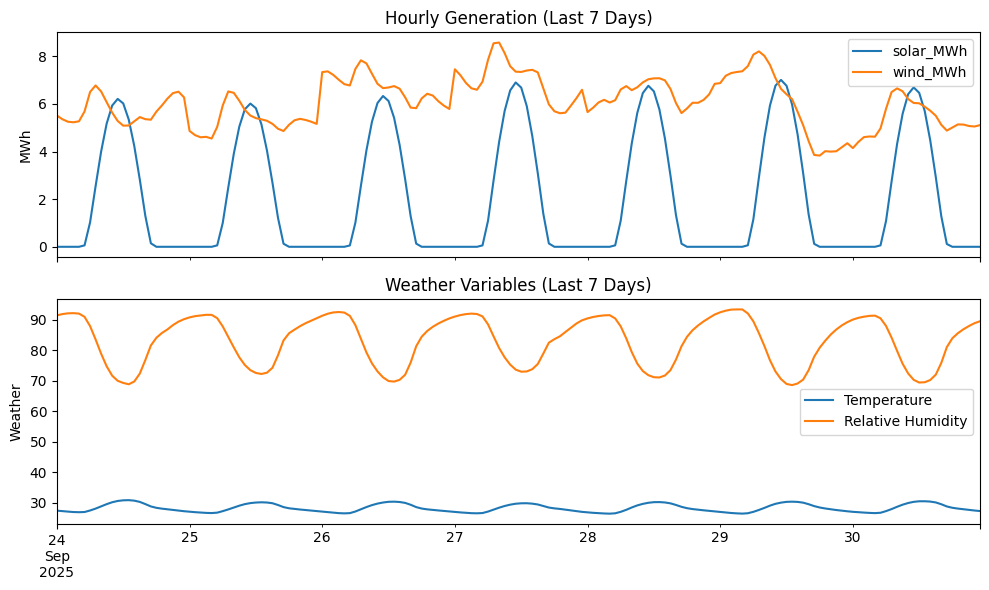

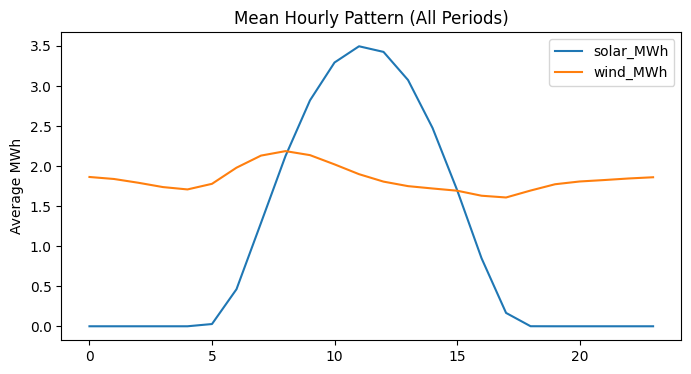

✅ Validation summary complete.


In [ ]:
# ===============================
# 🔍 Validation Summary — Segment 5.5
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

PROCESSED_PATH = Path("data/processed")
TARGET_STATE = "Tamil Nadu"

# Load outputs
df_hourly = pd.read_csv(PROCESSED_PATH / f"cea_renewables_{TARGET_STATE.replace(' ','_').lower()}_hourly.csv",
                        index_col=0, parse_dates=True)
df_daily  = pd.read_csv(PROCESSED_PATH / f"cea_renewables_{TARGET_STATE.replace(' ','_').lower()}_daily.csv",
                        index_col=0, parse_dates=True)

print(f"Hourly shape: {df_hourly.shape}, Daily shape: {df_daily.shape}")

# --- 1️⃣ Mass-balance check
agg_daily = df_hourly.resample("D")[["solar_MWh","wind_MWh"]].sum()
diff = (agg_daily - df_daily[["solar_MWh","wind_MWh"]]).abs().sum().sum()
print(f"Mass-balance total difference: {diff:.6f} MWh")
if diff < 1e-3:
    print("✅ Mass-balance preserved.")
else:
    print("⚠️ Small discrepancy detected.")

# --- 2️⃣ Plot one week sample (random or last week)
sample = df_hourly.last("7D")

fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sample[["solar_MWh","wind_MWh"]].plot(ax=ax[0])
ax[0].set_title("Hourly Generation (Last 7 Days)")
ax[0].set_ylabel("MWh")

if set(["Temperature","Relative Humidity"]).issubset(df_hourly.columns):
    df_hourly[["Temperature","Relative Humidity"]].last("7D").plot(ax=ax[1])
    ax[1].set_ylabel("Weather")
    ax[1].set_title("Weather Variables (Last 7 Days)")
else:
    ax[1].text(0.5, 0.5, "Weather columns not available", ha="center", va="center")

plt.tight_layout()
plt.show()

# --- 3️⃣ Hour-of-day solar pattern
hourly_mean = df_hourly.groupby(df_hourly.index.hour)[["solar_MWh","wind_MWh"]].mean()
hourly_mean.plot(title="Mean Hourly Pattern (All Periods)", figsize=(8,4))
plt.ylabel("Average MWh")
plt.show()

print("✅ Validation summary complete.")


In [ ]:
# ===============================
# 🔹 Segment 6: Group & Log Auxiliary Datasets
# Updated to use:
#   • GEFCom + Load_Dataset from Segment 5 (fe_results)
#   • CEA + NREL from Segment 5.5 (saved CSVs)
# (Grouped Metadata Logging + Overlap Safeguard)
# ===============================

from IPython.display import display
import pandas as pd
import json
import os

# -------------------------------
# Aggregation metadata logging
# -------------------------------
aggregation_metadata = {}

def log_aggregation_metadata(name, df):
    aggregation_metadata[name] = {
        "shape": df.shape,
        "rows": len(df),
        "missing": int(df.isna().sum().sum()),
        "start_time": str(df.index.min()) if not df.empty else None,
        "end_time": str(df.index.max()) if not df.empty else None
    }

def preview_dataset(df, name, n=5):
    print(f"\n🔹 {name} - SAMPLE preview (first {n} rows):")
    display(df.head(n))
    print("-" * 60)

# -------------------------------
# 1️⃣ Group datasets by type
# -------------------------------
dataset_groups = {
    "GEFCom": {},
    "Load_Dataset": {},
    "CEA": {},
    "NREL": {}
}

# ✅ GEFCom and Load_Dataset from Segment 5
if 'fe_results' in globals():
    for name, df in fe_results.items():
        if "GEFCom" in name:
            dataset_groups["GEFCom"][name] = df
        elif "Load_Dataset" in name:
            dataset_groups["Load_Dataset"][name] = df

# ✅ CEA + NREL from Segment 5.5 (files already saved there)
TARGET_STATE = "Tamil Nadu"
PROCESSED_PATH = "data/processed"

cea_file   = os.path.join(PROCESSED_PATH, f"cea_renewables_{TARGET_STATE.replace(' ','_').lower()}_daily.csv")
nrel_file  = os.path.join(PROCESSED_PATH, f"cea_renewables_{TARGET_STATE.replace(' ','_').lower()}_hourly.csv")

if os.path.exists(cea_file):
    df_cea = pd.read_csv(cea_file, index_col=0, parse_dates=True)
    dataset_groups["CEA"][f"CEA_Daily_{TARGET_STATE}"] = df_cea
else:
    print(f"⚠️ CEA daily file not found: {cea_file}")

if os.path.exists(nrel_file):
    df_nrel = pd.read_csv(nrel_file, index_col=0, parse_dates=True)
    dataset_groups["NREL"][f"NREL_Disaggregated_{TARGET_STATE}"] = df_nrel
else:
    print(f"⚠️ NREL disaggregated file not found: {nrel_file}")

# -------------------------------
# 2️⃣ Log metadata for each group
# -------------------------------
for group_name, group in dataset_groups.items():
    if not group:
        print(f"\n⚠️ No datasets found for group: {group_name}")
        continue
    print(f"\n🔹 Processing dataset group: {group_name}")
    for name, df in group.items():
        if isinstance(df, dict):
            for sub_name, sub_df in df.items():
                if sub_df.empty:
                    print(f"⚠️ Empty dataset skipped: {name} → {sub_name}")
                    continue
                sub_df.index = pd.to_datetime(sub_df.index)
                log_aggregation_metadata(f"{name} → {sub_name}", sub_df)
                preview_dataset(sub_df, f"{name} → {sub_name}")
        else:
            if df.empty:
                print(f"⚠️ Empty dataset skipped: {name}")
                continue
            if not isinstance(df.index, pd.DatetimeIndex):
                try:
                    df.index = pd.to_datetime(df.index)
                except Exception as e:
                    print(f"⚠️ Could not convert index to datetime for {name}: {e}")
            log_aggregation_metadata(name, df)
            preview_dataset(df, name)

# -------------------------------
# 3️⃣ Save metadata
# -------------------------------
os.makedirs("data/group_metadata", exist_ok=True)
with open("data/group_metadata/dataset_groups_metadata.json", "w") as f:
    json.dump(aggregation_metadata, f, indent=2)

print("✅ Segment 6 completed: Dataset groups logged and ready for downstream processing.")



🔹 Processing dataset group: GEFCom

🔹 GEFCom_Load_Task 2_L2-train - SAMPLE preview (first 5 rows):


ZONEID     TIMESTAMP      LOAD        w1       w2  \
datetime                                                                 
2010-10-01 01:00:00       1  1012010 1:00 -0.172854  0.787514  0.94845   
2010-10-01 02:00:00       1  1012010 2:00 -0.598270  0.787514  0.94845   
2010-10-01 03:00:00       1  1012010 3:00 -0.839168  0.708208  0.94845   
2010-10-01 04:00:00       1  1012010 4:00 -0.987807  0.628903  0.94845   
2010-10-01 05:00:00       1  1012010 5:00 -1.013434  0.311680  0.57034   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2010-10-01 01:00:00  0.571356  0.049792  0.644757  0.767244  0.547939  ...   
2010-10-01 02:00:00  0.477971  0.049792  0.644757  0.767244  0.647759  ...   
2010-10-01 03:00:00  0.477971  0.049792  0.547059  0.659112  0.647759  ...   
2010-10-01 04:00:00  0.477971 -0.046680  0.449360  0.659112  0.547939  ...   
2010-10-01 05:00:00  0.477971 -0.143153  0.351662  0.659112  0.547939  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2010-10-01 01:00:00        NaN        NaN       -0.172854        -0.172854   
2010-10-01 02:00:00        NaN        NaN       -0.385562        -0.385562   
2010-10-01 03:00:00        NaN        NaN       -0.536764        -0.536764   
2010-10-01 04:00:00  -0.172854        NaN       -0.808415        -0.649525   
2010-10-01 05:00:00  -0.598270        NaN       -0.946803        -0.722306   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2010-10-01 01:00:00     1        4           0           0    0.374684   
2010-10-01 02:00:00     2        4           0           0    0.342556   
2010-10-01 03:00:00     3        4           0           0    0.310694   
2010-10-01 04:00:00     4        4           0           0    0.279110   
2010-10-01 05:00:00     5        4           0           0    0.247807   

                     LOAD_seasonal  
datetime                            
2010-10-01 01:00:00      -0.648598  
2010-10-01 02:00:00      -1.040289  
2010-10-01 03:00:00      -1.255115  
2010-10-01 04:00:00      -1.376912  
2010-10-01 05:00:00      -1.390292  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 15_L15-train - SAMPLE preview (first 5 rows):


ZONEID     TIMESTAMP      LOAD        w1        w2  \
datetime                                                                  
2011-11-01 01:00:00       1  1112011 1:00 -0.515202 -1.453887 -0.139908   
2011-11-01 02:00:00       1  1112011 2:00 -0.580533 -1.453887 -0.476248   
2011-11-01 03:00:00       1  1112011 3:00 -0.617282 -1.527512 -0.560333   
2011-11-01 04:00:00       1  1112011 4:00 -0.531535 -1.601137 -0.560333   
2011-11-01 05:00:00       1  1112011 5:00 -0.331458 -1.601137 -0.560333   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-11-01 01:00:00 -1.381887 -1.449711 -0.477154 -0.382968 -0.401060  ...   
2011-11-01 02:00:00 -1.471766 -1.628903 -0.648373 -0.483675 -0.401060  ...   
2011-11-01 03:00:00 -1.651523 -1.360115 -0.648373 -0.483675 -0.490184  ...   
2011-11-01 04:00:00 -1.561644 -1.449711 -0.819592 -0.382968 -0.401060  ...   
2011-11-01 05:00:00 -1.741402 -1.360115 -0.905201 -0.382968 -0.579309  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-11-01 01:00:00        NaN        NaN       -0.515202        -0.515202   
2011-11-01 02:00:00        NaN        NaN       -0.547867        -0.547867   
2011-11-01 03:00:00        NaN        NaN       -0.571006        -0.571006   
2011-11-01 04:00:00  -0.515202        NaN       -0.576450        -0.561138   
2011-11-01 05:00:00  -0.580533        NaN       -0.493425        -0.515202   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-11-01 01:00:00     1        1           0           0   -0.103524   
2011-11-01 02:00:00     2        1           0           0   -0.081808   
2011-11-01 03:00:00     3        1           0           0   -0.060424   
2011-11-01 04:00:00     4        1           0           0   -0.039392   
2011-11-01 05:00:00     5        1           0           0   -0.018728   

                     LOAD_seasonal  
datetime                            
2011-11-01 01:00:00      -0.367494  
2011-11-01 02:00:00      -0.405089  
2011-11-01 03:00:00      -0.409778  
2011-11-01 04:00:00      -0.315560  
2011-11-01 05:00:00      -0.047931  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 6_L6-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-02-01 01:00:00       1  212011 1:00  0.557047 -0.700185 -0.886622   
2011-02-01 02:00:00       1  212011 2:00  0.518363 -0.700185 -0.886622   
2011-02-01 03:00:00       1  212011 3:00  0.532178 -0.700185 -1.190800   
2011-02-01 04:00:00       1  212011 4:00  0.626126 -0.700185 -1.190800   
2011-02-01 05:00:00       1  212011 5:00  0.825073 -0.774272 -1.190800   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-02-01 01:00:00 -0.657773 -0.771839 -0.865649 -0.765339 -0.929557  ...   
2011-02-01 02:00:00 -0.657773 -0.855027 -0.948103 -0.849568 -0.929557  ...   
2011-02-01 03:00:00 -0.657773 -0.855027 -0.948103 -0.933798 -1.009858  ...   
2011-02-01 04:00:00 -0.738922 -0.855027 -1.030557 -0.933798 -1.009858  ...   
2011-02-01 05:00:00 -0.738922 -0.855027 -1.030557 -0.933798 -1.009858  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-02-01 01:00:00        NaN        NaN        0.557047         0.557047   
2011-02-01 02:00:00        NaN        NaN        0.537705         0.537705   
2011-02-01 03:00:00        NaN        NaN        0.535863         0.535863   
2011-02-01 04:00:00   0.557047        NaN        0.558889         0.558428   
2011-02-01 05:00:00   0.518363        NaN        0.661126         0.611757   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-02-01 01:00:00     1        1           0           0    0.980462   
2011-02-01 02:00:00     2        1           0           0    0.928131   
2011-02-01 03:00:00     3        1           0           0    0.875934   
2011-02-01 04:00:00     4        1           0           0    0.823877   
2011-02-01 05:00:00     5        1           0           0    0.771962   

                     LOAD_seasonal  
datetime                            
2011-02-01 01:00:00      -0.451120  
2011-02-01 02:00:00      -0.477979  
2011-02-01 03:00:00      -0.441988  
2011-02-01 04:00:00      -0.322926  
2011-02-01 05:00:00      -0.027684  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 7_L7-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-03-01 01:00:00       1  312011 1:00 -1.685308  0.342320  0.121213   
2011-03-01 02:00:00       1  312011 2:00 -1.762863  0.259469  0.121213   
2011-03-01 03:00:00       1  312011 3:00 -1.756119  0.176617  0.121213   
2011-03-01 04:00:00       1  312011 4:00 -1.634728  0.010913 -0.325677   
2011-03-01 05:00:00       1  312011 5:00 -1.348108 -0.237642 -0.504433   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-03-01 01:00:00 -0.014721  0.174491  0.601901  0.820221  0.551120  ...   
2011-03-01 02:00:00 -0.200362  0.082809  0.601901 -0.032224  0.645685  ...   
2011-03-01 03:00:00 -0.293182 -0.100554  0.422847 -0.032224  0.551120  ...   
2011-03-01 04:00:00 -0.386002 -0.375599  0.512374 -0.138780  0.078296  ...   
2011-03-01 05:00:00 -0.571642 -0.558963  0.333320 -0.351891 -0.110834  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-03-01 01:00:00        NaN        NaN       -1.685308        -1.685308   
2011-03-01 02:00:00        NaN        NaN       -1.724085        -1.724085   
2011-03-01 03:00:00        NaN        NaN       -1.734763        -1.734763   
2011-03-01 04:00:00  -1.685308        NaN       -1.717903        -1.709755   
2011-03-01 05:00:00  -1.762863        NaN       -1.579652        -1.637425   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-03-01 01:00:00     1        1           0           0   -0.213516   
2011-03-01 02:00:00     2        1           0           0   -0.199021   
2011-03-01 03:00:00     3        1           0           0   -0.184852   
2011-03-01 04:00:00     4        1           0           0   -0.171025   
2011-03-01 05:00:00     5        1           0           0   -0.157553   

                     LOAD_seasonal  
datetime                            
2011-03-01 01:00:00      -1.391243  
2011-03-01 02:00:00      -1.498527  
2011-03-01 03:00:00      -1.513719  
2011-03-01 04:00:00      -1.389009  
2011-03-01 05:00:00      -1.099978  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 1_L1-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2001-01-01 01:00:00       1  112001 1:00 -0.315044 -1.981662 -1.961378   
2001-01-01 02:00:00       1  112001 2:00 -0.315044 -2.096939 -1.961378   
2001-01-01 03:00:00       1  112001 3:00 -0.315044 -1.981662 -2.255699   
2001-01-01 04:00:00       1  112001 4:00 -0.315044 -2.096939 -2.373427   
2001-01-01 05:00:00       1  112001 5:00 -0.315044 -1.981662 -2.373427   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2001-01-01 01:00:00 -2.323240 -2.309763 -2.335990 -2.115413 -2.274399  ...   
2001-01-01 02:00:00 -2.323240 -2.309763 -2.397200 -2.300029 -2.274399  ...   
2001-01-01 03:00:00 -2.323240 -2.249107 -2.458409 -2.300029 -2.461877  ...   
2001-01-01 04:00:00 -2.261666 -2.249107 -2.458409 -2.300029 -2.524370  ...   
2001-01-01 05:00:00 -2.261666 -2.370419 -2.458409 -2.300029 -2.524370  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2001-01-01 01:00:00        NaN        NaN       -0.315044        -0.315044   
2001-01-01 02:00:00        NaN        NaN       -0.315044        -0.315044   
2001-01-01 03:00:00        NaN        NaN       -0.315044        -0.315044   
2001-01-01 04:00:00  -0.315044        NaN       -0.315044        -0.315044   
2001-01-01 05:00:00  -0.315044        NaN       -0.315044        -0.315044   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2001-01-01 01:00:00     1        0           0           0   -0.315044   
2001-01-01 02:00:00     2        0           0           0   -0.315044   
2001-01-01 03:00:00     3        0           0           0   -0.315044   
2001-01-01 04:00:00     4        0           0           0   -0.315044   
2001-01-01 05:00:00     5        0           0           0   -0.315044   

                     LOAD_seasonal  
datetime                            
2001-01-01 01:00:00  -3.553061e-17  
2001-01-01 02:00:00   6.388957e-18  
2001-01-01 03:00:00  -3.553906e-17  
2001-01-01 04:00:00   6.380020e-18  
2001-01-01 05:00:00  -7.599522e-18  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 13_L13-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-09-01 01:00:00       1  912011 1:00 -1.148495 -0.792529 -1.745195   
2011-09-01 02:00:00       1  912011 2:00 -1.275790 -0.901990 -2.002208   
2011-09-01 03:00:00       1  912011 3:00 -1.381870 -1.011451 -2.002208   
2011-09-01 04:00:00       1  912011 4:00 -1.437562 -1.011451 -2.002208   
2011-09-01 05:00:00       1  912011 5:00 -1.411042 -1.120912 -2.130715   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-09-01 01:00:00  0.129916  0.290597 -1.166394 -0.986878 -1.270173  ...   
2011-09-01 02:00:00  0.009220  0.055243 -1.166394 -1.129617 -1.270173  ...   
2011-09-01 03:00:00 -0.232173 -0.650820 -1.166394 -1.129617 -1.270173  ...   
2011-09-01 04:00:00 -0.232173 -0.650820 -1.298149 -1.272355 -1.411130  ...   
2011-09-01 05:00:00 -0.352869 -0.650820 -1.298149 -2.128786 -1.552086  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-09-01 01:00:00        NaN        NaN       -1.148495        -1.148495   
2011-09-01 02:00:00        NaN        NaN       -1.212143        -1.212143   
2011-09-01 03:00:00        NaN        NaN       -1.268718        -1.268718   
2011-09-01 04:00:00  -1.148495        NaN       -1.365074        -1.310929   
2011-09-01 05:00:00  -1.275790        NaN       -1.410158        -1.330952   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-09-01 01:00:00     1        3           0           0   -0.301444   
2011-09-01 02:00:00     2        3           0           0   -0.293941   
2011-09-01 03:00:00     3        3           0           0   -0.286433   
2011-09-01 04:00:00     4        3           0           0   -0.278920   
2011-09-01 05:00:00     5        3           0           0   -0.271399   

                     LOAD_seasonal  
datetime                            
2011-09-01 01:00:00      -0.830282  
2011-09-01 02:00:00      -0.978351  
2011-09-01 03:00:00      -1.092455  
2011-09-01 04:00:00      -1.164202  
2011-09-01 05:00:00      -1.161404  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 5_L5-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-01-01 01:00:00       1  112011 1:00 -0.563094  0.074374  0.047444   
2011-01-01 02:00:00       1  112011 2:00 -0.656699 -0.017391  0.156390   
2011-01-01 03:00:00       1  112011 3:00 -0.739606 -0.017391  0.047444   
2011-01-01 04:00:00       1  112011 4:00 -0.728908  0.074374  0.047444   
2011-01-01 05:00:00       1  112011 5:00 -0.648675  0.166139 -0.170448   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-01-01 01:00:00  0.961795  0.226733 -0.130769  0.495474 -0.543377  ...   
2011-01-01 02:00:00  1.165199  0.735446 -0.232010  0.379113 -0.443409  ...   
2011-01-01 03:00:00  1.266901  0.531961 -0.130769  0.379113 -0.543377  ...   
2011-01-01 04:00:00  1.470305  0.837189 -0.130769 -0.202694 -0.643346  ...   
2011-01-01 05:00:00  1.470305  0.531961  0.274193 -0.086333 -0.643346  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-01-01 01:00:00        NaN        NaN       -0.563094        -0.563094   
2011-01-01 02:00:00        NaN        NaN       -0.609896        -0.609896   
2011-01-01 03:00:00        NaN        NaN       -0.653133        -0.653133   
2011-01-01 04:00:00  -0.563094        NaN       -0.708404        -0.672077   
2011-01-01 05:00:00  -0.656699        NaN       -0.705730        -0.667396   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-01-01 01:00:00     1        5           1           0   -0.984313   
2011-01-01 02:00:00     2        5           1           0   -0.994001   
2011-01-01 03:00:00     3        5           1           0   -1.003641   
2011-01-01 04:00:00     4        5           1           0   -1.013238   
2011-01-01 05:00:00     5        5           1           0   -1.022801   

                     LOAD_seasonal  
datetime                            
2011-01-01 01:00:00       0.367142  
2011-01-01 02:00:00       0.256293  
2011-01-01 03:00:00       0.195458  
2011-01-01 04:00:00       0.241127  
2011-01-01 05:00:00       0.367191  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 3_L3-train - SAMPLE preview (first 5 rows):


ZONEID     TIMESTAMP      LOAD        w1        w2  \
datetime                                                                  
2010-11-01 01:00:00       1  1112010 1:00 -1.748249 -0.277027  0.135458   
2010-11-01 02:00:00       1  1112010 2:00 -1.877421 -0.440317  0.135458   
2010-11-01 03:00:00       1  1112010 3:00 -1.864504 -0.603608  0.135458   
2010-11-01 04:00:00       1  1112010 4:00 -1.782695 -0.277027 -0.247012   
2010-11-01 05:00:00       1  1112010 5:00 -1.550183 -0.195382 -0.342630   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2010-11-01 01:00:00  0.000548  0.047814 -0.149880  0.446127 -0.272417  ...   
2010-11-01 02:00:00 -0.098090 -0.466013 -0.244707  0.329195 -0.474104  ...   
2010-11-01 03:00:00 -0.394004  0.253345 -0.244707  0.212264  0.231800  ...   
2010-11-01 04:00:00 -0.591280  0.356111 -0.244707  0.212264  0.130956  ...   
2010-11-01 05:00:00 -0.591280  0.150580 -0.339534  0.095332  0.030113  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2010-11-01 01:00:00        NaN        NaN       -1.748249        -1.748249   
2010-11-01 02:00:00        NaN        NaN       -1.812835        -1.812835   
2010-11-01 03:00:00        NaN        NaN       -1.830058        -1.830058   
2010-11-01 04:00:00  -1.748249        NaN       -1.841540        -1.818217   
2010-11-01 05:00:00  -1.877421        NaN       -1.732461        -1.764610   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2010-11-01 01:00:00     1        0           0           0   -0.990425   
2010-11-01 02:00:00     2        0           0           0   -0.955449   
2010-11-01 03:00:00     3        0           0           0   -0.920576   
2010-11-01 04:00:00     4        0           0           0   -0.885817   
2010-11-01 05:00:00     5        0           0           0   -0.851181   

                     LOAD_seasonal  
datetime                            
2010-11-01 01:00:00      -0.754041  
2010-11-01 02:00:00      -0.913064  
2010-11-01 03:00:00      -0.895716  
2010-11-01 04:00:00      -0.840857  
2010-11-01 05:00:00      -0.639562  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 12_L12-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-08-01 01:00:00       1  812011 1:00 -0.734977 -0.831052 -0.819732   
2011-08-01 02:00:00       1  812011 2:00 -0.868926 -0.945658 -0.819732   
2011-08-01 03:00:00       1  812011 3:00 -0.958226 -0.831052 -0.819732   
2011-08-01 04:00:00       1  812011 4:00 -0.980551 -0.831052 -0.819732   
2011-08-01 05:00:00       1  812011 5:00 -0.969388 -0.716445 -0.819732   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-08-01 01:00:00 -0.262757 -0.663344 -0.698805 -0.776222 -0.908223  ...   
2011-08-01 02:00:00 -0.262757 -0.663344 -0.698805 -0.622097 -0.908223  ...   
2011-08-01 03:00:00 -0.262757 -0.663344 -0.698805 -0.776222 -0.908223  ...   
2011-08-01 04:00:00 -0.262757 -0.663344 -0.698805 -0.776222 -0.908223  ...   
2011-08-01 05:00:00 -0.522201 -0.532504 -0.698805 -0.622097 -1.050210  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-08-01 01:00:00        NaN        NaN       -0.734977        -0.734977   
2011-08-01 02:00:00        NaN        NaN       -0.801952        -0.801952   
2011-08-01 03:00:00        NaN        NaN       -0.854043        -0.854043   
2011-08-01 04:00:00  -0.734977        NaN       -0.935901        -0.885670   
2011-08-01 05:00:00  -0.868926        NaN       -0.969388        -0.902414   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-08-01 01:00:00     1        0           0           0    0.141175   
2011-08-01 02:00:00     2        0           0           0    0.151705   
2011-08-01 03:00:00     3        0           0           0    0.162257   
2011-08-01 04:00:00     4        0           0           0    0.172831   
2011-08-01 05:00:00     5        0           0           0    0.183430   

                     LOAD_seasonal  
datetime                            
2011-08-01 01:00:00      -0.847993  
2011-08-01 02:00:00      -1.011028  
2011-08-01 03:00:00      -1.129639  
2011-08-01 04:00:00      -1.181027  
2011-08-01 05:00:00      -1.187346  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 14_L14-train - SAMPLE preview (first 5 rows):


ZONEID     TIMESTAMP      LOAD        w1        w2  \
datetime                                                                  
2011-10-01 01:00:00       1  1012011 1:00 -1.158944  0.073239 -0.175259   
2011-10-01 02:00:00       1  1012011 2:00 -1.495113 -0.094939 -0.267214   
2011-10-01 03:00:00       1  1012011 3:00 -1.707690 -0.431294 -0.267214   
2011-10-01 04:00:00       1  1012011 4:00 -1.806564 -0.263117 -0.451124   
2011-10-01 05:00:00       1  1012011 5:00 -1.826338 -0.431294 -0.451124   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-10-01 01:00:00 -0.352894 -0.383634  0.047647 -0.140691 -0.097388  ...   
2011-10-01 02:00:00 -0.352894 -0.287790 -0.150395 -0.458850 -0.301205  ...   
2011-10-01 03:00:00 -0.352894 -0.479478 -0.348438 -0.352797 -0.301205  ...   
2011-10-01 04:00:00 -0.534465 -0.575322 -0.546481 -0.458850 -0.403114  ...   
2011-10-01 05:00:00 -0.625251 -0.767011 -0.546481 -0.458850 -0.403114  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-10-01 01:00:00        NaN        NaN       -1.158944        -1.158944   
2011-10-01 02:00:00        NaN        NaN       -1.327028        -1.327028   
2011-10-01 03:00:00        NaN        NaN       -1.453916        -1.453916   
2011-10-01 04:00:00  -1.158944        NaN       -1.669789        -1.542078   
2011-10-01 05:00:00  -1.495113        NaN       -1.780197        -1.598930   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-10-01 01:00:00     1        5           1           0   -0.809849   
2011-10-01 02:00:00     2        5           1           0   -0.804908   
2011-10-01 03:00:00     3        5           1           0   -0.799983   
2011-10-01 04:00:00     4        5           1           0   -0.795079   
2011-10-01 05:00:00     5        5           1           0   -0.790199   

                     LOAD_seasonal  
datetime                            
2011-10-01 01:00:00      -0.412298  
2011-10-01 02:00:00      -0.710019  
2011-10-01 03:00:00      -0.893915  
2011-10-01 04:00:00      -0.976432  
2011-10-01 05:00:00      -0.973486  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 8_L8-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-04-01 01:00:00       1  412011 1:00  0.536784 -1.556776 -1.496507   
2011-04-01 02:00:00       1  412011 2:00  0.390220 -1.556776 -1.496507   
2011-04-01 03:00:00       1  412011 3:00  0.348999 -1.724799 -1.496507   
2011-04-01 04:00:00       1  412011 4:00  0.417701 -1.724799 -1.496507   
2011-04-01 05:00:00       1  412011 5:00  0.600906 -1.640788 -1.675670   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-04-01 01:00:00 -2.076754 -1.708215 -1.577216 -1.877772 -1.571885  ...   
2011-04-01 02:00:00 -2.164432 -1.708215 -1.577216 -1.877772 -1.571885  ...   
2011-04-01 03:00:00 -2.164432 -1.888660 -1.577216 -1.877772 -1.671609  ...   
2011-04-01 04:00:00 -2.252111 -2.069105 -1.673707 -1.877772 -1.671609  ...   
2011-04-01 05:00:00 -2.164432 -2.249550 -1.577216 -1.877772 -1.671609  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-04-01 01:00:00        NaN        NaN        0.536784         0.536784   
2011-04-01 02:00:00        NaN        NaN        0.463502         0.463502   
2011-04-01 03:00:00        NaN        NaN        0.425335         0.425335   
2011-04-01 04:00:00   0.536784        NaN        0.385640         0.423426   
2011-04-01 05:00:00   0.390220        NaN        0.455869         0.458922   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-04-01 01:00:00     1        4           0           0    1.533045   
2011-04-01 02:00:00     2        4           0           0    1.518180   
2011-04-01 03:00:00     3        4           0           0    1.503185   
2011-04-01 04:00:00     4        4           0           0    1.488041   
2011-04-01 05:00:00     5        4           0           0    1.472731   

                     LOAD_seasonal  
datetime                            
2011-04-01 01:00:00      -0.989528  
2011-04-01 02:00:00      -1.131410  
2011-04-01 03:00:00      -1.158504  
2011-04-01 04:00:00      -1.071229  
2011-04-01 05:00:00      -0.872488  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 10_L10-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-06-01 01:00:00       1  612011 1:00 -0.692096 -0.572333 -0.483009   
2011-06-01 02:00:00       1  612011 2:00 -0.967847 -0.800064 -0.724849   
2011-06-01 03:00:00       1  612011 3:00 -1.170196 -0.913930 -0.724849   
2011-06-01 04:00:00       1  612011 4:00 -1.287242 -0.913930 -0.724849   
2011-06-01 05:00:00       1  612011 5:00 -1.330886 -1.027795 -0.966689   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-06-01 01:00:00 -0.004340 -0.642776 -0.645311 -0.421519 -0.547747  ...   
2011-06-01 02:00:00 -0.379290 -0.519363 -1.037952 -0.667163 -0.683179  ...   
2011-06-01 03:00:00 -0.629257 -0.395950 -1.037952 -0.789985 -0.818611  ...   
2011-06-01 04:00:00 -0.754241 -0.766189 -1.299712 -0.667163 -0.954043  ...   
2011-06-01 05:00:00 -0.879225 -0.766189 -1.299712 -0.667163 -1.224907  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-06-01 01:00:00        NaN        NaN       -0.692096        -0.692096   
2011-06-01 02:00:00        NaN        NaN       -0.829972        -0.829972   
2011-06-01 03:00:00        NaN        NaN       -0.943380        -0.943380   
2011-06-01 04:00:00  -0.692096        NaN       -1.141762        -1.029345   
2011-06-01 05:00:00  -0.967847        NaN       -1.262775        -1.089653   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-06-01 01:00:00     1        2           0           0    0.134015   
2011-06-01 02:00:00     2        2           0           0    0.142954   
2011-06-01 03:00:00     3        2           0           0    0.151880   
2011-06-01 04:00:00     4        2           0           0    0.160787   
2011-06-01 05:00:00     5        2           0           0    0.169667   

                     LOAD_seasonal  
datetime                            
2011-06-01 01:00:00      -0.865057  
2011-06-01 02:00:00      -1.135501  
2011-06-01 03:00:00      -1.326533  
2011-06-01 04:00:00      -1.444893  
2011-06-01 05:00:00      -1.487791  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 9_L9-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-05-01 01:00:00       1  512011 1:00 -1.055994 -1.528916 -1.233310   
2011-05-01 02:00:00       1  512011 2:00 -1.202254 -1.623244 -1.605555   
2011-05-01 03:00:00       1  512011 3:00 -1.264595 -1.811902 -1.977800   
2011-05-01 04:00:00       1  512011 4:00 -1.286174 -1.717573 -2.070861   
2011-05-01 05:00:00       1  512011 5:00 -1.278981 -1.811902 -2.070861   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-05-01 01:00:00 -1.068465 -1.366854 -1.220975 -1.470332 -1.037432  ...   
2011-05-01 02:00:00 -0.980656 -0.689346 -1.326641 -1.470332 -1.135882  ...   
2011-05-01 03:00:00 -1.068465 -0.689346 -1.432306 -1.859215 -1.431232  ...   
2011-05-01 04:00:00 -1.244084 -0.979707 -1.326641 -2.150877 -1.431232  ...   
2011-05-01 05:00:00 -1.331893 -1.173281 -1.326641 -2.053657 -1.431232  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-05-01 01:00:00        NaN        NaN       -1.055994        -1.055994   
2011-05-01 02:00:00        NaN        NaN       -1.129124        -1.129124   
2011-05-01 03:00:00        NaN        NaN       -1.174281        -1.174281   
2011-05-01 04:00:00  -1.055994        NaN       -1.251008        -1.202254   
2011-05-01 05:00:00  -1.202254        NaN       -1.276583        -1.217600   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-05-01 01:00:00     1        6           1           0   -0.471744   
2011-05-01 02:00:00     2        6           1           0   -0.474360   
2011-05-01 03:00:00     3        6           1           0   -0.476938   
2011-05-01 04:00:00     4        6           1           0   -0.479474   
2011-05-01 05:00:00     5        6           1           0   -0.481970   

                     LOAD_seasonal  
datetime                            
2011-05-01 01:00:00      -0.600897  
2011-05-01 02:00:00      -0.745156  
2011-05-01 03:00:00      -0.816060  
2011-05-01 04:00:00      -0.835842  
2011-05-01 05:00:00      -0.806745  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 11_L11-train - SAMPLE preview (first 5 rows):


ZONEID    TIMESTAMP      LOAD        w1        w2  \
datetime                                                                 
2011-07-01 01:00:00       1  712011 1:00 -1.150690 -1.624260 -1.736573   
2011-07-01 02:00:00       1  712011 2:00 -1.384732 -1.867727 -1.736573   
2011-07-01 03:00:00       1  712011 3:00 -1.536067 -1.867727 -1.736573   
2011-07-01 04:00:00       1  712011 4:00 -1.636371 -2.111194 -1.736573   
2011-07-01 05:00:00       1  712011 5:00 -1.666286 -2.354661 -1.736573   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2011-07-01 01:00:00 -1.424956 -2.101517 -0.863311 -1.859882 -1.615217  ...   
2011-07-01 02:00:00 -1.559121 -2.101517 -0.994769 -1.422494 -1.615217  ...   
2011-07-01 03:00:00 -1.827449 -2.224446 -1.257684 -1.859882 -1.615217  ...   
2011-07-01 04:00:00 -1.961614 -2.347374 -1.257684 -1.859882 -1.615217  ...   
2011-07-01 05:00:00 -1.961614 -2.224446 -1.389142 -1.714086 -1.755638  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2011-07-01 01:00:00        NaN        NaN       -1.150690        -1.150690   
2011-07-01 02:00:00        NaN        NaN       -1.267711        -1.267711   
2011-07-01 03:00:00        NaN        NaN       -1.357163        -1.357163   
2011-07-01 04:00:00  -1.150690        NaN       -1.519057        -1.426965   
2011-07-01 05:00:00  -1.384732        NaN       -1.612908        -1.474829   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2011-07-01 01:00:00     1        4           0           0   -0.351812   
2011-07-01 02:00:00     2        4           0           0   -0.350230   
2011-07-01 03:00:00     3        4           0           0   -0.348610   
2011-07-01 04:00:00     4        4           0           0   -0.346945   
2011-07-01 05:00:00     5        4           0           0   -0.345228   

                     LOAD_seasonal  
datetime                            
2011-07-01 01:00:00      -0.767842  
2011-07-01 02:00:00      -1.017108  
2011-07-01 03:00:00      -1.186022  
2011-07-01 04:00:00      -1.296147  
2011-07-01 05:00:00      -1.347362  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 GEFCom_Load_Task 4_L4-train - SAMPLE preview (first 5 rows):


ZONEID     TIMESTAMP      LOAD        w1        w2  \
datetime                                                                  
2010-12-01 01:00:00       1  1212010 1:00 -2.992180  4.034410  3.815793   
2010-12-01 02:00:00       1  1212010 2:00 -3.145666  3.590354  3.815793   
2010-12-01 03:00:00       1  1212010 3:00 -3.169080  3.146297  3.815793   
2010-12-01 04:00:00       1  1212010 4:00 -3.192493  2.702240  3.815793   
2010-12-01 05:00:00       1  1212010 5:00 -3.135261  2.147169  3.815793   

                           w3        w4        w5        w6        w7  ...  \
datetime                                                               ...   
2010-12-01 01:00:00  2.278956  3.252097  3.595228  3.459870  3.338814  ...   
2010-12-01 02:00:00  2.159011  2.784775  3.706121  3.574542  3.450659  ...   
2010-12-01 03:00:00  1.319396  2.434284  3.595228  3.345199  3.450659  ...   
2010-12-01 04:00:00  1.079506  2.200622  3.595228  3.345199  3.562504  ...   
2010-12-01 05:00:00  0.839615  1.966961  3.595228  3.459870  3.562504  ...   

                     LOAD_lag3  LOAD_lag6  LOAD_rollmean3  LOAD_rollmean12  \
datetime                                                                     
2010-12-01 01:00:00        NaN        NaN       -2.992180        -2.992180   
2010-12-01 02:00:00        NaN        NaN       -3.068923        -3.068923   
2010-12-01 03:00:00        NaN        NaN       -3.102309        -3.102309   
2010-12-01 04:00:00  -2.992180        NaN       -3.169080        -3.124855   
2010-12-01 05:00:00  -3.145666        NaN       -3.165611        -3.126936   

                     hour  weekday  is_weekend  is_holiday  LOAD_trend  \
datetime                                                                 
2010-12-01 01:00:00     1        2           0           0   -2.822205   
2010-12-01 02:00:00     2        2           0           0   -2.769681   
2010-12-01 03:00:00     3        2           0           0   -2.717314   
2010-12-01 04:00:00     4        2           0           0   -2.665114   
2010-12-01 05:00:00     5        2           0           0   -2.613093   

                     LOAD_seasonal  
datetime                            
2010-12-01 01:00:00      -0.102189  
2010-12-01 02:00:00      -0.367250  
2010-12-01 03:00:00      -0.442259  
2010-12-01 04:00:00      -0.516458  
2010-12-01 05:00:00      -0.493147  

[5 rows x 39 columns]

------------------------------------------------------------

🔹 Processing dataset group: Load_Dataset

🔹 Load_Dataset - SAMPLE preview (first 5 rows):


Unnamed: 0  Power demand  temp  dwpt   rhum      wdir  \
datetime                                                                     
2021-01-01 00:30:00           3       5997.23  24.0  20.7  279.0 -0.997673   
2021-01-01 00:45:00          12       5856.02  24.0  20.7  279.0 -0.997673   
2021-01-01 01:00:00          21       5646.40  24.0  20.7  279.0 -0.997673   
2021-01-01 01:15:00          30       5468.60  24.0  20.7  279.0 -0.997673   
2021-01-01 01:30:00          39       5337.40  24.0  20.7  279.0 -0.997673   

                         wspd    pres  year  month  ...  Power demand_lag1  \
datetime                                            ...                      
2021-01-01 00:30:00  0.097083  3051.0  6063      3  ...                NaN   
2021-01-01 00:45:00  0.097083  3051.0  6063      3  ...            5997.23   
2021-01-01 01:00:00  0.097083  3051.0  6063      3  ...            5856.02   
2021-01-01 01:15:00  0.097083  3051.0  6063      3  ...            5646.40   
2021-01-01 01:30:00  0.097083  3051.0  6063      3  ...            5468.60   

                     Power demand_lag3  Power demand_lag6  \
datetime                                                    
2021-01-01 00:30:00                NaN                NaN   
2021-01-01 00:45:00                NaN                NaN   
2021-01-01 01:00:00                NaN                NaN   
2021-01-01 01:15:00            5997.23                NaN   
2021-01-01 01:30:00            5856.02                NaN   

                     Power demand_rollmean3  Power demand_rollmean12  weekday  \
datetime                                                                        
2021-01-01 00:30:00             5997.230000              5997.230000        4   
2021-01-01 00:45:00             5926.625000              5926.625000        4   
2021-01-01 01:00:00             5833.216667              5833.216667        4   
2021-01-01 01:15:00             5657.006667              5742.062500        4   
2021-01-01 01:30:00             5484.133333              5661.130000        4   

                     is_weekend  is_holiday  Power demand_trend  \
datetime                                                          
2021-01-01 00:30:00           0           0        13012.411770   
2021-01-01 00:45:00           0           0        13014.025494   
2021-01-01 01:00:00           0           0        13015.717568   
2021-01-01 01:15:00           0           0        13017.493661   
2021-01-01 01:30:00           0           0        13019.359983   

                     Power demand_seasonal  
datetime                                    
2021-01-01 00:30:00            1547.234332  
2021-01-01 00:45:00            1227.573872  
2021-01-01 01:00:00             843.886422  
2021-01-01 01:15:00             607.295116  
2021-01-01 01:30:00             359.417674  

[5 rows x 24 columns]

------------------------------------------------------------

🔹 Processing dataset group: CEA

🔹 CEA_Daily_Tamil Nadu - SAMPLE preview (first 5 rows):


solar_MWh  wind_MWh  solar_factor  wind_factor  Temperature  \
2019-10-31       8.71     12.50      0.041667     0.041667    27.376389   
2019-11-01      13.62      0.78      0.041667     0.041667    27.266111   
2019-11-02      11.77      2.09      0.041667     0.041667    27.345556   
2019-11-03      11.77      2.09      0.041667     0.041667    27.569444   
2019-11-04      13.14      0.55      0.041667     0.041667    27.836944   

            Relative Humidity     Pressure  
2019-10-31          82.111417  1009.448611  
2019-11-01          83.454042  1009.502778  
2019-11-02          84.945125  1009.484722  
2019-11-03          85.038681  1009.397222  
2019-11-04          81.001375  1009.336111

------------------------------------------------------------

🔹 Processing dataset group: NREL

🔹 NREL_Disaggregated_Tamil Nadu - SAMPLE preview (first 5 rows):


key_0  solar_MWh  wind_MWh  solar_factor  wind_factor  \
2019-10-31 00:00:00      0        0.0  0.387088           0.0     0.030967   
2019-10-31 01:00:00      1        0.0  0.387961           0.0     0.031037   
2019-10-31 02:00:00      2        0.0  0.393695           0.0     0.031496   
2019-10-31 03:00:00      3        0.0  0.400923           0.0     0.032074   
2019-10-31 04:00:00      4        0.0  0.406874           0.0     0.032550   

                     Temperature  Relative Humidity     Pressure  
2019-10-31 00:00:00    26.163333          88.608000  1008.866667  
2019-10-31 01:00:00    26.030000          89.020000  1008.300000  
2019-10-31 02:00:00    25.926667          89.247333  1008.133333  
2019-10-31 03:00:00    25.843333          89.363333  1008.333333  
2019-10-31 04:00:00    25.820000          89.316000  1008.800000

------------------------------------------------------------
✅ Segment 6 completed: Dataset groups logged and ready for downstream processing.


In [ ]:
# ===============================
# 🔹 Segment 7: Save Processed Datasets
# (Safe Overwrite + Index Uniqueness + Progress Bars + ETA + Dataset Size)
# ===============================

import json
from pathlib import Path
from tqdm import tqdm  # Progress bar

# Ensure processed directory exists
processed_dir = Path("data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# -------------------------------
# Metadata log
# -------------------------------
save_metadata = {}

def log_save_metadata(name, path, rows, cols, size_kb):
    save_metadata[name] = {
        "path": str(path),
        "rows": rows,
        "columns": cols,
        "size_kb": size_kb
    }

# -------------------------------
# Helper: Ensure unique datetime index
# -------------------------------
def ensure_unique_index(df):
    if not df.index.is_unique:
        df = df[~df.index.duplicated(keep='first')]
    return df

# -------------------------------
# Helper: Estimate dataset size in KB
# -------------------------------
def estimate_size_kb(df):
    return df.memory_usage(index=True).sum() / 1024

# ==================================================
# 🔹 Use dataset_groups created in Segment 6
# ==================================================
if "dataset_groups" not in globals():
    raise RuntimeError("⚠️ dataset_groups not found. Run Segment 6 first.")

# -------------------------------
# 1️⃣ Save GEFCom datasets
# -------------------------------
gefcom_group = dataset_groups.get("GEFCom", {})
if gefcom_group:
    print("\n🔹 Saving GEFCom datasets...")
    gefcom_group_unique = {}
    for name, df in tqdm(gefcom_group.items(), desc="Processing GEFCom datasets"):
        gefcom_group_unique[name] = ensure_unique_index(df)

    # Combined dataset
    gefcom_combined = pd.concat(gefcom_group_unique.values(), axis=1)
    gefcom_combined_path = processed_dir / "gefcom_combined.csv"
    gefcom_combined.to_csv(gefcom_combined_path, index=True)

    size_kb = estimate_size_kb(gefcom_combined)
    log_save_metadata("GEFCom_Combined", gefcom_combined_path, gefcom_combined.shape[0], gefcom_combined.shape[1], size_kb)
    print(f"✅ GEFCom combined dataset saved ({gefcom_combined.shape[0]} rows, {gefcom_combined.shape[1]} cols, ~{size_kb:.2f} KB)")

    # Separate datasets
    for name, df in tqdm(gefcom_group_unique.items(), desc="Saving individual GEFCom datasets"):
        file_path = processed_dir / f"{name}_scaled.csv"
        df.to_csv(file_path, index=True)
        size_kb = estimate_size_kb(df)
        log_save_metadata(name, file_path, df.shape[0], df.shape[1], size_kb)
else:
    print("⚠️ No GEFCom datasets found to save.")

# -------------------------------
# 2️⃣ Save NREL datasets
# -------------------------------
nrel_group = dataset_groups.get("NREL", {})
if nrel_group:
    print("\n🔹 Saving NREL datasets...")
    for name, df in tqdm(nrel_group.items(), desc="Saving NREL datasets"):
        df = ensure_unique_index(df)
        file_path = processed_dir / f"{name}_processed.csv"
        df.to_csv(file_path, index=True)
        size_kb = estimate_size_kb(df)
        log_save_metadata(name, file_path, df.shape[0], df.shape[1], size_kb)
else:
    print("⚠️ No NREL datasets found to save.")

# -------------------------------
# 3️⃣ Save Load_Dataset
# -------------------------------
load_group = dataset_groups.get("Load_Dataset", {})
if load_group:
    print("\n🔹 Saving Load_Dataset datasets...")
    for name, df in tqdm(load_group.items(), desc="Saving Load_Dataset datasets"):
        df = ensure_unique_index(df)
        load_path = processed_dir / f"{name}_processed.csv"
        df.to_csv(load_path, index=True)
        size_kb = estimate_size_kb(df)
        log_save_metadata(name, load_path, df.shape[0], df.shape[1], size_kb)
        print(f"✅ {name} saved ({df.shape[0]} rows, {df.shape[1]} cols, ~{size_kb:.2f} KB)")
else:
    print("⚠️ Load_Dataset not available or empty. Skipping.")

# -------------------------------
# 4️⃣ Save CEA datasets
# -------------------------------
cea_group = dataset_groups.get("CEA", {})
if cea_group:
    print("\n🔹 Saving CEA datasets...")
    for name, df in tqdm(cea_group.items(), desc="Saving CEA datasets"):
        df = ensure_unique_index(df)
        cea_path = processed_dir / f"{name}_processed.csv"
        df.to_csv(cea_path, index=True)
        size_kb = estimate_size_kb(df)
        log_save_metadata(name, cea_path, df.shape[0], df.shape[1], size_kb)
else:
    print("⚠️ No CEA datasets found to save.")

# -------------------------------
# 5️⃣ Save metadata summary
# -------------------------------
metadata_path = processed_dir / "processed_datasets_summary.json"
with open(metadata_path, "w") as f:
    json.dump(save_metadata, f, indent=2)
print(f"\n📄 Dataset save metadata logged: {metadata_path}")

# -------------------------------
# 6️⃣ Confirm saved files
# -------------------------------
print("\n📁 Processed files in directory:")
for file in processed_dir.glob("*.csv"):
    print(f" - {file.name}")



🔹 Saving GEFCom datasets...


Processing GEFCom datasets: 100%|██████████| 15/15 [00:00<00:00, 694.61it/s]


✅ GEFCom combined dataset saved (91127 rows, 585 cols, ~417190.80 KB)


Saving individual GEFCom datasets: 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]



🔹 Saving NREL datasets...


Saving NREL datasets: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]



🔹 Saving Load_Dataset datasets...


Saving Load_Dataset datasets: 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]


✅ Load_Dataset saved (138337 rows, 24 cols, ~25938.19 KB)

🔹 Saving CEA datasets...


Saving CEA datasets: 100%|██████████| 1/1 [00:00<00:00, 18.66it/s]


📄 Dataset save metadata logged: data/processed/processed_datasets_summary.json

📁 Processed files in directory:
 - GEFCom_Wind_Task 9_Task9_W_Zone9_cleaned.csv
 - GEFCom_Load_Task 4_L4-train_scaled.csv
 - GEFCom_Load_Task 2_L2-benchmark_cleaned.csv
 - GEFCom_Wind_Task 8_Task8_W_Zone6_cleaned.csv
 - GEFCom_Wind_Task 14_benchmark14_W_cleaned.csv
 - GEFCom_Wind_Task 12_TaskExpVars12_W_Zone5_cleaned.csv
 - GEFCom_Wind_Task 9_Task9_W_Zone8_cleaned.csv
 - GEFCom_Wind_Task 11_Task11_W_Zone2_cleaned.csv
 - GEFCom_Wind_Task 10_Task10_W_Zone10_cleaned.csv
 - GEFCom_Load_Task 13_L13-train_cleaned.csv
 - GEFCom_Wind_Task 12_TaskExpVars12_W_Zone2_cleaned.csv
 - GEFCom_Wind_Task 12_Task12_W_Zone10_cleaned.csv
 - GEFCom_Wind_Task 8_TaskExpVars8_W_Zone2_cleaned.csv
 - GEFCom_Wind_Task 7_TaskExpVars7_W_Zone4_cleaned.csv
 - GEFCom_Wind_Task 12_Task12_W_Zone7_cleaned.csv
 - GEFCom_Wind_Task 6_TaskExpVars6_W_Zone3_cleaned.csv
 - GEFCom_Wind_Task 7_Task7_W_Zone10_cleaned.csv
 - GEFCom_Wind_Task 4_Task4_W_

In [ ]:
from google.colab import drive
from pathlib import Path
import shutil
from tqdm import tqdm

# 1️⃣ Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# 2️⃣ Define source and destination paths
src_base = Path('/content/data')
src_reports = Path('/content/smartgrid/reports')
dst_dir = Path('/content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1')

# 3️⃣ Check target folder
if not dst_dir.exists():
    raise FileNotFoundError(f"❌ Target folder not found: {dst_dir}. Please create it manually in Drive.")

# 4️⃣ List of required folders
folders_to_copy = ["group_metadata", "processed", "resampled", "scalars"]

print("\n🚀 Starting copy process...\n")
for sub in tqdm(folders_to_copy, desc="Copying folders"):
    src = src_base / sub
    if src.exists():
        shutil.copytree(src, dst_dir / sub, dirs_exist_ok=True)
        tqdm.write(f"✅ {sub.capitalize()} copied to: {dst_dir / sub}")
    else:
        tqdm.write(f"⚠️ Source folder not found: {src}")

# 5️⃣ Copy reports folder
if src_reports.exists():
    shutil.copytree(src_reports, dst_dir / 'reports', dirs_exist_ok=True)
    tqdm.write(f"✅ Reports copied to: {dst_dir / 'reports'}")
else:
    tqdm.write(f"⚠️ Source reports folder not found: {src_reports}")

# 6️⃣ Verify final structure
print("\n📂 Final contents of target folder:")
for path in tqdm(list(dst_dir.rglob('*')), desc="Verifying structure"):
    rel_path = path.relative_to(dst_dir)
    if path.is_dir():
        print(f"📁 {rel_path}/")
    else:
        print(f"📄 {rel_path}")


Mounted at /content/drive

🚀 Starting copy process...



Copying folders:   0%|          | 0/4 [00:00<?, ?it/s]

✅ Group_metadata copied to: /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/group_metadata


Copying folders:  50%|█████     | 2/4 [00:43<00:43, 21.53s/it]

✅ Processed copied to: /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/processed


Copying folders: 100%|██████████| 4/4 [08:09<00:00, 122.33s/it]


✅ Resampled copied to: /content/drive/MyDrive/Colab Notebooks/Smart Grid Phase 1/resampled
⚠️ Source folder not found: /content/data/scalars
⚠️ Source reports folder not found: /content/smartgrid/reports

📂 Final contents of target folder:


Verifying structure:  11%|█         | 189/1739 [00:00<00:00, 1884.44it/s]

📁 processed/
📁 reports/
📁 plots/
📁 models/
📁 outputs/
📁 Datasets/
📁 external/
📁 logs/
📁 src/
📁 notebooks/
📄 checkpoint_0_status.json
📁 group_metadata/
📁 resampled/
📄 processed/Load_Dataset_StandardScaler.pkl
📄 processed/GEFCom_Wind_Task 11_benchmark11_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 12_benchmark12_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 14_benchmark14_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 1_benchmark1_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 7_benchmark7_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 8_benchmark8_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 9_benchmark9_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 15_benchmark15_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 13_benchmark13_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 3_benchmark3_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 2_benchmark2_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 6_benchmark6_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 5_benchmark5_W_cleaned.csv
📄 processed/GEFCom_Wind_Task 10_benchmark10_W_cleaned.

Verifying structure:  34%|███▍      | 590/1739 [00:00<00:00, 1970.49it/s]

📄 processed/AllIndia_Summary_processed.csv
📄 processed/Renewable_Project_Monitoring_processed.csv
📄 processed/GEFCom_Load_combined_train_clean.csv
📄 processed/GEFCom_Load_combined_train_cleaned.csv
📄 processed/GEFCom_Load_combined_train_scaled.csv
📄 processed/GEFCom_Wind_combined_scaled.csv
📄 processed/cea_renewables_tamil_nadu_hourly.csv
📄 processed/GEFCom_Load_Task 1_L1-train_scaled.csv
📄 processed/gefcom_combined.csv
📄 processed/Load_Dataset_processed.csv
📄 processed/GEFCom_Wind_Task 8_Task8_W_Zone5_cleaned.csv
📄 processed/GEFCom_Wind_Task 13_TaskExpVars13_W_Zone5_cleaned.csv
📄 processed/processed_datasets_summary.json
📄 processed/GEFCom_Wind_Task 6_TaskExpVars6_W_Zone9_cleaned.csv
📄 processed/GEFCom_Wind_Task 4_TaskExpVars4_W_Zone4_cleaned.csv
📄 processed/GEFCom_Wind_Task 13_Task13_W_Zone6_cleaned.csv
📄 processed/GEFCom_Wind_Task 8_Task8_W_Zone7_cleaned.csv
📄 processed/GEFCom_Wind_Task 7_Task7_W_Zone8_cleaned.csv
📄 processed/GEFCom_Wind_Task 7_Task7_W_Zone6_cleaned.csv
📄 processed/

Verifying structure:  70%|███████   | 1220/1739 [00:00<00:00, 2073.95it/s]

📁 Datasets/All India Summary Report- All India Capacity Availability-Daily Generation Reports/
📄 Datasets/AllIndia_Summary.csv
📄 Datasets/Region_State_Unitwise_daily.csv
📄 Datasets/Renewable_Project_Monitoring.csv
📄 group_metadata/dataset_groups_metadata.json
📄 resampled/GEFCom_Load_Task 6_L6-train_resampled.csv
📄 resampled/GEFCom_Load_Task 2_L2-benchmark_resampled.csv
📄 resampled/GEFCom_Load_Task 15_L15-benchmark_resampled.csv
📄 resampled/GEFCom_Load_Task 15_L15-train_resampled.csv
📄 resampled/GEFCom_Load_Task 2_L2-train_resampled.csv
📄 resampled/GEFCom_Load_Task 7_L7-benchmark_resampled.csv
📄 resampled/GEFCom_Load_Task 6_L6-benchmark_resampled.csv
📄 resampled/GEFCom_Load_Task 7_L7-train_resampled.csv
📄 resampled/GEFCom_Load_Task 1_L1-benchmark_resampled.csv
📄 resampled/GEFCom_Load_Task 13_L13-train_resampled.csv
📄 resampled/GEFCom_Load_Task 1_L1-train_resampled.csv
📄 resampled/GEFCom_Load_Task 13_L13-benchmark_resampled.csv
📄 resampled/GEFCom_Load_Task 14_L14-benchmark_resampled.csv


Verifying structure:  82%|████████▏ | 1428/1739 [00:00<00:00, 1806.85it/s]

📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-E_V2/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-L_V2/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-E_V2/GEFCom2014-E.xlsx
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/Price/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-L_V2/Load/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/Solar/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/Price/Task 11/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/Price/Task 1/
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/Price/Instructions.txt
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/Price/Task 10/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/Price/Task 13/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-P_V2/Price

Verifying structure:  93%|█████████▎| 1615/1739 [00:00<00:00, 1630.50it/s]

📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone1_10/
📁 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/Task8_W_Zone1_10/Task8_W_Zone1_10/
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone6.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone7.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone10.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone9.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone1_10/TaskExpVars8_W_Zone8.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-W_V2/Wind/Task 8/TaskExpVars8_W_Zone1_1

Verifying structure: 100%|██████████| 1739/1739 [00:01<00:00, 1702.41it/s]

📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/Solar/Task 13/train13.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/Solar/Task 13/benchmark13.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/Solar/Task 13/predictors13.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/Solar/Task 6/benchmark06.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/Solar/Task 6/train6.csv
📄 Datasets/GEFCom2014/GEFCom2014 Data/GEFCom2014-S_V2/Solar/Task 6/predictors6.csv


In [ ]:
# ===============================
# 🛑 TEMPORARY EXECUTION STOP
# (Prevents running later cells when using "Run all")
# ===============================

raise SystemExit("🛑 Stopping here after Checkpoint 1 — later cells are disabled temporarily.")


SystemExit: 🛑 Stopping here after Checkpoint 1 — later cells are disabled temporarily.

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Module 2

In [ ]:
import pandas as pd
from pathlib import Path

# -------------------------------
# Paths
# -------------------------------
processed_dir = Path("/content/drive/MyDrive/Smart Grid Phase 1/smartgrid/data/processed")
gefcom_file = processed_dir / "gefcom_processed.csv"

# -------------------------------
# Load the dataset
# -------------------------------
if gefcom_file.exists():
    df = pd.read_csv(gefcom_file, index_col='datetime', parse_dates=True)
    print("✅ Dataset loaded successfully!")
else:
    print(f"❌ File not found: {gefcom_file}")
    df = pd.DataFrame()  # empty placeholder

# -------------------------------
# Check the dataset
# -------------------------------
print("\n📂 Dataset shape:", df.shape)
print("\n🟢 Dataset columns:", df.columns.tolist())
print("\n🔢 First 5 rows:")
print(df.head())
print("\n⚠️ Missing values per column:")
print(df.isna().sum())


In [ ]:
# -------------------------------
# Parameters for train/test split
# -------------------------------
train_fraction = 0.8  # 80% for training, 20% for testing

# Calculate split index
split_idx = int(len(df) * train_fraction)

# Perform the split
df_train = df.iloc[:split_idx]
df_test = df.iloc[split_idx:]

# -------------------------------
# Show the split details
# -------------------------------
print("✅ Train/Test split done!")
print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")

print("\n📅 Train period:")
print(df_train.index.min(), "to", df_train.index.max())

print("\n📅 Test period:")
print(df_test.index.min(), "to", df_test.index.max())


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.23.5
!pip install pmdarima


In [ ]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# ARIMA: Train on 'LOAD'
# -------------------------------
print("🔹 Training ARIMA model...")

# Select only 'LOAD' column
y_train = df_train['LOAD']
y_test = df_test['LOAD']

# Fit auto ARIMA model
model_arima = auto_arima(y_train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

print("✅ ARIMA model fitted!")

# Forecast
n_periods = len(y_test)
forecast_arima = model_arima.predict(n_periods=n_periods)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label="Train LOAD")
plt.plot(y_test.index, y_test, label="Test LOAD")
plt.plot(y_test.index, forecast_arima, label="ARIMA Forecast", color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()


The following segments is currently not in use

In [ ]:
# ===============================
# 🔹 Segment 3: Feature Engineering & Transformation
# ===============================

import pandas as pd
import numpy as np

# -------------------------------
# Helper: extract datetime features
# -------------------------------
def add_datetime_features(df, name=""):
    if not isinstance(df.index, pd.DatetimeIndex):
        if 'datetime' in df.columns:
            df['datetime'] = pd.to_datetime(df['datetime'])
            df.set_index('datetime', inplace=True)
        else:
            print(f"⚠️ {name} has no datetime info for feature extraction.")
            return df

    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['weekday'] = df.index.weekday
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)

    return df

# -------------------------------
# Helper: create lag and rolling features
# -------------------------------
def add_lag_rolling_features(df, target_cols, lags=[1,24,168], windows=[3,24,168], name=""):
    df_new = df.copy()

    for col in target_cols:
        # Lag features
        for lag in lags:
            df_new[f"{col}_lag{lag}"] = df_new[col].shift(lag)

        # Rolling mean & std features
        for window in windows:
            df_new[f"{col}_rollmean{window}"] = df_new[col].rolling(window=window, min_periods=1).mean()
            df_new[f"{col}_rollstd{window}"] = df_new[col].rolling(window=window, min_periods=1).std().fillna(0)

    return df_new

# -------------------------------
# Target columns for lag/rolling features
# -------------------------------
load_cols = ['LOAD'] if 'LOAD' in df_load.columns else []
solar_cols = ['VAR78','VAR79'] if 'VAR78' in df_solar.columns else []
wind_cols = list(df_wind.columns.difference(['ZONEID','TIMESTAMP'])) if not df_wind.empty else []
nrel_cols = ['solar', 'wind'] if 'solar' in df_nrel_solar.columns else []
uci_cols = ['Global_active_power', 'Global_reactive_power'] if not df_uci.empty else []

# -------------------------------
# Process datasets
# -------------------------------
datasets = {
    "GEFCom Load": (df_load, load_cols),
    "GEFCom Solar": (df_solar, solar_cols),
    "GEFCom Wind": (df_wind, wind_cols),
    "NREL Solar": (df_nrel_solar, nrel_cols),
    "NREL Wind": (df_nrel_wind, nrel_cols),
}

if not df_uci.empty:
    datasets["UCI Smart Home"] = (df_uci, uci_cols)

for name, (df, target_cols) in datasets.items():
    print(f"🔹 Processing {name} for feature engineering...")
    df = add_datetime_features(df, name=name)
    if target_cols:
        df = add_lag_rolling_features(df, target_cols, lags=[1,24,168], windows=[3,24,168], name=name)
    datasets[name] = df
    print(f"✅ {name} features added. Sample:")
    print(df.head(), "\n")

# -------------------------------
# Update references
# -------------------------------
df_load = datasets["GEFCom Load"]
df_solar = datasets["GEFCom Solar"]
df_wind = datasets["GEFCom Wind"]
df_nrel_solar = datasets["NREL Solar"]
df_nrel_wind = datasets["NREL Wind"]
if "UCI Smart Home" in datasets:
    df_uci = datasets["UCI Smart Home"]

print("✅ Segment 3 completed: Feature engineering done for all datasets.")


In [ ]:
from pathlib import Path

load_folder = Path("/content/smartgrid/data/raw/gefcom2014_full/GEFCom2014 Data/GEFCom2014-L_V2/Load")
csv_files = list(load_folder.rglob("*.csv"))

print("CSV files found in Load folder:")
for f in csv_files:
    print(f)


In [ ]:
uci_file = raw_dir / "uci_smart_home.csv"

# Check columns
df_uci_preview = pd.read_csv(uci_file, nrows=5)
print(df_uci_preview.columns)


In [ ]:
# ===============================
# 🔹 Segment 1: Load Representative Raw Datasets
# ===============================

import pandas as pd
from pathlib import Path

# Directories
raw_dir = Path("/content/smartgrid/data/raw")
processed_dir = Path("/content/data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# -------------------------------
# 1️⃣ Representative GEFCom2014 Historical Datasets
# -------------------------------

# Load (Representative)
load_file = raw_dir / "gefcom2014_full/GEFCom2014-L_V2/Load/Task 1/L1-train.csv"
df_load = pd.read_csv(load_file, parse_dates=["timestamp"])
print("✅ GEFCom2014 Load dataset loaded")
print(df_load.head())
print(f"Shape: {df_load.shape}\n")

# Solar (Representative)
solar_file = raw_dir / "gefcom2014_full/GEFCom2014-S_V2/Solar/Task 1/train1.csv"
df_solar = pd.read_csv(solar_file, parse_dates=["timestamp"])
print("✅ GEFCom2014 Solar dataset loaded")
print(df_solar.head())
print(f"Shape: {df_solar.shape}\n")

# Wind (Representative)
wind_file = raw_dir / "gefcom2014_full/GEFCom2014-W_V2/Wind/Task 1/Task1_W_Zone1_10/Task1_W_Zone1_10/Task1_W_Zone1.csv"
df_wind = pd.read_csv(wind_file, parse_dates=["timestamp"])
print("✅ GEFCom2014 Wind dataset loaded")
print(df_wind.head())
print(f"Shape: {df_wind.shape}\n")

# -------------------------------
# 2️⃣ Live Data Placeholders
# -------------------------------

# UCI Smart Home
uci_file = raw_dir / "uci_smart_home.csv"
df_uci = pd.read_csv(uci_file, parse_dates=["timestamp"])
print("✅ UCI Smart Home dataset loaded")
print(df_uci.head())
print(f"Shape: {df_uci.shape}\n")

# NREL Solar + Wind
nrel_solar_file = raw_dir / "nrel_solar.csv"
nrel_wind_file  = raw_dir / "nrel_wind.csv"

df_nrel_solar = pd.read_csv(nrel_solar_file, parse_dates=["timestamp"])
df_nrel_wind  = pd.read_csv(nrel_wind_file, parse_dates=["timestamp"])
print("✅ NREL Solar + Wind datasets loaded")
print(df_nrel_solar.head())
print(df_nrel_wind.head())
print(f"Shapes: Solar={df_nrel_solar.shape}, Wind={df_nrel_wind.shape}\n")


In [ ]:
# ===============================
# 🔹 Segment 2: Handle Missing Values
# ===============================

# GEFCom2014: check missing values
print("GEFCom2014 missing values:\n", df_load.isna().sum())

# Fill missing numeric columns with forward fill, then backfill
df_load.fillna(method='ffill', inplace=True)
df_load.fillna(method='bfill', inplace=True)

# UCI dataset: convert numeric columns to float
num_cols = df_uci.columns[2:]  # skipping Date and Time
df_uci[num_cols] = df_uci[num_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing in UCI
df_uci.fillna(method='ffill', inplace=True)
df_uci.fillna(method='bfill', inplace=True)

# Solar + Wind: fill missing with interpolation
df_solar.interpolate(method='linear', inplace=True)
df_wind.interpolate(method='linear', inplace=True)

print("✅ Missing values handled for all datasets")


In [ ]:
# ===============================
# 🔹 Segment 3: Resample All Datasets to 15-min Intervals
# ===============================

import pandas as pd

# -------------------------------
# 1️⃣ GEFCom2014 – Robust Resampling
# -------------------------------

def parse_gefcom_timestamp(ts):
    """
    Handles GEFCom mixed-length timestamps.
    Date: MMDDYYYY, MDDYYYY, MMDYYYY, MDYYYY
    Time: HH:MM or H:MM
    """
    date_part, time_part = ts.split(' ') if ' ' in ts else (ts, '00:00')

    # Normalize date part to 8 digits (MMDDYYYY)
    if len(date_part) == 7:
        date_part = '0' + date_part         # MDDYYYY -> MMDDYYYY
    elif len(date_part) == 6:
        date_part = '0' + date_part[:1] + '0' + date_part[1:]  # MDYYYY -> MMDDYYYY

    # Normalize time part to HH:MM
    if len(time_part.split(':')[0]) == 1:
        time_part = '0' + time_part

    # Convert to datetime
    dt_str = date_part + ' ' + time_part
    return pd.to_datetime(dt_str, format='%m%d%Y %H:%M')

# Apply parser and set index
df_load['datetime'] = df_load['TIMESTAMP'].apply(parse_gefcom_timestamp)
df_load.set_index('datetime', inplace=True)

# Resample numeric columns only
numeric_cols = df_load.select_dtypes(include='number').columns
df_load_resampled = df_load[numeric_cols].resample('15min').mean()

print("✅ GEFCom2014 successfully resampled to 15-min intervals")
print(df_load_resampled.head())


# -------------------------------
# 2️⃣ UCI Smart Home Dataset (robust)
# -------------------------------

# Parse datetime safely (dayfirst=True because UCI format is DD/MM/YYYY)
df_uci['datetime'] = pd.to_datetime(df_uci['Date'] + ' ' + df_uci['Time'],
                                    errors='coerce',
                                    dayfirst=True)
df_uci.set_index('datetime', inplace=True)

# Select only numeric columns for resampling
numeric_cols_uci = df_uci.select_dtypes(include=['number', 'float', 'int']).columns

# Some columns may be read as object due to commas/mixed types
for col in numeric_cols_uci:
    df_uci[col] = pd.to_numeric(df_uci[col], errors='coerce')

df_uci_resampled = df_uci[numeric_cols_uci].resample('15min').mean()

print("✅ UCI Smart Home successfully resampled to 15-min intervals")
print(df_uci_resampled.head())


# -------------------------------
# 3️⃣ NREL Solar + Wind Dataset
# -------------------------------

df_solar.set_index('timestamp', inplace=True)
df_wind.set_index('timestamp', inplace=True)

# Interpolate to fill missing values after resampling
df_solar_resampled = df_solar.resample('15min').interpolate()
df_wind_resampled  = df_wind.resample('15min').interpolate()

print("✅ NREL Solar + Wind successfully resampled to 15-min intervals")
print("🔹 Solar sample:")
print(df_solar_resampled.head())
print("🔹 Wind sample:")
print(df_wind_resampled.head())


In [ ]:
# ===============================
# 🔹 Segment 1: Handle Missing Values
# ===============================

import pandas as pd

# -------------------------------
# 1️⃣ GEFCom2014
# -------------------------------
# Fill missing 15-min intervals with interpolation
df_load_resampled.interpolate(method='time', inplace=True)
df_load_resampled.fillna(method='bfill', inplace=True)  # backward fill if any remain
print("✅ GEFCom2014 missing values handled")
print(df_load_resampled.isna().sum())  # quick check

# -------------------------------
# 2️⃣ UCI Smart Home
# -------------------------------
df_uci_resampled.interpolate(method='time', inplace=True)
df_uci_resampled.fillna(method='bfill', inplace=True)
print("✅ UCI Smart Home missing values handled")
print(df_uci_resampled.isna().sum())  # quick check

# -------------------------------
# 3️⃣ NREL Solar + Wind
# -------------------------------
df_solar_resampled.interpolate(method='time', inplace=True)
df_solar_resampled.fillna(method='bfill', inplace=True)
df_wind_resampled.interpolate(method='time', inplace=True)
df_wind_resampled.fillna(method='bfill', inplace=True)
print("✅ NREL Solar + Wind missing values handled")
print(df_solar_resampled.isna().sum())
print(df_wind_resampled.isna().sum())


In [ ]:
# ===============================
# 🔹 Checkpoint 2 Segment 2: Dataset Summaries
# ===============================

# GEFCom2014
print("\n📊 GEFCom2014 Summary:")
print("Shape:", df_load_resampled.shape)
print("\nColumn-wise statistics:")
print(df_load_resampled.describe())
print("\nSample rows:")
print(df_load_resampled.head())

# UCI Smart Home
print("\n📊 UCI Smart Home Summary:")
print("Shape:", df_uci_resampled.shape)
print("\nColumn-wise statistics:")
print(df_uci_resampled.describe())
print("\nSample rows:")
print(df_uci_resampled.head())

# NREL Solar + Wind
print("\n📊 NREL Solar Summary:")
print("Shape:", df_solar_resampled.shape)
print(df_solar_resampled.describe())
print("\nSample rows:")
print(df_solar_resampled.head())

print("\n📊 NREL Wind Summary:")
print("Shape:", df_wind_resampled.shape)
print(df_wind_resampled.describe())
print("\nSample rows:")
print(df_wind_resampled.head())


In [ ]:
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ GEFCom2014: Load & ZONE trends
# -------------------------------
plt.figure(figsize=(12,4))
plt.plot(df_load_resampled['LOAD'].iloc[:96])  # first 24h (96 intervals of 15min)
plt.title("GEFCom2014 – Load Trend (First 24h)")
plt.xlabel("Datetime")
plt.ylabel("Load")
plt.grid(True)
plt.show()


# -------------------------------
# 2️⃣ UCI Smart Home: Active Power trend
# -------------------------------
plt.figure(figsize=(12,4))
plt.plot(df_uci_resampled['Global_active_power'].iloc[:96])
plt.title("UCI Smart Home – Global Active Power (First 24h)")
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)
plt.show()


# -------------------------------
# 3️⃣ NREL Solar + Wind Trends
# -------------------------------
plt.figure(figsize=(12,4))
plt.plot(df_solar_resampled['solar'].iloc[:96], label='Solar')
plt.plot(df_wind_resampled['wind'].iloc[:96], label='Wind')
plt.title("NREL Solar & Wind (First 24h)")
plt.xlabel("Datetime")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# GEFCom2014 Load distribution
df_load_resampled['LOAD'].hist(bins=50, figsize=(8,4))
plt.title("GEFCom2014 Load Distribution")
plt.xlabel("Load")
plt.ylabel("Frequency")
plt.show()

# UCI Global Active Power distribution
df_uci_resampled['Global_active_power'].hist(bins=50, figsize=(8,4))
plt.title("UCI Global Active Power Distribution")
plt.xlabel("kW")
plt.ylabel("Frequency")
plt.show()

# NREL Solar + Wind
df_solar_resampled['solar'].hist(bins=30, alpha=0.7, label='Solar')
df_wind_resampled['wind'].hist(bins=30, alpha=0.7, label='Wind')
plt.title("NREL Solar & Wind Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
datasets = {
    "GEFCom2014": df_load_resampled,
    "UCI Smart Home": df_uci_resampled,
    "NREL Solar": df_solar_resampled,
    "NREL Wind": df_wind_resampled
}

for name, df in datasets.items():
    print(f"\n📊 {name} Sanity Check:")
    print(f"Shape: {df.shape}")
    print("\nColumn-wise statistics:")
    print(df.describe())

    # Check for duplicate timestamps
    duplicate_count = df.index.duplicated().sum()
    print(f"\nDuplicate timestamps: {duplicate_count}")

    # Check dtypes
    print("\nData types:")
    print(df.dtypes)

    # Check remaining NaNs
    print("\nMissing values per column:")
    print(df.isna().sum())


In [ ]:
import matplotlib.pyplot as plt

# Daily average LOAD
daily_load = df_load_resampled['LOAD'].resample('D').mean()

plt.figure(figsize=(15,5))
plt.plot(daily_load, color='blue')
plt.title('GEFCom2014 Daily Average Load')
plt.xlabel('Date')
plt.ylabel('LOAD')
plt.grid(True)
plt.show()


In [ ]:
df_load_resampled['hour'] = df_load_resampled.index.hour
plt.figure(figsize=(12,5))
df_load_resampled.boxplot(column='LOAD', by='hour', grid=True)
plt.title('GEFCom2014 Load Distribution by Hour')
plt.suptitle('')  # Remove default title
plt.xlabel('Hour of Day')
plt.ylabel('LOAD')
plt.show()


In [ ]:
weekly_load = df_load_resampled['LOAD'].resample('W').mean()
plt.figure(figsize=(15,5))
plt.plot(weekly_load, color='green')
plt.title('GEFCom2014 Weekly Average Load')
plt.xlabel('Week')
plt.ylabel('LOAD')
plt.grid(True)
plt.show()


In [ ]:
# Daily average
daily_power = df_uci_resampled['Global_active_power'].resample('D').mean()

plt.figure(figsize=(15,5))
plt.plot(daily_power, color='orange')
plt.title('UCI Smart Home - Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.show()


In [ ]:
df_uci_resampled['hour'] = df_uci_resampled.index.hour
plt.figure(figsize=(12,5))
df_uci_resampled.boxplot(column='Global_active_power', by='hour', grid=True)
plt.title('Global Active Power Distribution by Hour')
plt.suptitle('')
plt.xlabel('Hour of Day')
plt.ylabel('Global Active Power (kW)')
plt.show()


In [ ]:
plt.figure(figsize=(12,5))
df_uci_resampled[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].plot(kind='box')
plt.title('Sub-meterings Distribution')
plt.ylabel('Energy Consumption')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_solar_resampled['solar'], color='gold')
plt.title('NREL Solar Irradiance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Solar Irradiance')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_wind_resampled['wind'], color='skyblue')
plt.title('NREL Wind Speed Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df_solar_resampled['solar'], bins=20, color='gold', edgecolor='black')
plt.title('Solar Irradiance Distribution')
plt.xlabel('Solar')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df_wind_resampled['wind'], bins=20, color='skyblue', edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import os

# Ensure the directory exists
os.makedirs("data/processed", exist_ok=True)

# Save cleaned datasets
df_load_resampled.to_csv("data/processed/gefcom2014_15min.csv", index=True)
df_uci_resampled.to_csv("data/processed/uci_smart_home_15min.csv", index=True)
df_solar_resampled.to_csv("data/processed/nrel_solar_15min.csv", index=True)
df_wind_resampled.to_csv("data/processed/nrel_wind_15min.csv", index=True)

print("✅ All cleaned datasets saved to 'data/processed/'")


In [ ]:
# Attempting to fix numpy compatibility issue
!pip uninstall -y numpy pmdarima
!pip install numpy==1.23.5 --force-reinstall
!pip install pmdarima

# Verify numpy version
import numpy as np
print(f"Numpy version after reinstallation: {np.__version__}")

# Attempt to import pmdarima again
try:
    from pmdarima import auto_arima
    print("pmdarima imported successfully!")
except Exception as e:
    print(f"Failed to import pmdarima: {e}")